In [1]:
# Import relevant packages
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.colors as colors
from scipy.stats import norm
import json

In [2]:
TreeSiBIB=uproot.open("/Users/isaac/Desktop/10TeVMCDataAnalysis/doubleLayerFiltering/ntup_hits_SiTracksBIB.root")["tracks_tree"]
TreeSiNoBIB=uproot.open("/Users/isaac/Desktop/10TeVMCDataAnalysis/doubleLayerFiltering/ntup_hits_SiTracksNOBIB.root")["tracks_tree"]

In [3]:
TreeSimHitsNoBIB=uproot.open("/Users/isaac/Desktop/mucolstudies/ntup_collectionsNoBIB.root")["tracks_tree"]
TreeHitsBIB=uproot.open("/Users/isaac/Desktop/mucolstudies/ntup_hitsBIB1[123]0.root")["tracks_tree"]
TreeHitsNoBIB=uproot.open("/Users/isaac/Desktop/mucolstudies/ntup_hitsNoBIB.root")["tracks_tree"]

In [4]:
TreeAllBIB=uproot.open("/Users/isaac/Desktop/10TeVMCDataAnalysis/Endcap Bias Analysis/ntup_hits_AllTracksBIB.root")["tracks_tree"]
TreeAllNoBIB=uproot.open("/Users/isaac/Desktop/10TeVMCDataAnalysis/Endcap Bias Analysis/ntup_hits_AllTracksNOBIB.root")["tracks_tree"]

In [5]:
doubleLayer=json.load(open("/Users/isaac/Desktop/10TeVMCDataAnalysis/doubleLayerFiltering/doubleLayerHits.json"))

In [6]:
SiBIB={
    "x" : np.stack((TreeSiBIB["x1"].array(library="np"), TreeSiBIB["x2"].array(library="np"),TreeSiBIB["x3"].array(library="np"),TreeSiBIB["x4"].array(library="np"))),
    "y" : np.stack((TreeSiBIB["y1"].array(library="np"), TreeSiBIB["y2"].array(library="np"),TreeSiBIB["y3"].array(library="np"),TreeSiBIB["y4"].array(library="np"))),
    "z" : np.stack((TreeSiBIB["z1"].array(library="np"), TreeSiBIB["z2"].array(library="np"),TreeSiBIB["z3"].array(library="np"),TreeSiBIB["z4"].array(library="np"))),
    "t" : np.stack((TreeSiBIB["t1"].array(library="np"), TreeSiBIB["t2"].array(library="np"),TreeSiBIB["t3"].array(library="np"),TreeSiBIB["t4"].array(library="np"))),
    "theta" : np.stack((TreeSiBIB["theta1"].array(library="np"), TreeSiBIB["theta2"].array(library="np"),TreeSiBIB["theta3"].array(library="np"),TreeSiBIB["theta4"].array(library="np"))),
    "phi" : np.stack((TreeSiBIB["phi1"].array(library="np"), TreeSiBIB["phi2"].array(library="np"),TreeSiBIB["phi3"].array(library="np"),TreeSiBIB["phi4"].array(library="np"))),
    "sys" : np.stack((TreeSiBIB["system1"].array(library="np"), TreeSiBIB["system2"].array(library="np"),TreeSiBIB["system3"].array(library="np"),TreeSiBIB["system4"].array(library="np"))),
    "lay" : np.stack((TreeSiBIB["layer1"].array(library="np"), TreeSiBIB["layer2"].array(library="np"),TreeSiBIB["layer3"].array(library="np"),TreeSiBIB["layer4"].array(library="np"))),
    "side" : np.stack((TreeSiBIB["side1"].array(library="np"), TreeSiBIB["side2"].array(library="np"),TreeSiBIB["side3"].array(library="np"),TreeSiBIB["side4"].array(library="np"))),
    "r" : np.sqrt(np.stack((TreeSiBIB["x1"].array(library="np"), TreeSiBIB["x2"].array(library="np"),TreeSiBIB["x3"].array(library="np"),TreeSiBIB["x4"].array(library="np")))**2+np.stack((TreeSiBIB["y1"].array(library="np"), TreeSiBIB["y2"].array(library="np"),TreeSiBIB["y3"].array(library="np"),TreeSiBIB["y4"].array(library="np")))**2)
}

In [7]:
SiNoBIB={
    "x" : np.stack((TreeSiNoBIB["x1"].array(library="np"), TreeSiNoBIB["x2"].array(library="np"),TreeSiNoBIB["x3"].array(library="np"),TreeSiNoBIB["x4"].array(library="np"))),
    "y" : np.stack((TreeSiNoBIB["y1"].array(library="np"), TreeSiNoBIB["y2"].array(library="np"),TreeSiNoBIB["y3"].array(library="np"),TreeSiNoBIB["y4"].array(library="np"))),
    "z" : np.stack((TreeSiNoBIB["z1"].array(library="np"), TreeSiNoBIB["z2"].array(library="np"),TreeSiNoBIB["z3"].array(library="np"),TreeSiNoBIB["z4"].array(library="np"))),
    "t" : np.stack((TreeSiNoBIB["t1"].array(library="np"), TreeSiNoBIB["t2"].array(library="np"),TreeSiNoBIB["t3"].array(library="np"),TreeSiNoBIB["t4"].array(library="np"))),
    "theta" : np.stack((TreeSiNoBIB["theta1"].array(library="np"), TreeSiNoBIB["theta2"].array(library="np"),TreeSiNoBIB["theta3"].array(library="np"),TreeSiNoBIB["theta4"].array(library="np"))),
    "phi" : np.stack((TreeSiNoBIB["phi1"].array(library="np"), TreeSiNoBIB["phi2"].array(library="np"),TreeSiNoBIB["phi3"].array(library="np"),TreeSiNoBIB["phi4"].array(library="np"))),
    "sys" : np.stack((TreeSiNoBIB["system1"].array(library="np"), TreeSiNoBIB["system2"].array(library="np"),TreeSiNoBIB["system3"].array(library="np"),TreeSiNoBIB["system4"].array(library="np"))),
    "lay" : np.stack((TreeSiNoBIB["layer1"].array(library="np"), TreeSiNoBIB["layer2"].array(library="np"),TreeSiNoBIB["layer3"].array(library="np"),TreeSiNoBIB["layer4"].array(library="np"))),
    "side" : np.stack((TreeSiNoBIB["side1"].array(library="np"), TreeSiNoBIB["side2"].array(library="np"),TreeSiNoBIB["side3"].array(library="np"),TreeSiNoBIB["side4"].array(library="np"))),
    "r" : np.sqrt(np.stack((TreeSiNoBIB["x1"].array(library="np"), TreeSiNoBIB["x2"].array(library="np"),TreeSiNoBIB["x3"].array(library="np"),TreeSiNoBIB["x4"].array(library="np")))**2+np.stack((TreeSiNoBIB["y1"].array(library="np"), TreeSiNoBIB["y2"].array(library="np"),TreeSiNoBIB["y3"].array(library="np"),TreeSiNoBIB["y4"].array(library="np")))**2)
}

In [8]:
AllBIB={
    "x" : np.stack((TreeAllBIB["x1"].array(library="np"), TreeAllBIB["x2"].array(library="np"),TreeAllBIB["x3"].array(library="np"),TreeAllBIB["x4"].array(library="np"))),
    "y" : np.stack((TreeAllBIB["y1"].array(library="np"), TreeAllBIB["y2"].array(library="np"),TreeAllBIB["y3"].array(library="np"),TreeAllBIB["y4"].array(library="np"))),
    "z" : np.stack((TreeAllBIB["z1"].array(library="np"), TreeAllBIB["z2"].array(library="np"),TreeAllBIB["z3"].array(library="np"),TreeAllBIB["z4"].array(library="np"))),
    "t" : np.stack((TreeAllBIB["t1"].array(library="np"), TreeAllBIB["t2"].array(library="np"),TreeAllBIB["t3"].array(library="np"),TreeAllBIB["t4"].array(library="np"))),
    "theta" : np.stack((TreeAllBIB["theta1"].array(library="np"), TreeAllBIB["theta2"].array(library="np"),TreeAllBIB["theta3"].array(library="np"),TreeAllBIB["theta4"].array(library="np"))),
    "phi" : np.stack((TreeAllBIB["phi1"].array(library="np"), TreeAllBIB["phi2"].array(library="np"),TreeAllBIB["phi3"].array(library="np"),TreeAllBIB["phi4"].array(library="np"))),
    "sys" : np.stack((TreeAllBIB["system1"].array(library="np"), TreeAllBIB["system2"].array(library="np"),TreeAllBIB["system3"].array(library="np"),TreeAllBIB["system4"].array(library="np"))),
    "lay" : np.stack((TreeAllBIB["layer1"].array(library="np"), TreeAllBIB["layer2"].array(library="np"),TreeAllBIB["layer3"].array(library="np"),TreeAllBIB["layer4"].array(library="np"))),
    "side" : np.stack((TreeAllBIB["side1"].array(library="np"), TreeAllBIB["side2"].array(library="np"),TreeAllBIB["side3"].array(library="np"),TreeAllBIB["side4"].array(library="np"))),
    "r" : np.sqrt(np.stack((TreeAllBIB["x1"].array(library="np"), TreeAllBIB["x2"].array(library="np"),TreeAllBIB["x3"].array(library="np"),TreeAllBIB["x4"].array(library="np")))**2+np.stack((TreeAllBIB["y1"].array(library="np"), TreeAllBIB["y2"].array(library="np"),TreeAllBIB["y3"].array(library="np"),TreeAllBIB["y4"].array(library="np")))**2)
}

In [9]:
AllNoBIB={
    "x" : np.stack((TreeAllNoBIB["x1"].array(library="np"), TreeAllNoBIB["x2"].array(library="np"),TreeAllNoBIB["x3"].array(library="np"),TreeAllNoBIB["x4"].array(library="np"))),
    "y" : np.stack((TreeAllNoBIB["y1"].array(library="np"), TreeAllNoBIB["y2"].array(library="np"),TreeAllNoBIB["y3"].array(library="np"),TreeAllNoBIB["y4"].array(library="np"))),
    "z" : np.stack((TreeAllNoBIB["z1"].array(library="np"), TreeAllNoBIB["z2"].array(library="np"),TreeAllNoBIB["z3"].array(library="np"),TreeAllNoBIB["z4"].array(library="np"))),
    "t" : np.stack((TreeAllNoBIB["t1"].array(library="np"), TreeAllNoBIB["t2"].array(library="np"),TreeAllNoBIB["t3"].array(library="np"),TreeAllNoBIB["t4"].array(library="np"))),
    "theta" : np.stack((TreeAllNoBIB["theta1"].array(library="np"), TreeAllNoBIB["theta2"].array(library="np"),TreeAllNoBIB["theta3"].array(library="np"),TreeAllNoBIB["theta4"].array(library="np"))),
    "phi" : np.stack((TreeAllNoBIB["phi1"].array(library="np"), TreeAllNoBIB["phi2"].array(library="np"),TreeAllNoBIB["phi3"].array(library="np"),TreeAllNoBIB["phi4"].array(library="np"))),
    "sys" : np.stack((TreeAllNoBIB["system1"].array(library="np"), TreeAllNoBIB["system2"].array(library="np"),TreeAllNoBIB["system3"].array(library="np"),TreeAllNoBIB["system4"].array(library="np"))),
    "lay" : np.stack((TreeAllNoBIB["layer1"].array(library="np"), TreeAllNoBIB["layer2"].array(library="np"),TreeAllNoBIB["layer3"].array(library="np"),TreeAllNoBIB["layer4"].array(library="np"))),
    "side" : np.stack((TreeAllNoBIB["side1"].array(library="np"), TreeAllNoBIB["side2"].array(library="np"),TreeAllNoBIB["side3"].array(library="np"),TreeAllNoBIB["side4"].array(library="np"))),
    "r" : np.sqrt(np.stack((TreeAllNoBIB["x1"].array(library="np"), TreeAllNoBIB["x2"].array(library="np"),TreeAllNoBIB["x3"].array(library="np"),TreeAllNoBIB["x4"].array(library="np")))**2+np.stack((TreeAllNoBIB["y1"].array(library="np"), TreeAllNoBIB["y2"].array(library="np"),TreeAllNoBIB["y3"].array(library="np"),TreeAllNoBIB["y4"].array(library="np")))**2)
}

In [10]:
SimHitsNoBIB={
    "x" : TreeSimHitsNoBIB["x"].array(),
    "y" : TreeSimHitsNoBIB["y"].array(),
    "z" : TreeSimHitsNoBIB["z"].array(),
    "r" : np.sqrt(TreeSimHitsNoBIB["x"].array()**2+TreeSimHitsNoBIB["y"].array()**2),
    "t" : TreeSimHitsNoBIB["t"].array(),
    "loc" : TreeSimHitsNoBIB["location"].array(),
    "sys" : TreeSimHitsNoBIB["module"].array(),
    "lay" : TreeSimHitsNoBIB["layer"].array(),
    "side" : TreeSimHitsNoBIB["side"].array(),
}

In [11]:
HitsBIB={
    "x" : TreeHitsBIB["x"].array(),
    "y" : TreeHitsBIB["y"].array(),
    "z" : TreeHitsBIB["z"].array(),
    "r" : np.sqrt(TreeHitsBIB["x"].array()**2+TreeHitsBIB["y"].array()**2),
    "t" : TreeHitsBIB["t"].array(),
    "loc" : TreeHitsBIB["location"].array(),
    "sys" : TreeHitsBIB["module"].array(),
    "lay" : TreeHitsBIB["layer"].array(),
    "side" : TreeHitsBIB["side"].array(),
}

In [12]:
HitsNoBIB={
    "x" : TreeHitsNoBIB["x"].array(),
    "y" : TreeHitsNoBIB["y"].array(),
    "z" : TreeHitsNoBIB["z"].array(),
    "r" : np.sqrt(TreeHitsNoBIB["x"].array()**2+TreeHitsNoBIB["y"].array()**2),
    "t" : TreeHitsNoBIB["t"].array(),
    "loc" : TreeHitsNoBIB["location"].array(),
    "sys" : TreeHitsNoBIB["module"].array(),
    "lay" : TreeHitsNoBIB["layer"].array(),
    "side" : TreeHitsNoBIB["side"].array(),
}

In [13]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [14]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [15]:
plt.rcParams.update({'font.size': 20,
                    'xtick.labelsize' : 40,
                    'ytick.labelsize' : 40,
                    'xtick.major.size' : 10,
                    'ytick.major.size' : 10,
                    'xtick.minor.size' : 5,
                    'ytick.minor.size' : 5,
                    'axes.labelsize' : 50,
                    'axes.titlesize' : 50}) 

# Hits Analysis

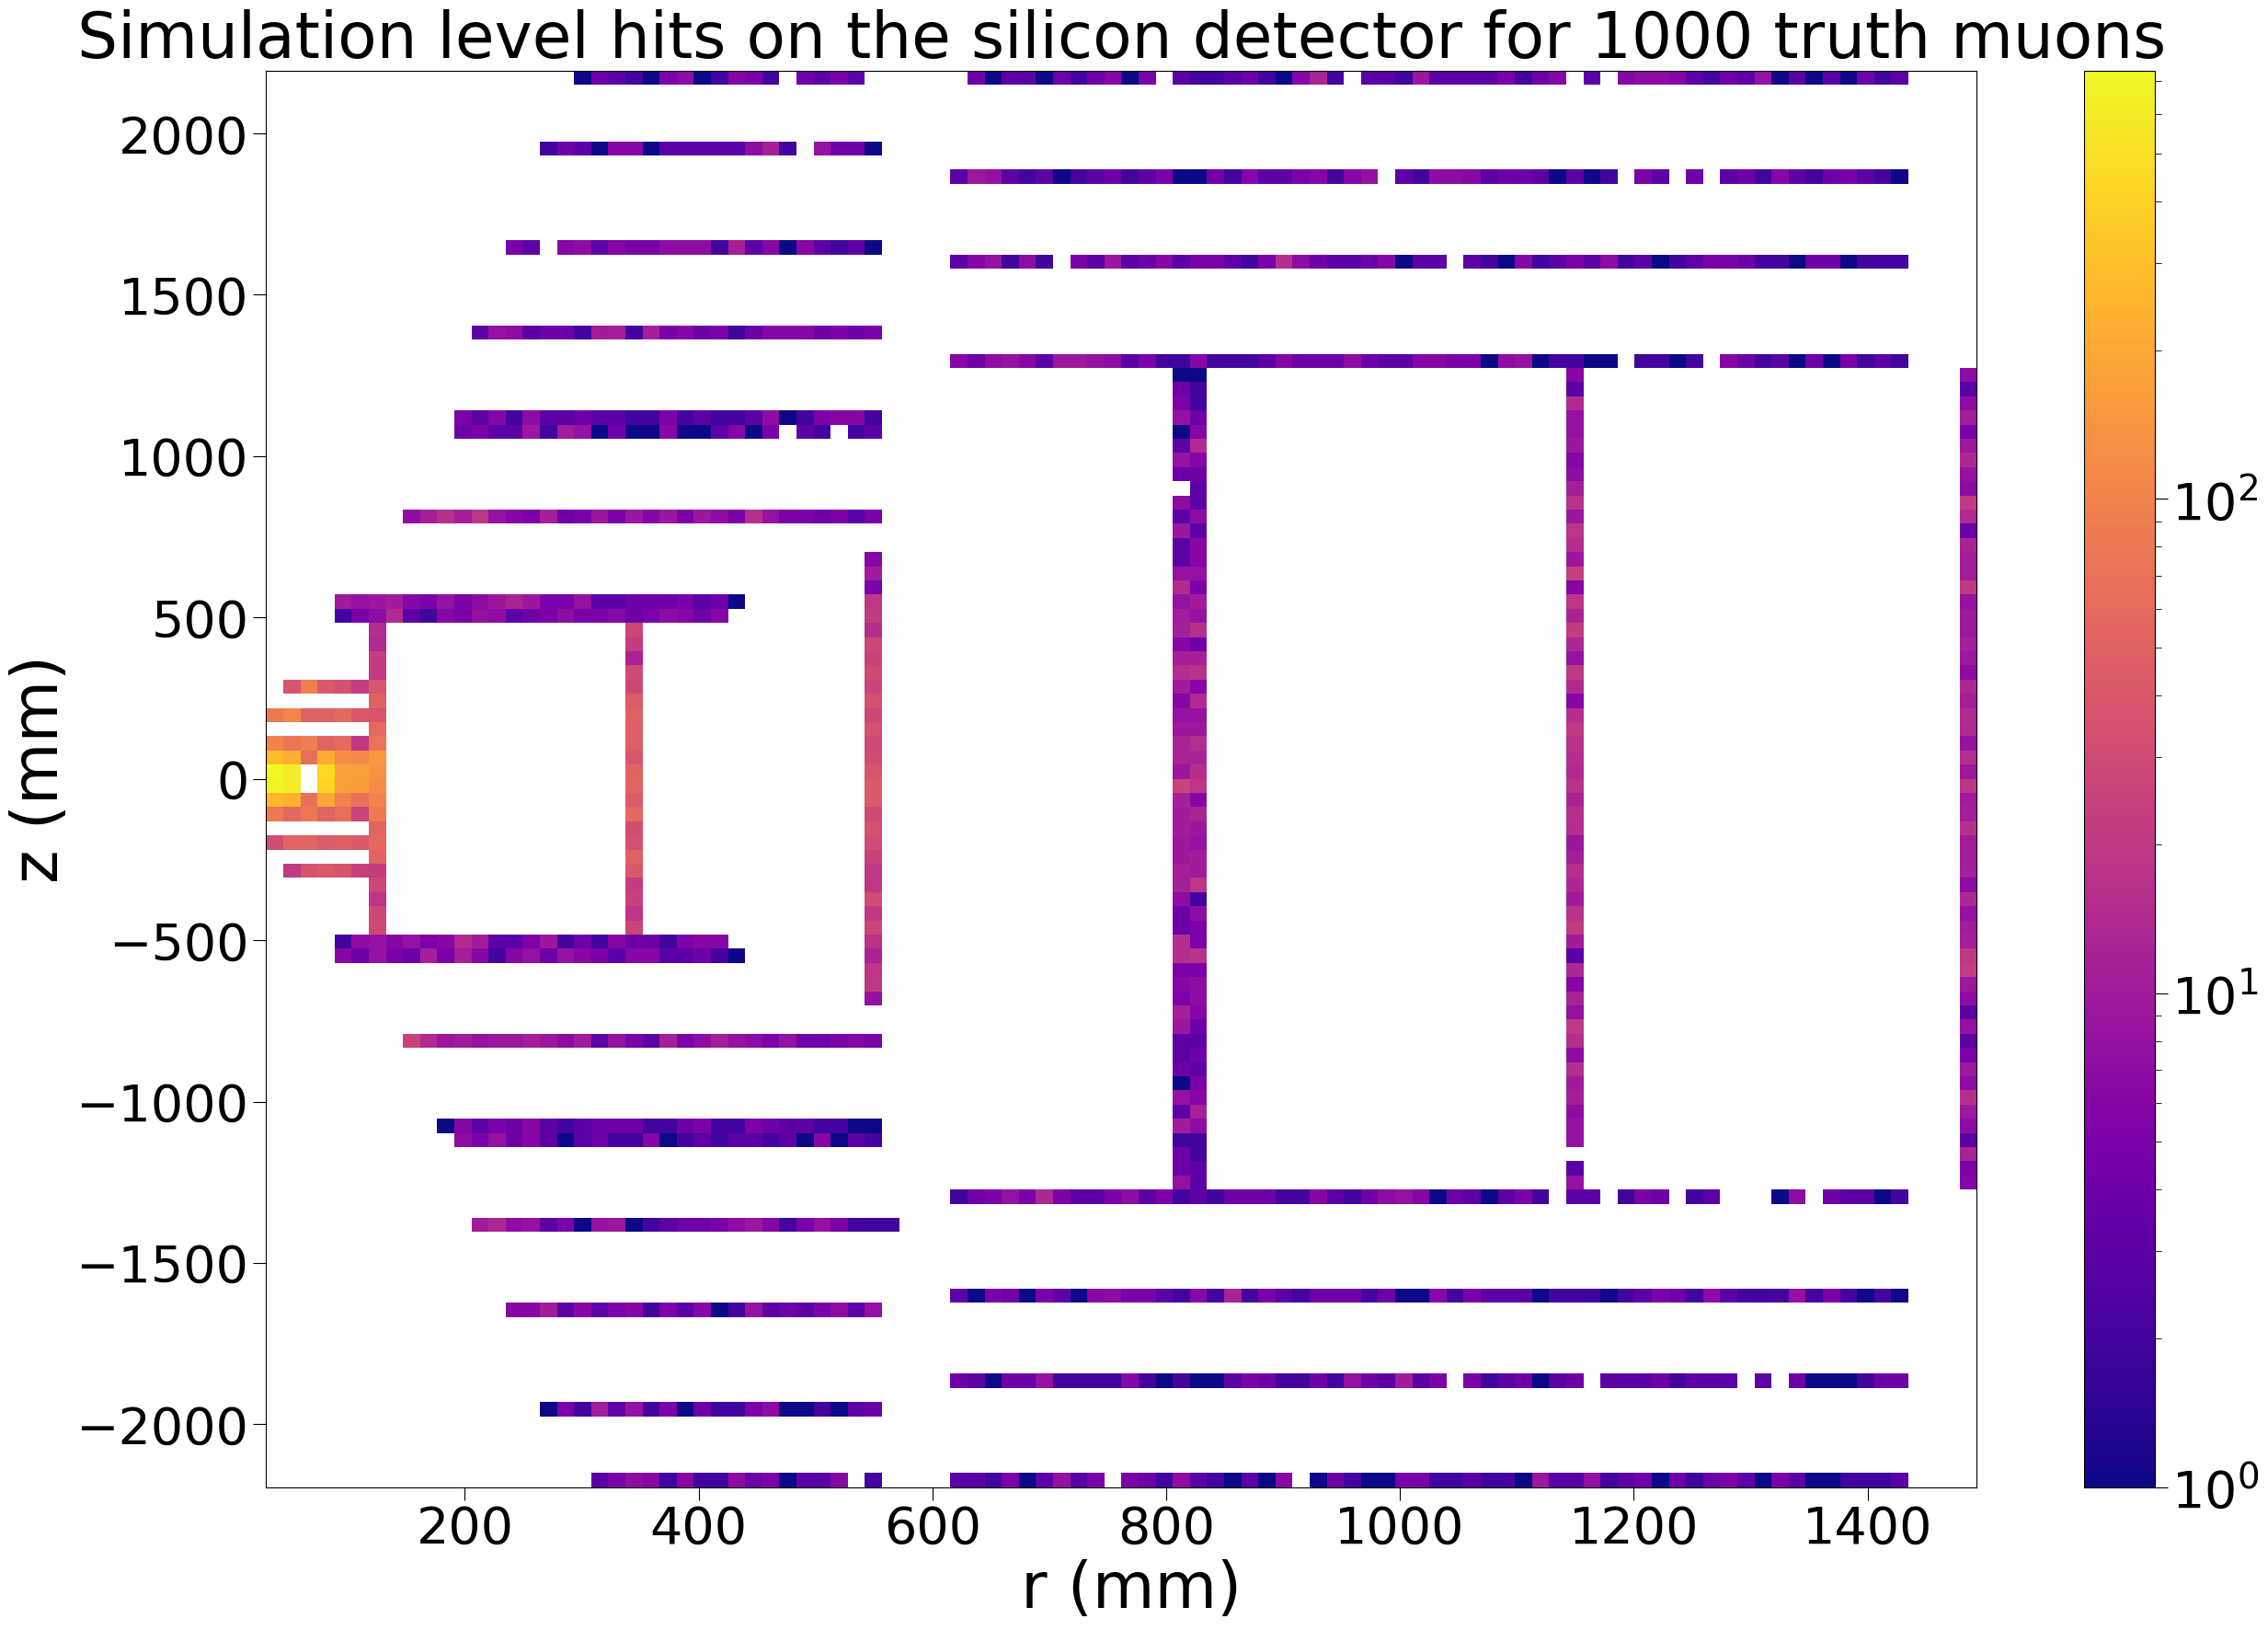

In [16]:
plot2DHistogram(SimHitsNoBIB["r"],SimHitsNoBIB["z"], label="Simulation level hits on the silicon detector for 1000 truth muons; r (mm); z (mm)")

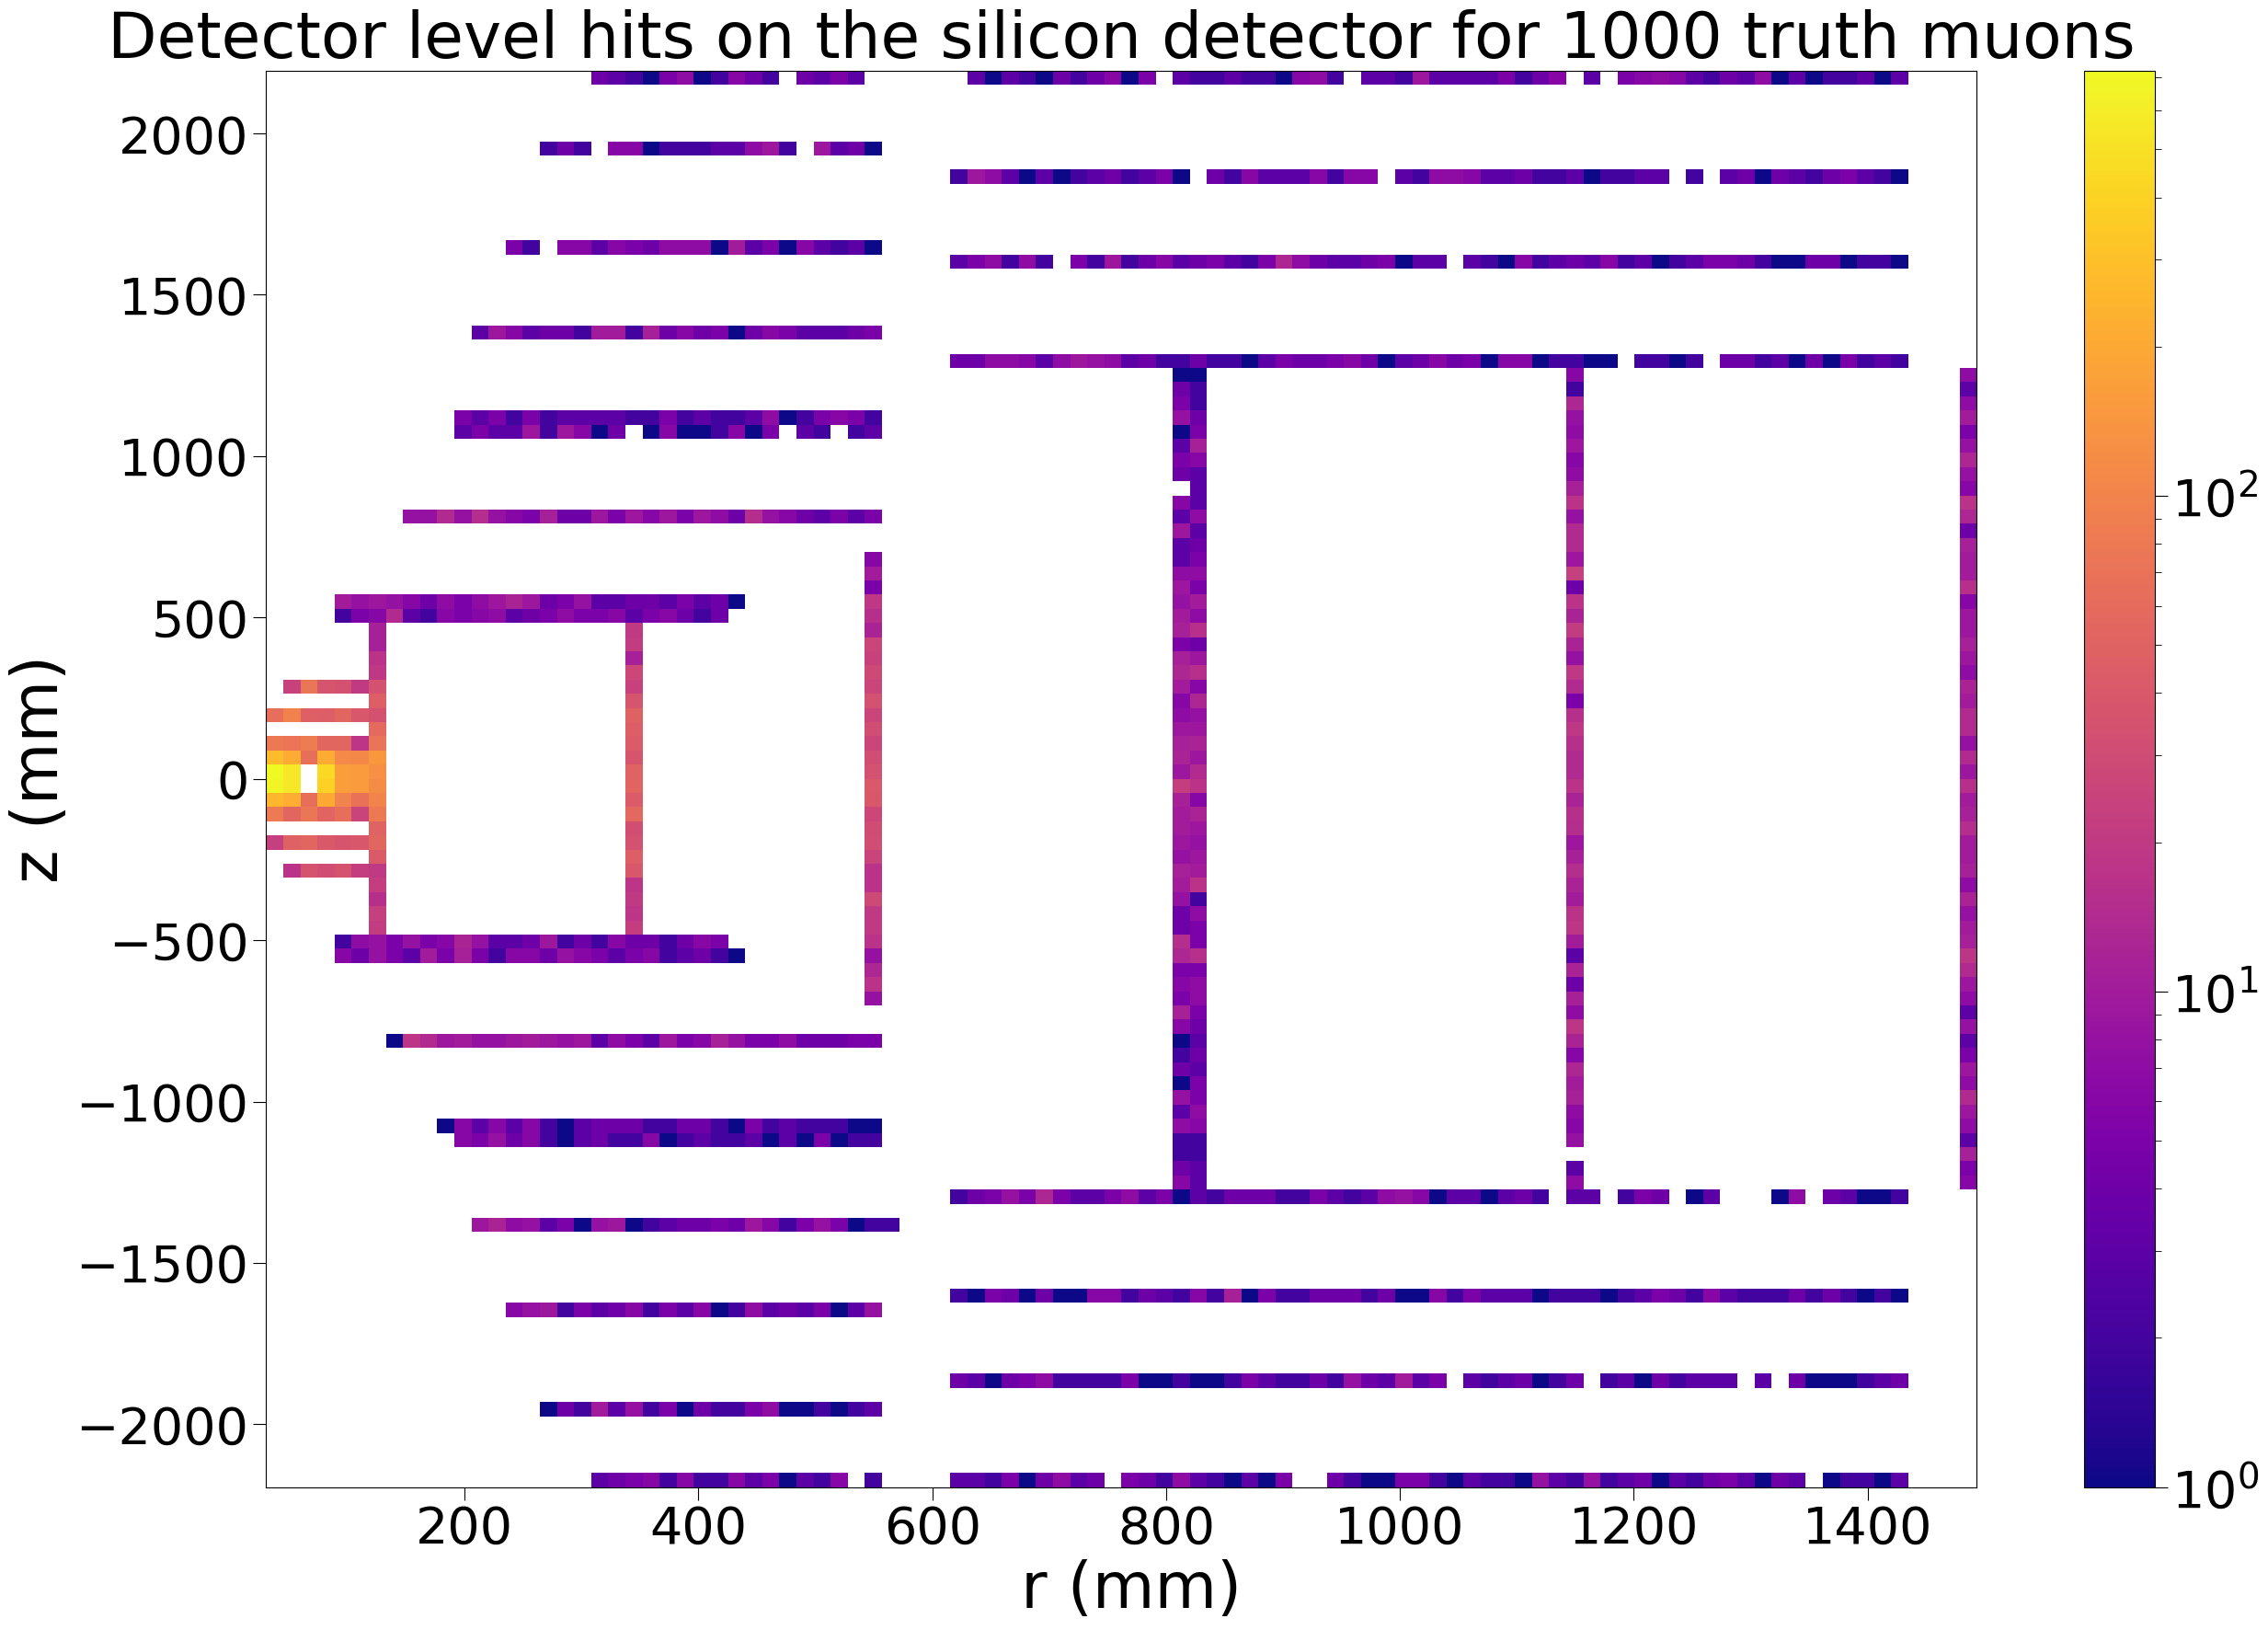

In [17]:
plot2DHistogram(HitsNoBIB["r"],HitsNoBIB["z"], label="Detector level hits on the silicon detector for 1000 truth muons; r (mm); z (mm)")

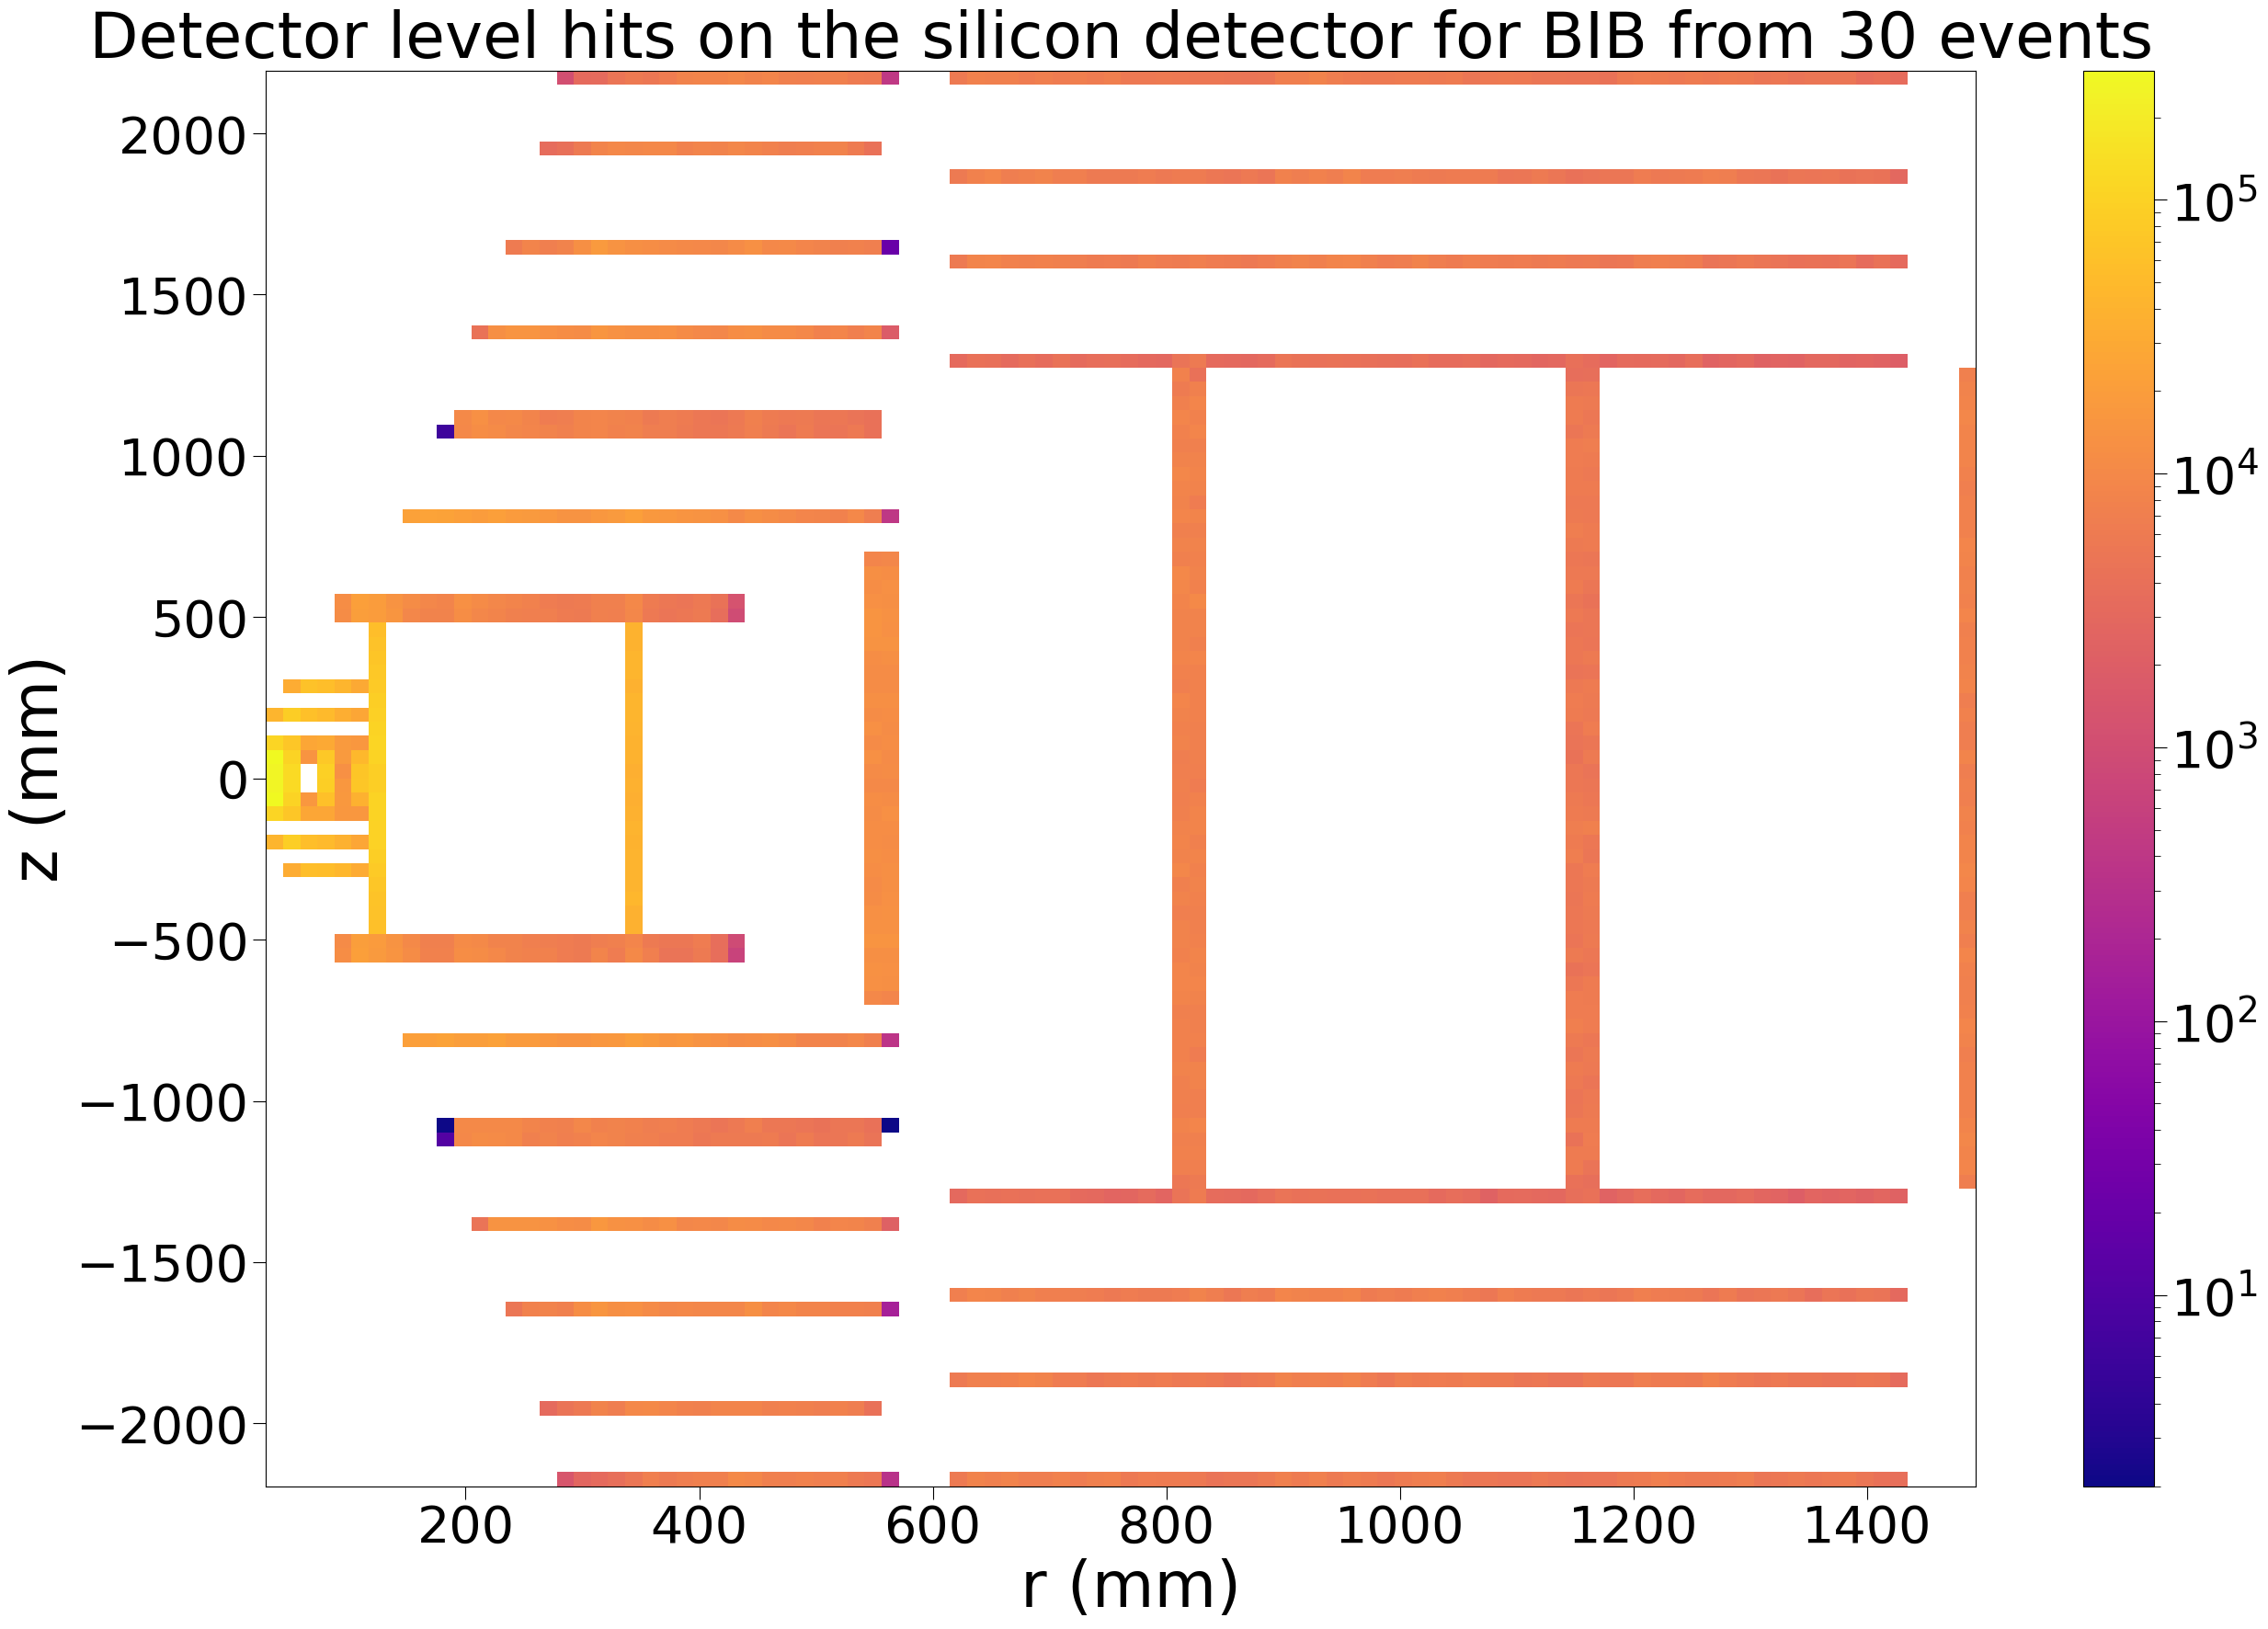

In [18]:
plot2DHistogram(HitsBIB["r"],HitsBIB["z"], label="Detector level hits on the silicon detector for BIB from 30 events; r (mm); z (mm)")

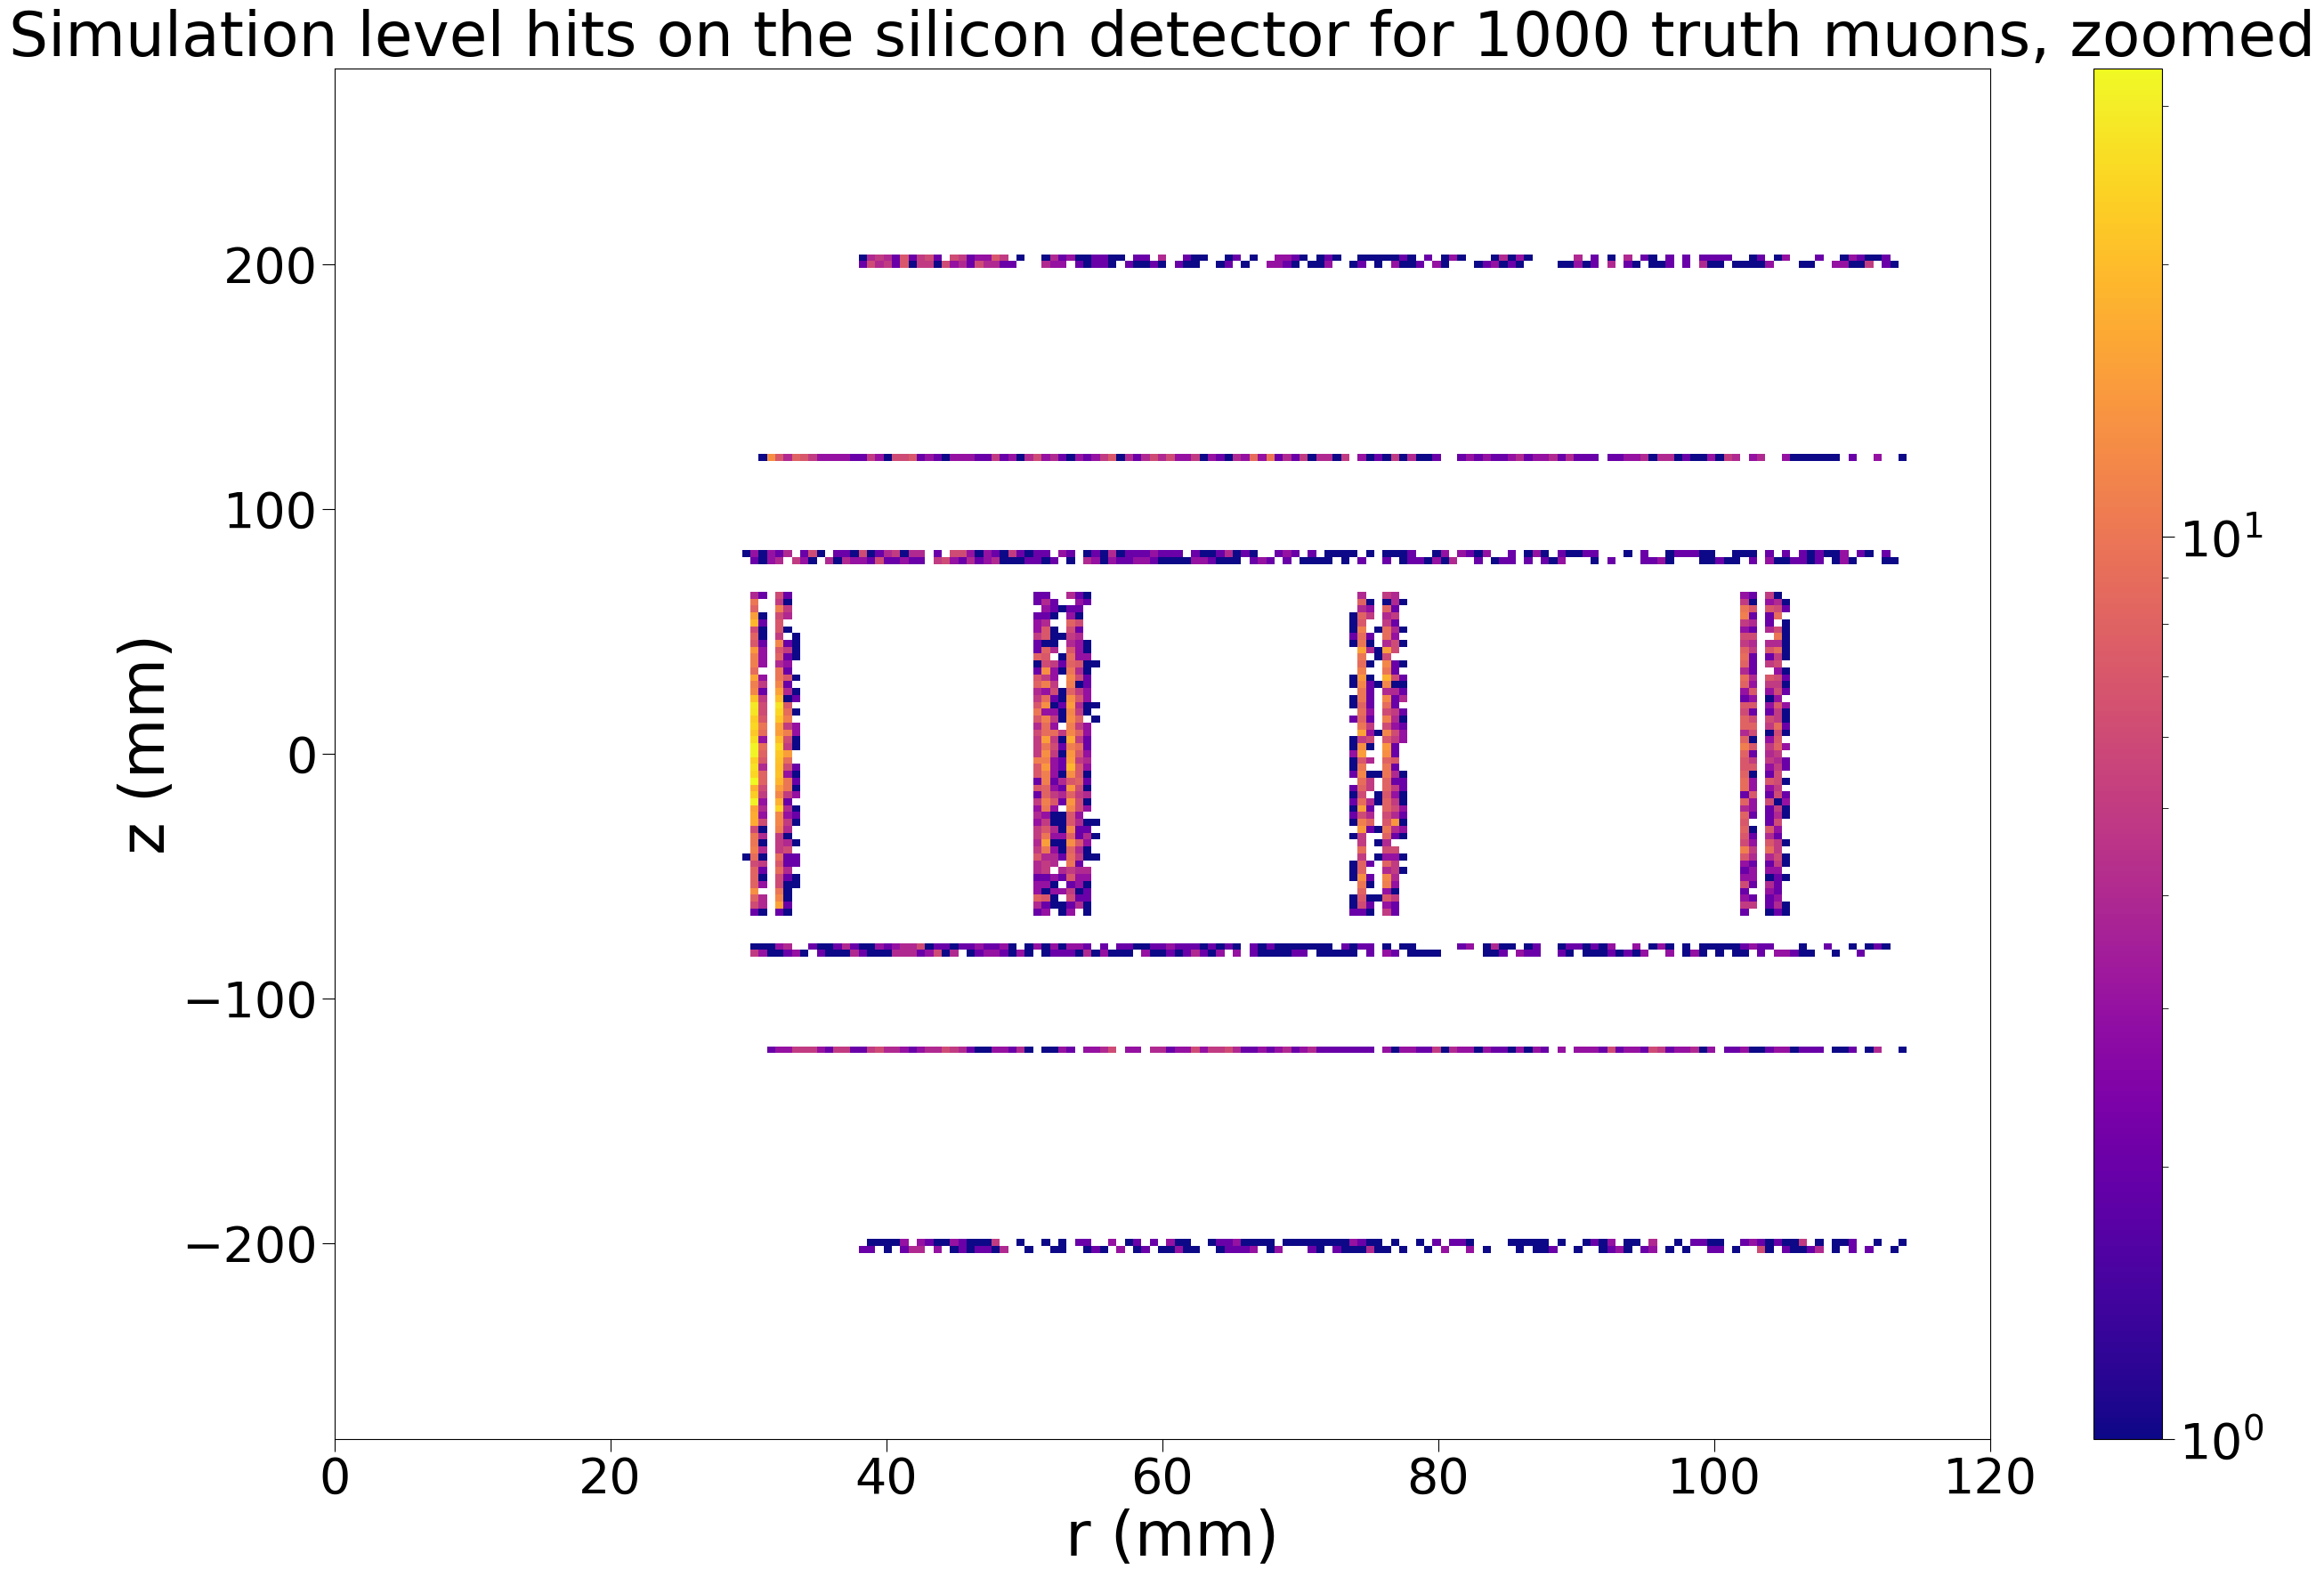

In [19]:
plot2DHistogram(SimHitsNoBIB["r"],SimHitsNoBIB["z"], label="Simulation level hits on the silicon detector for 1000 truth muons, zoomed; r (mm); z (mm)", bins=(np.linspace(0,120,200),np.linspace(-280,280,200)))

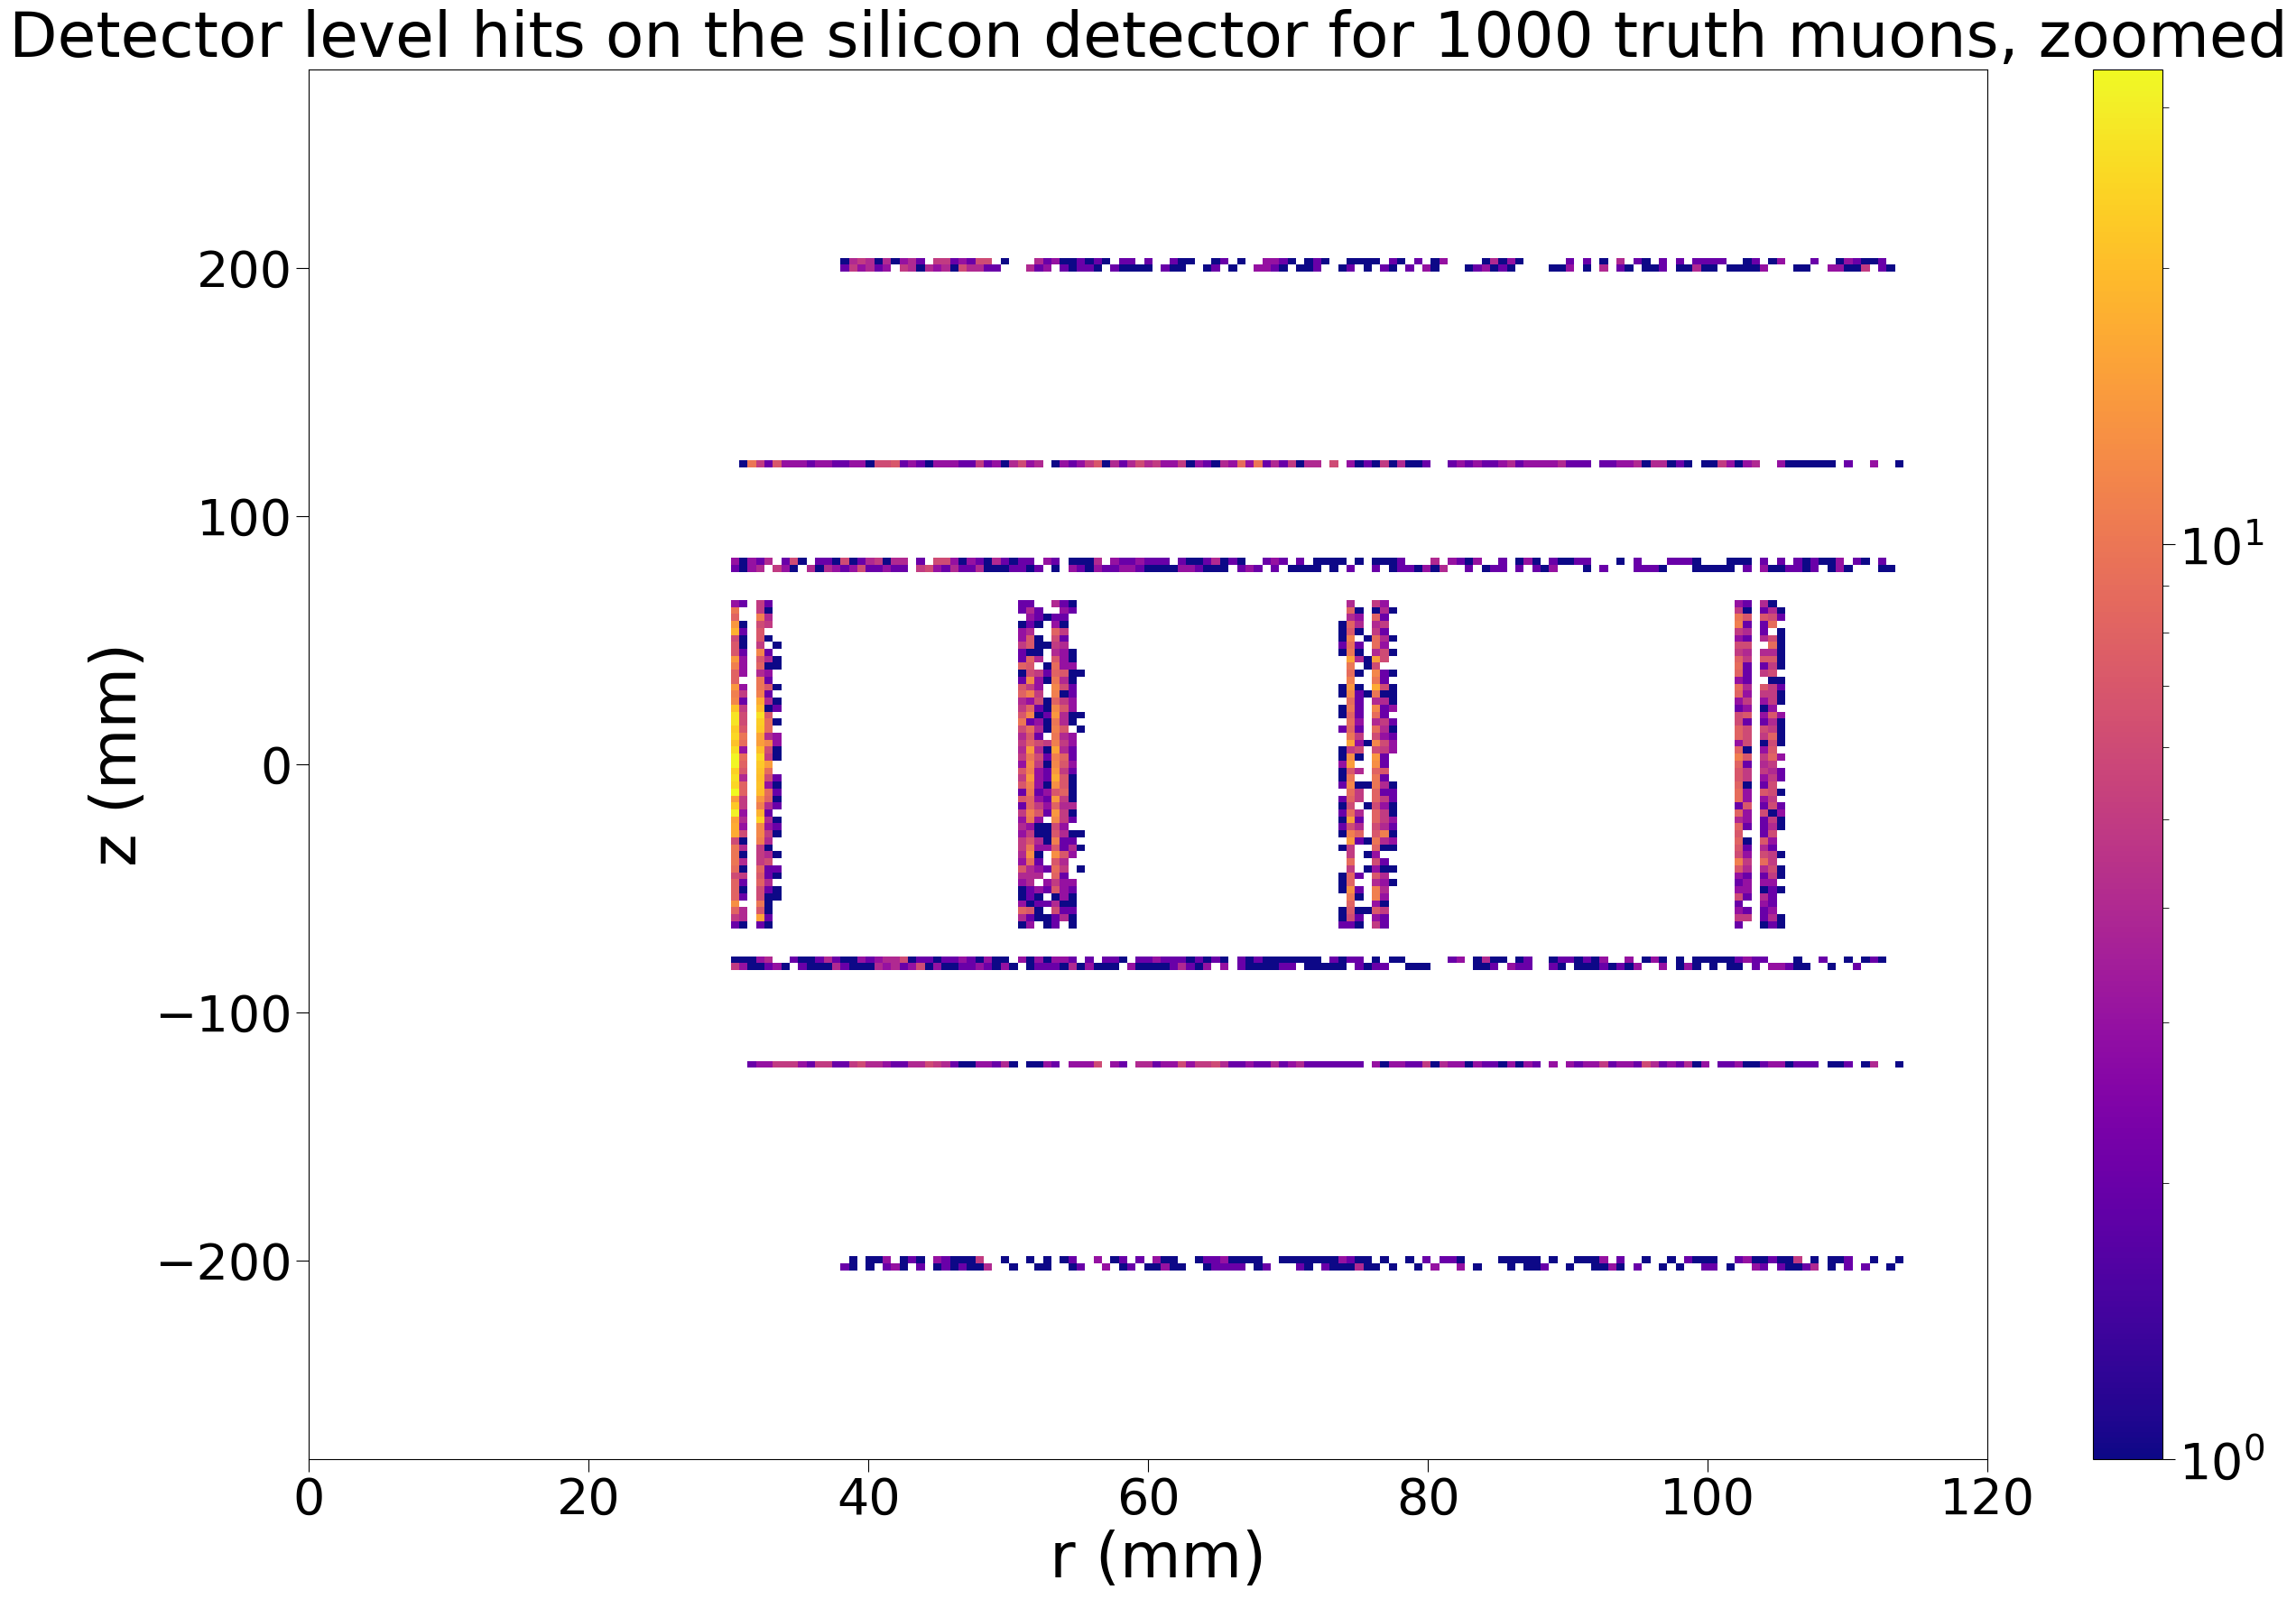

In [20]:
plot2DHistogram(HitsNoBIB["r"],HitsNoBIB["z"], label="Detector level hits on the silicon detector for 1000 truth muons, zoomed; r (mm); z (mm)", bins=(np.linspace(0,120,200),np.linspace(-280,280,200)))

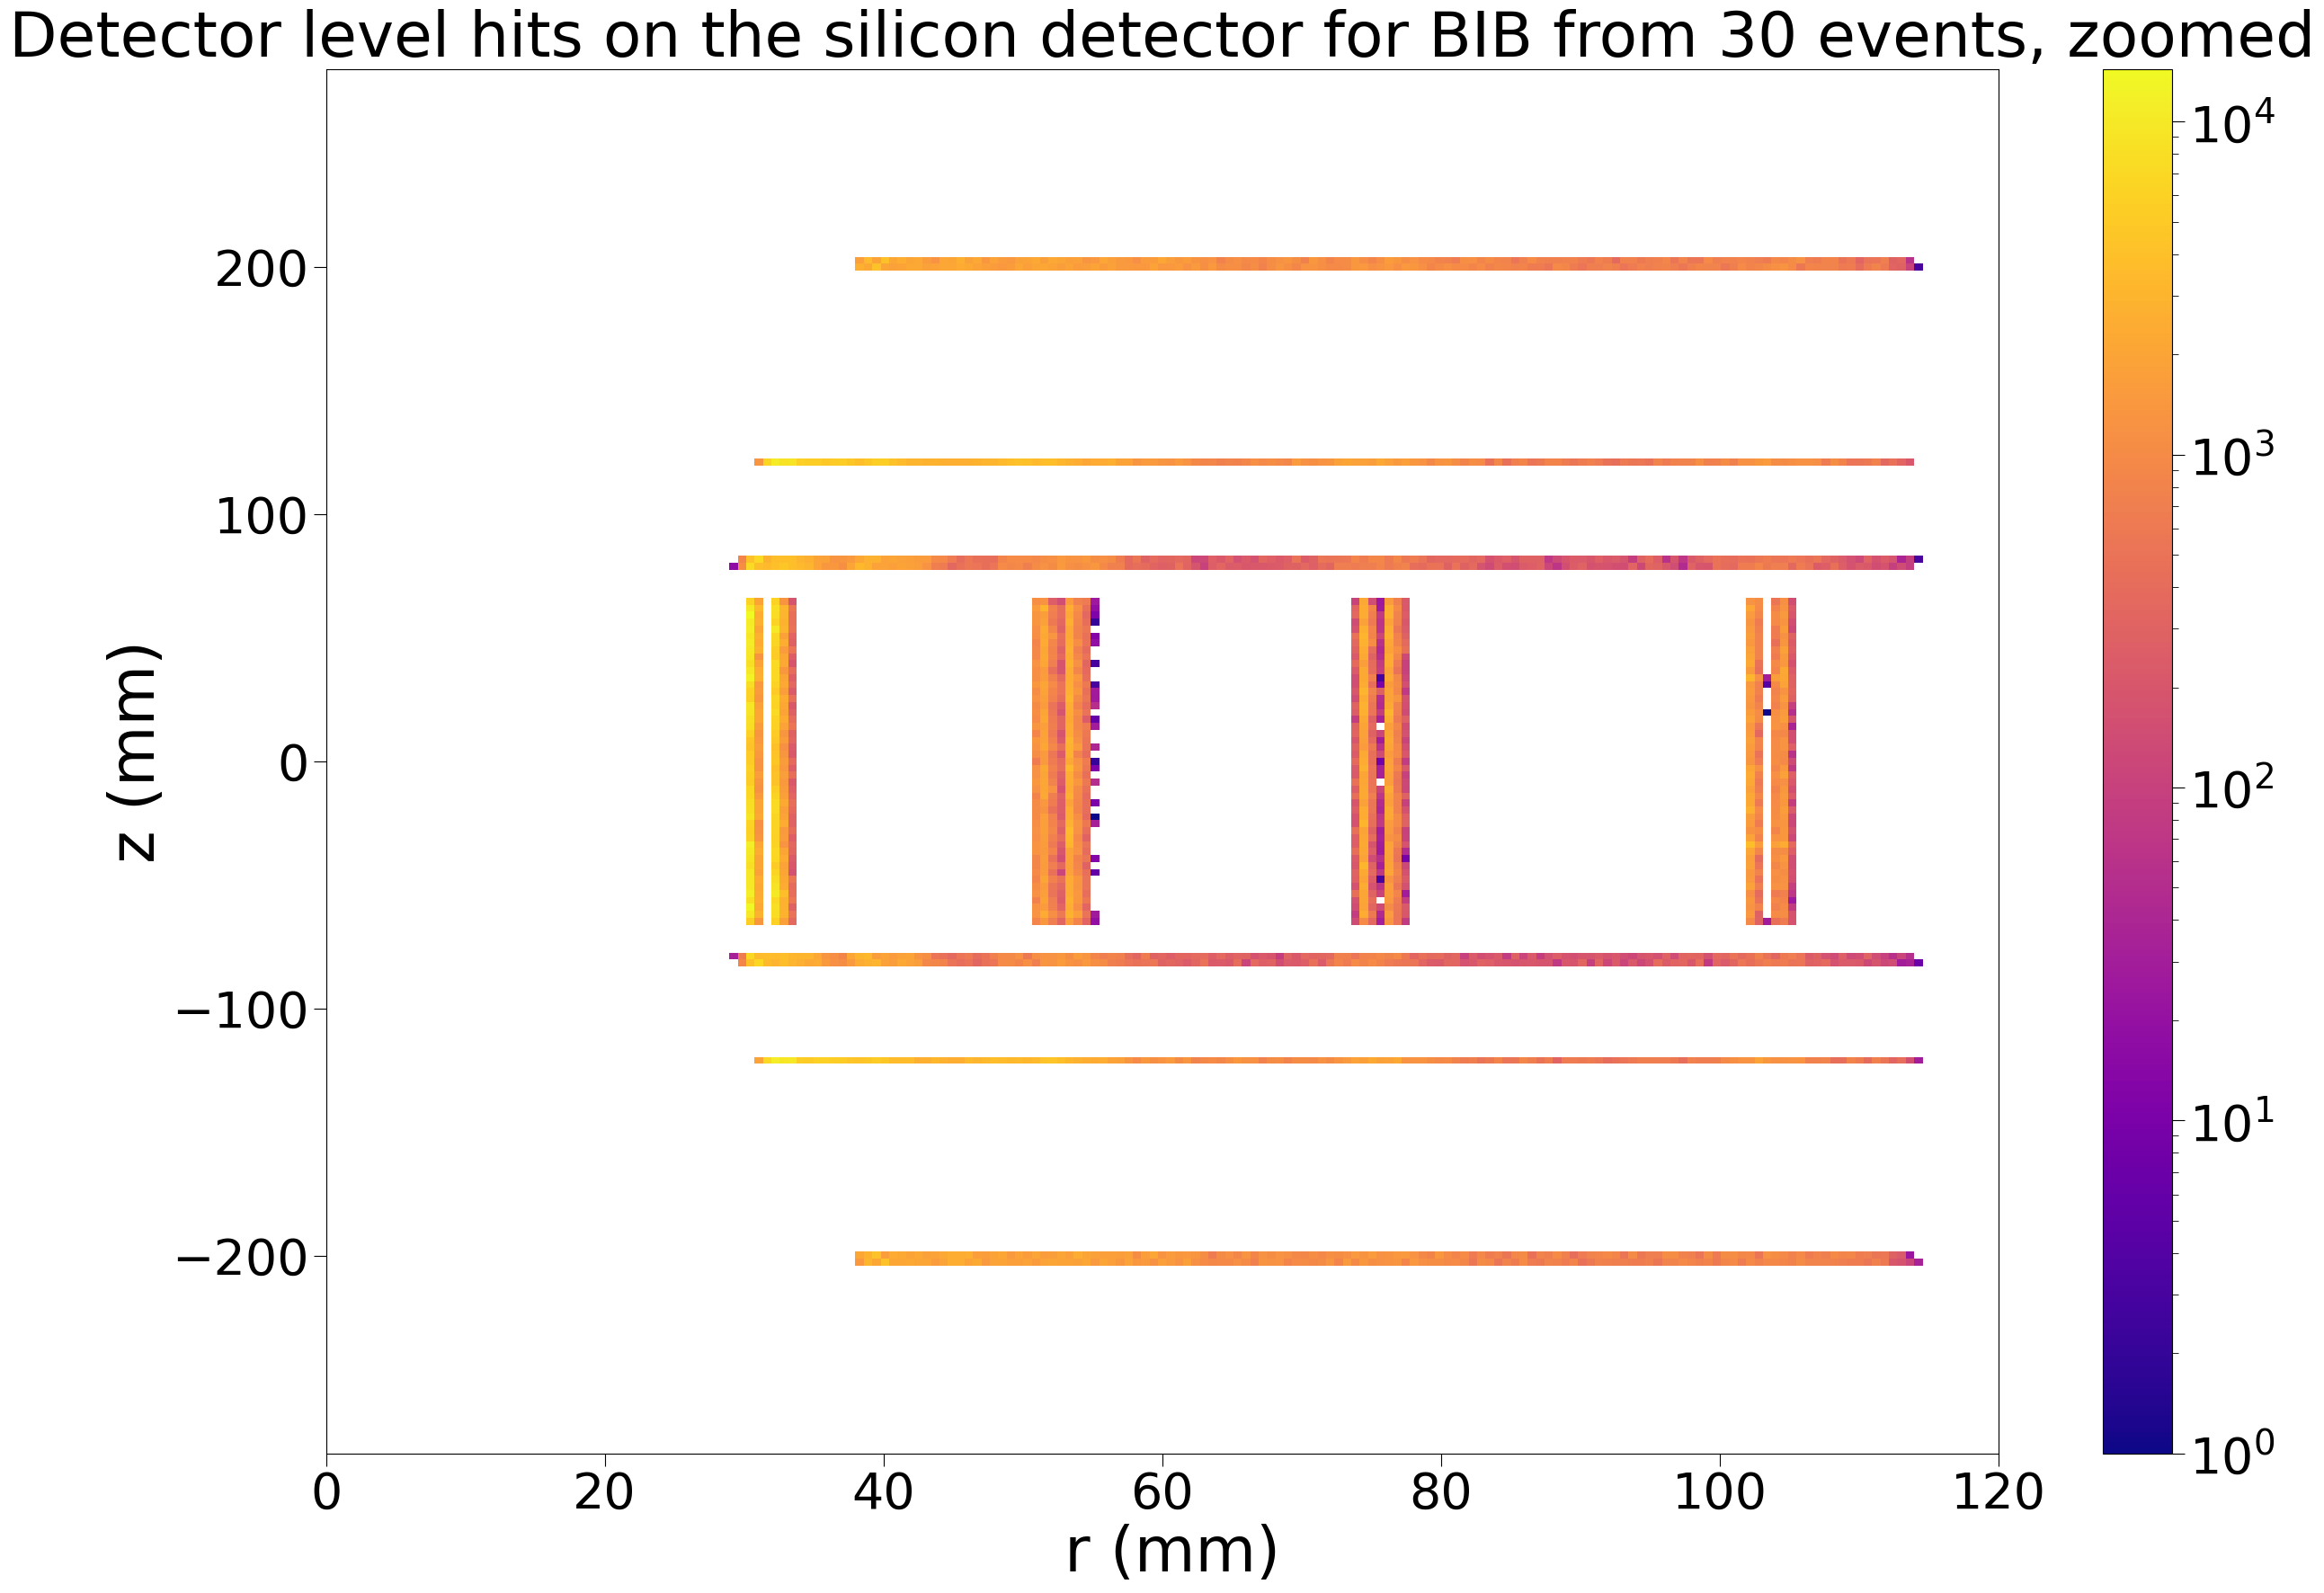

In [21]:
plot2DHistogram(HitsBIB["r"],HitsBIB["z"], label="Detector level hits on the silicon detector for BIB from 30 events, zoomed; r (mm); z (mm)", bins=(np.linspace(0,120,200),np.linspace(-280,280,200)))

# All Tracks Hits

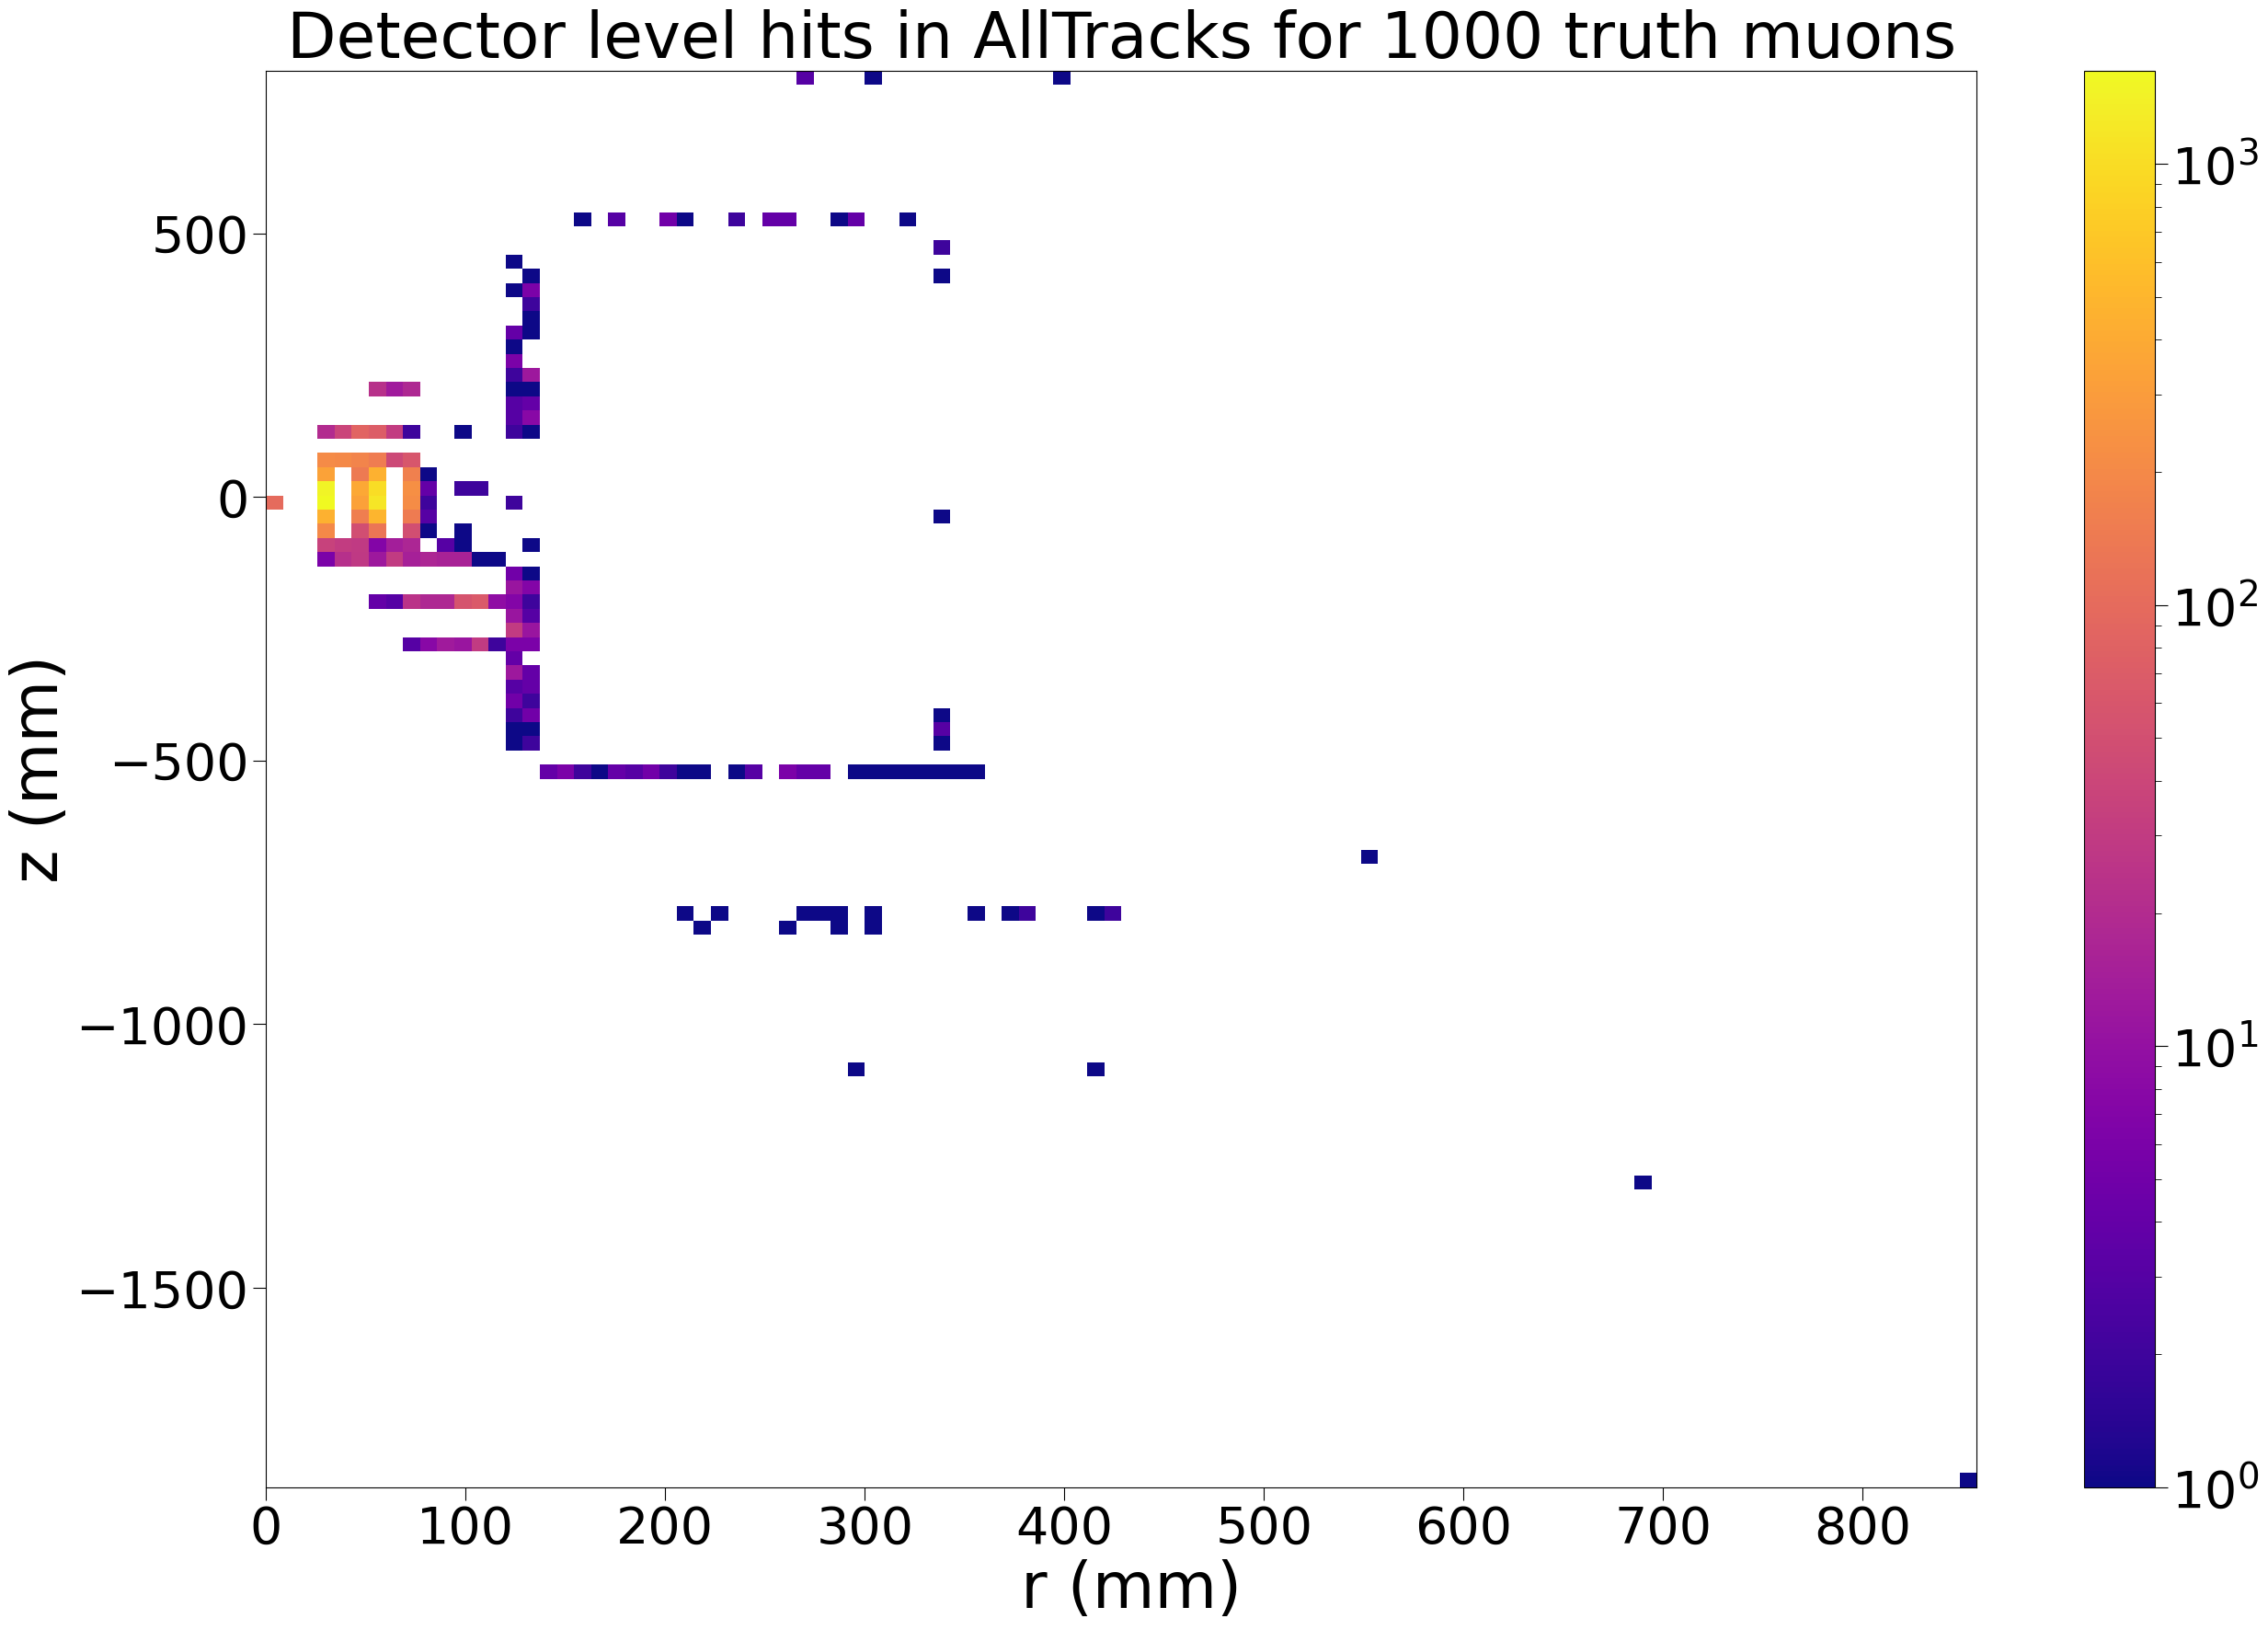

In [22]:
plot2DHistogram(AllNoBIB["r"],AllNoBIB["z"], label="Detector level hits in AllTracks for 1000 truth muons; r (mm); z (mm)")

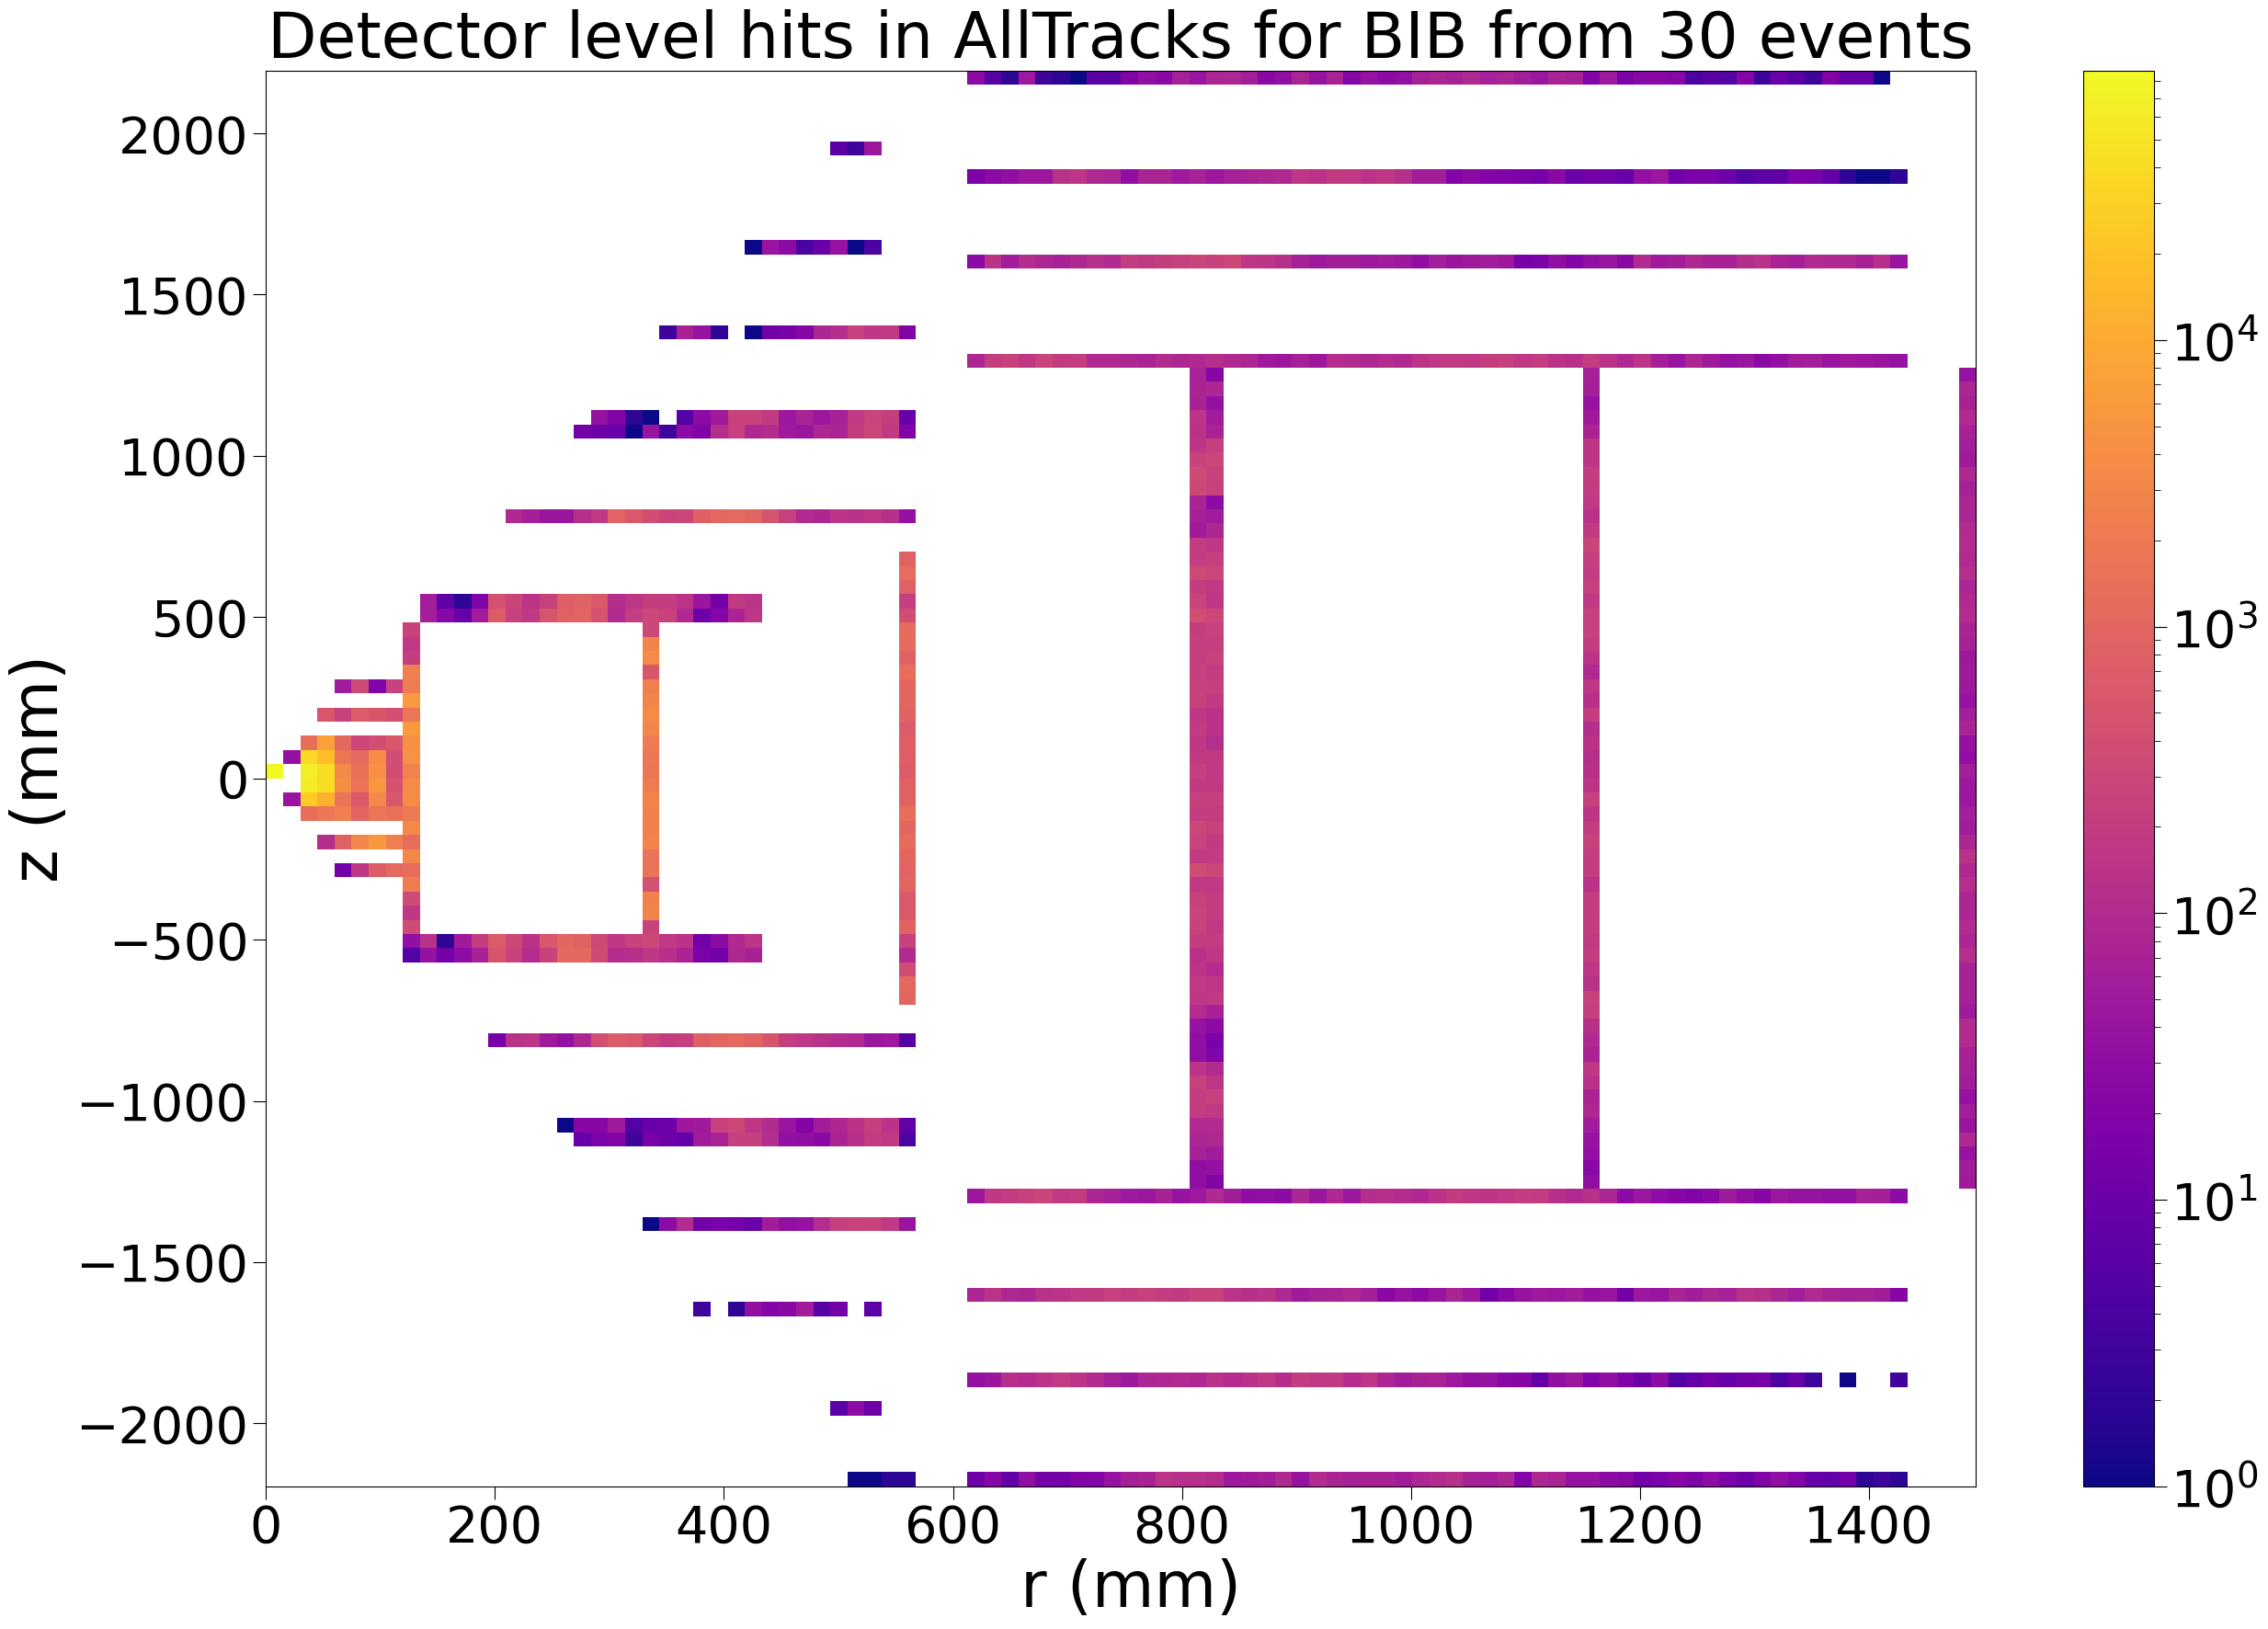

In [23]:
plot2DHistogram(AllBIB["r"],AllBIB["z"], label="Detector level hits in AllTracks for BIB from 30 events; r (mm); z (mm)")

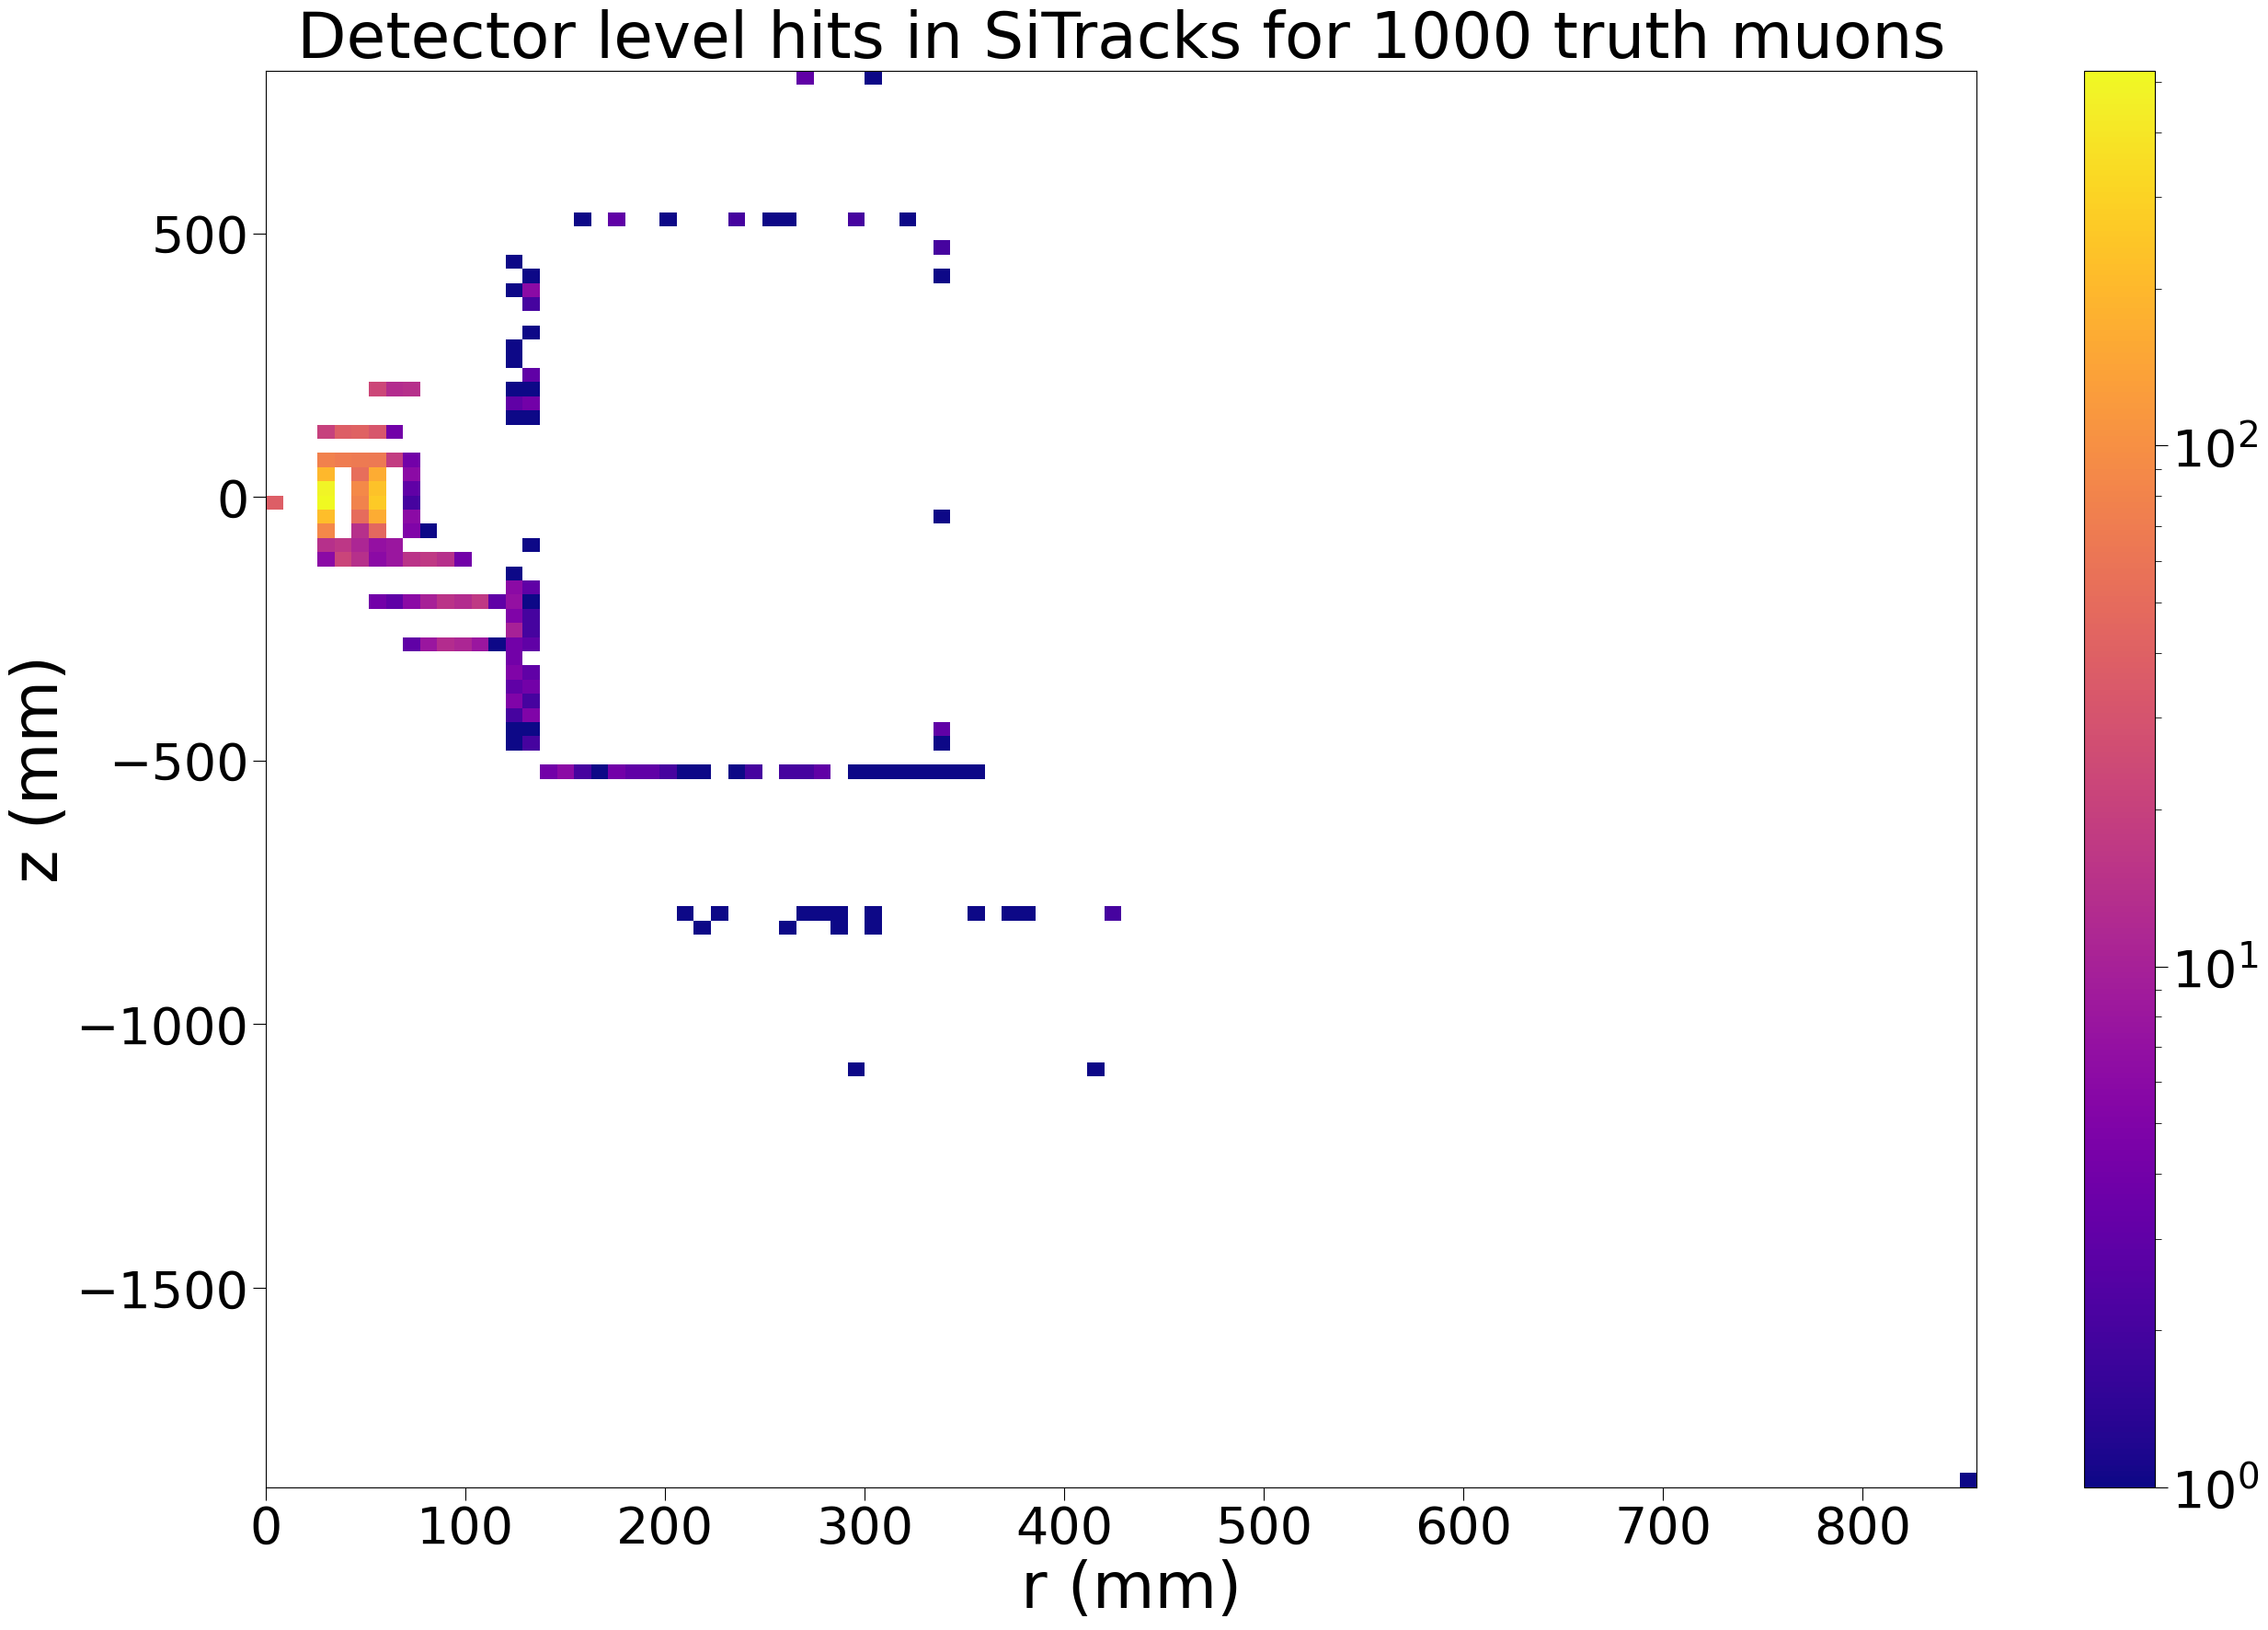

In [24]:
plot2DHistogram(SiNoBIB["r"],SiNoBIB["z"], label="Detector level hits in SiTracks for 1000 truth muons; r (mm); z (mm)")

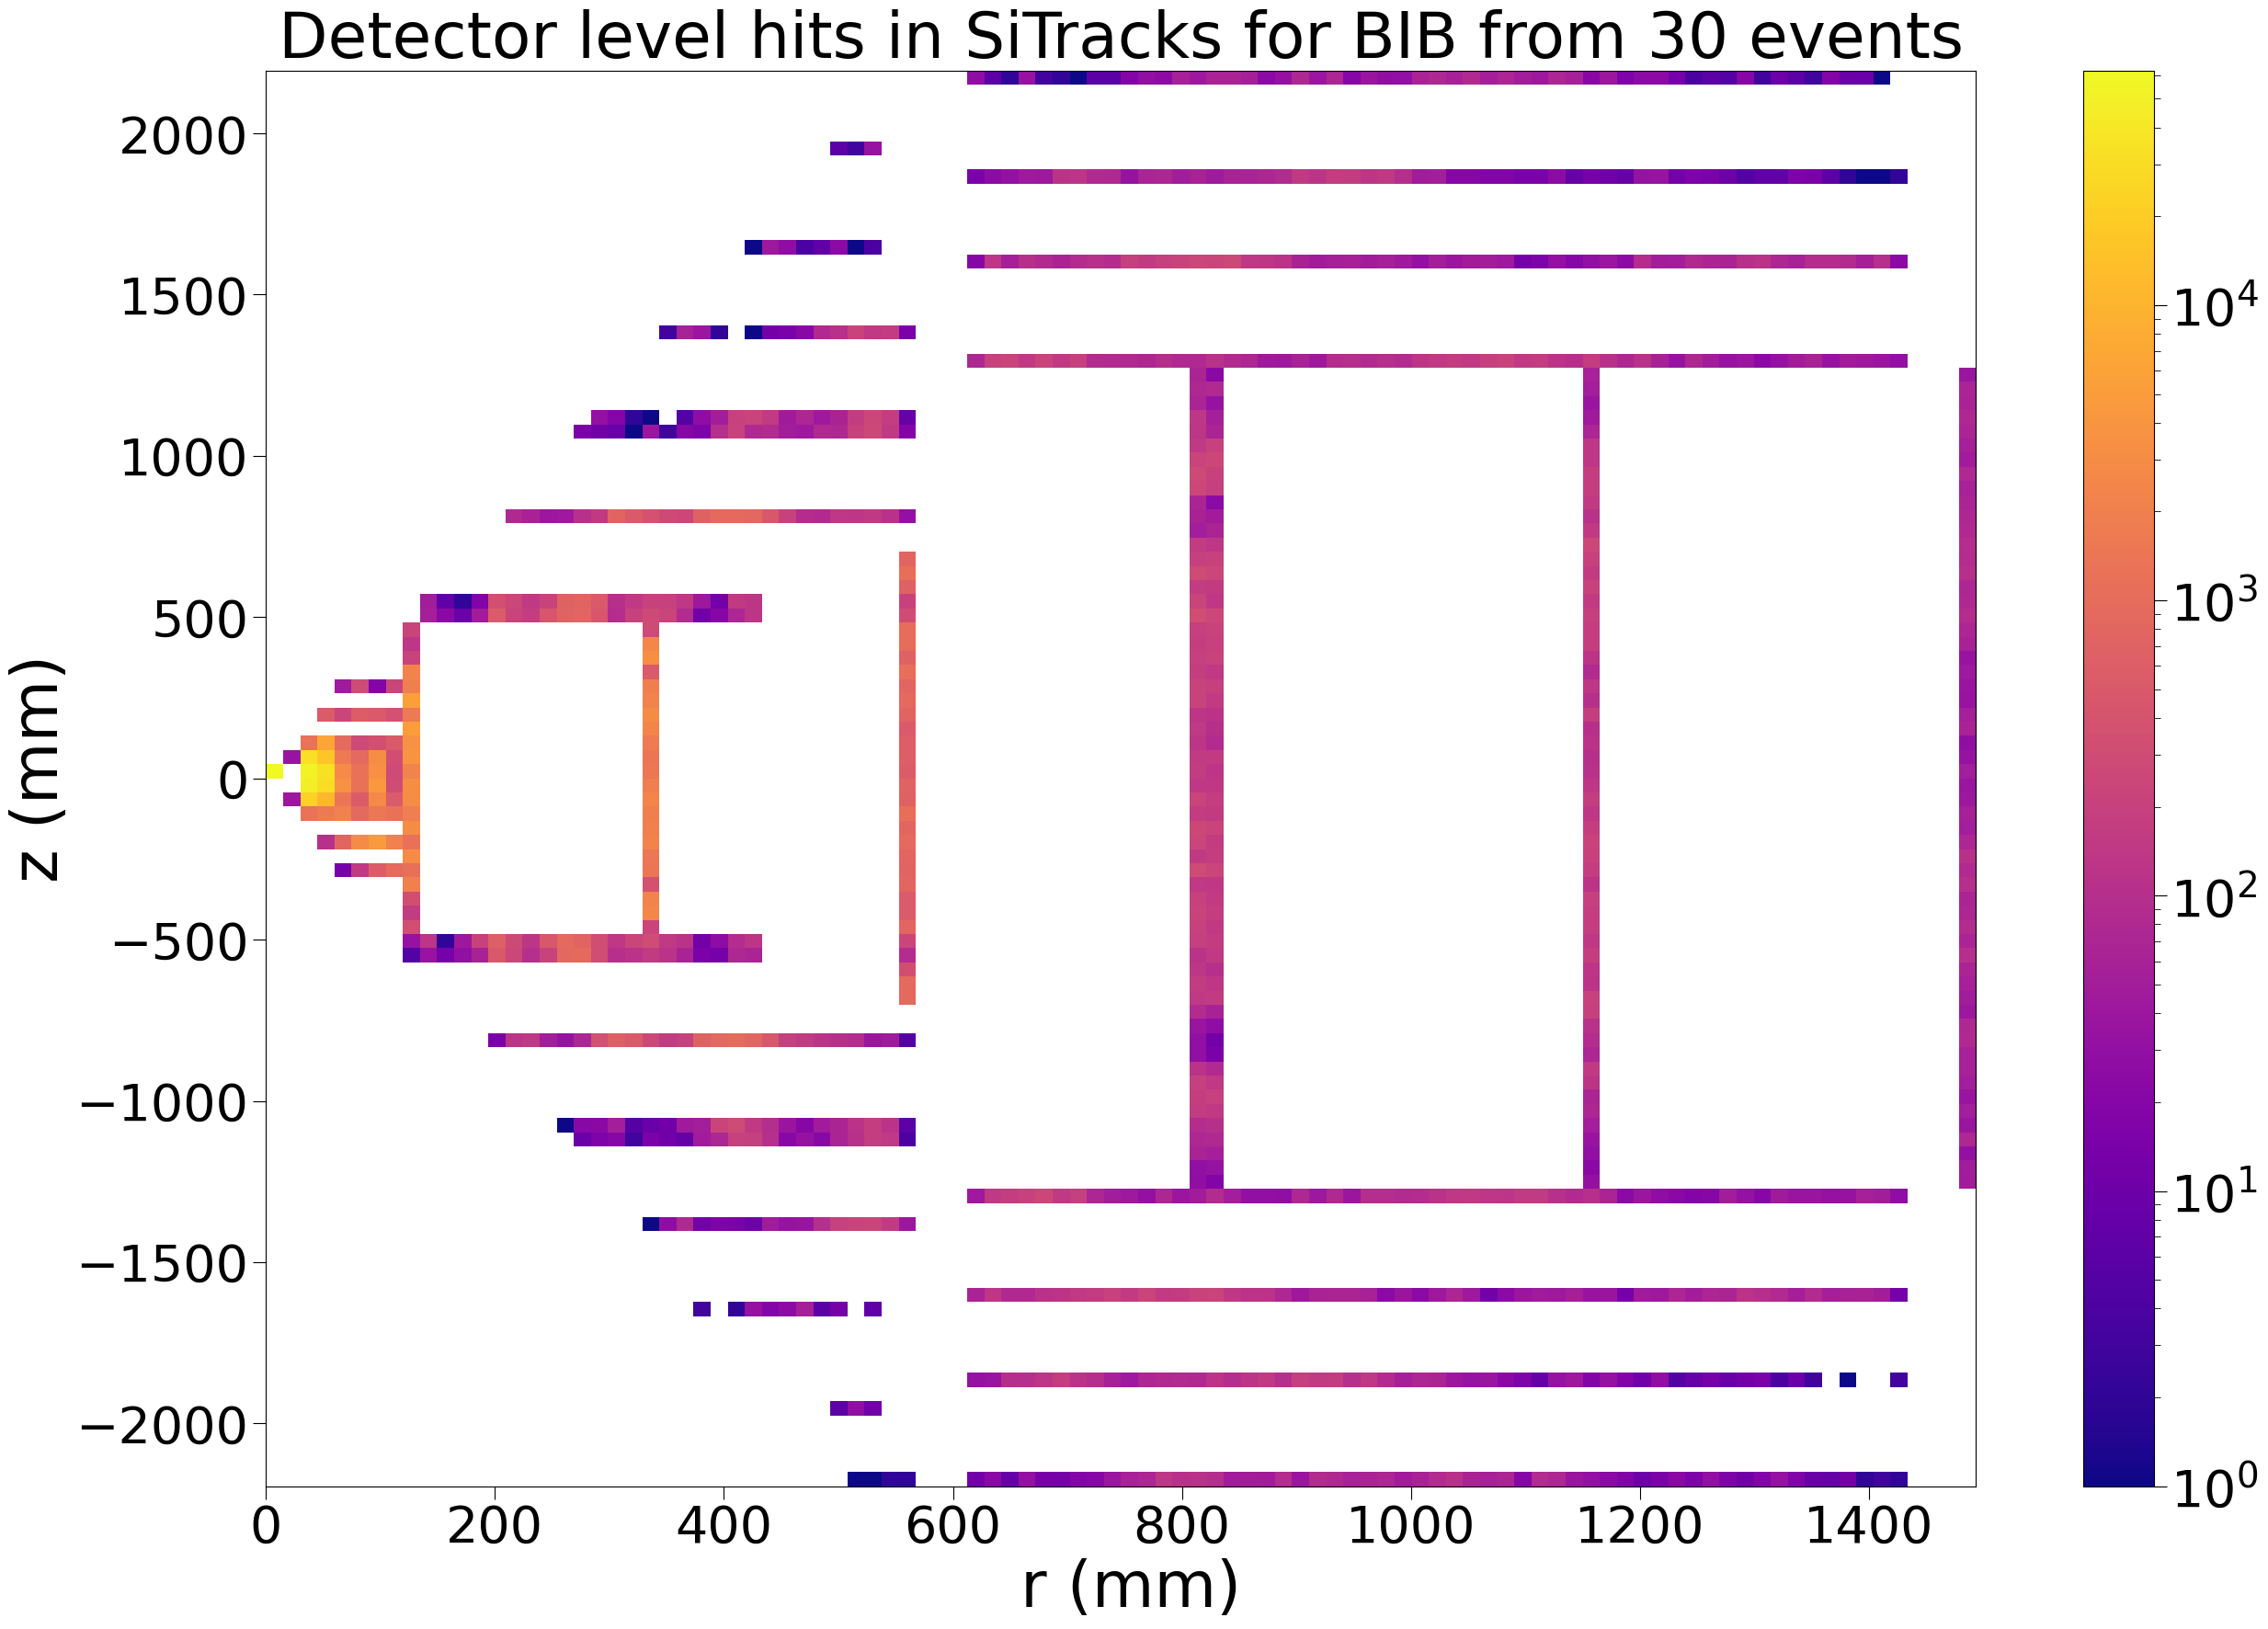

In [25]:
plot2DHistogram(SiBIB["r"],SiBIB["z"], label="Detector level hits in SiTracks for BIB from 30 events; r (mm); z (mm)")

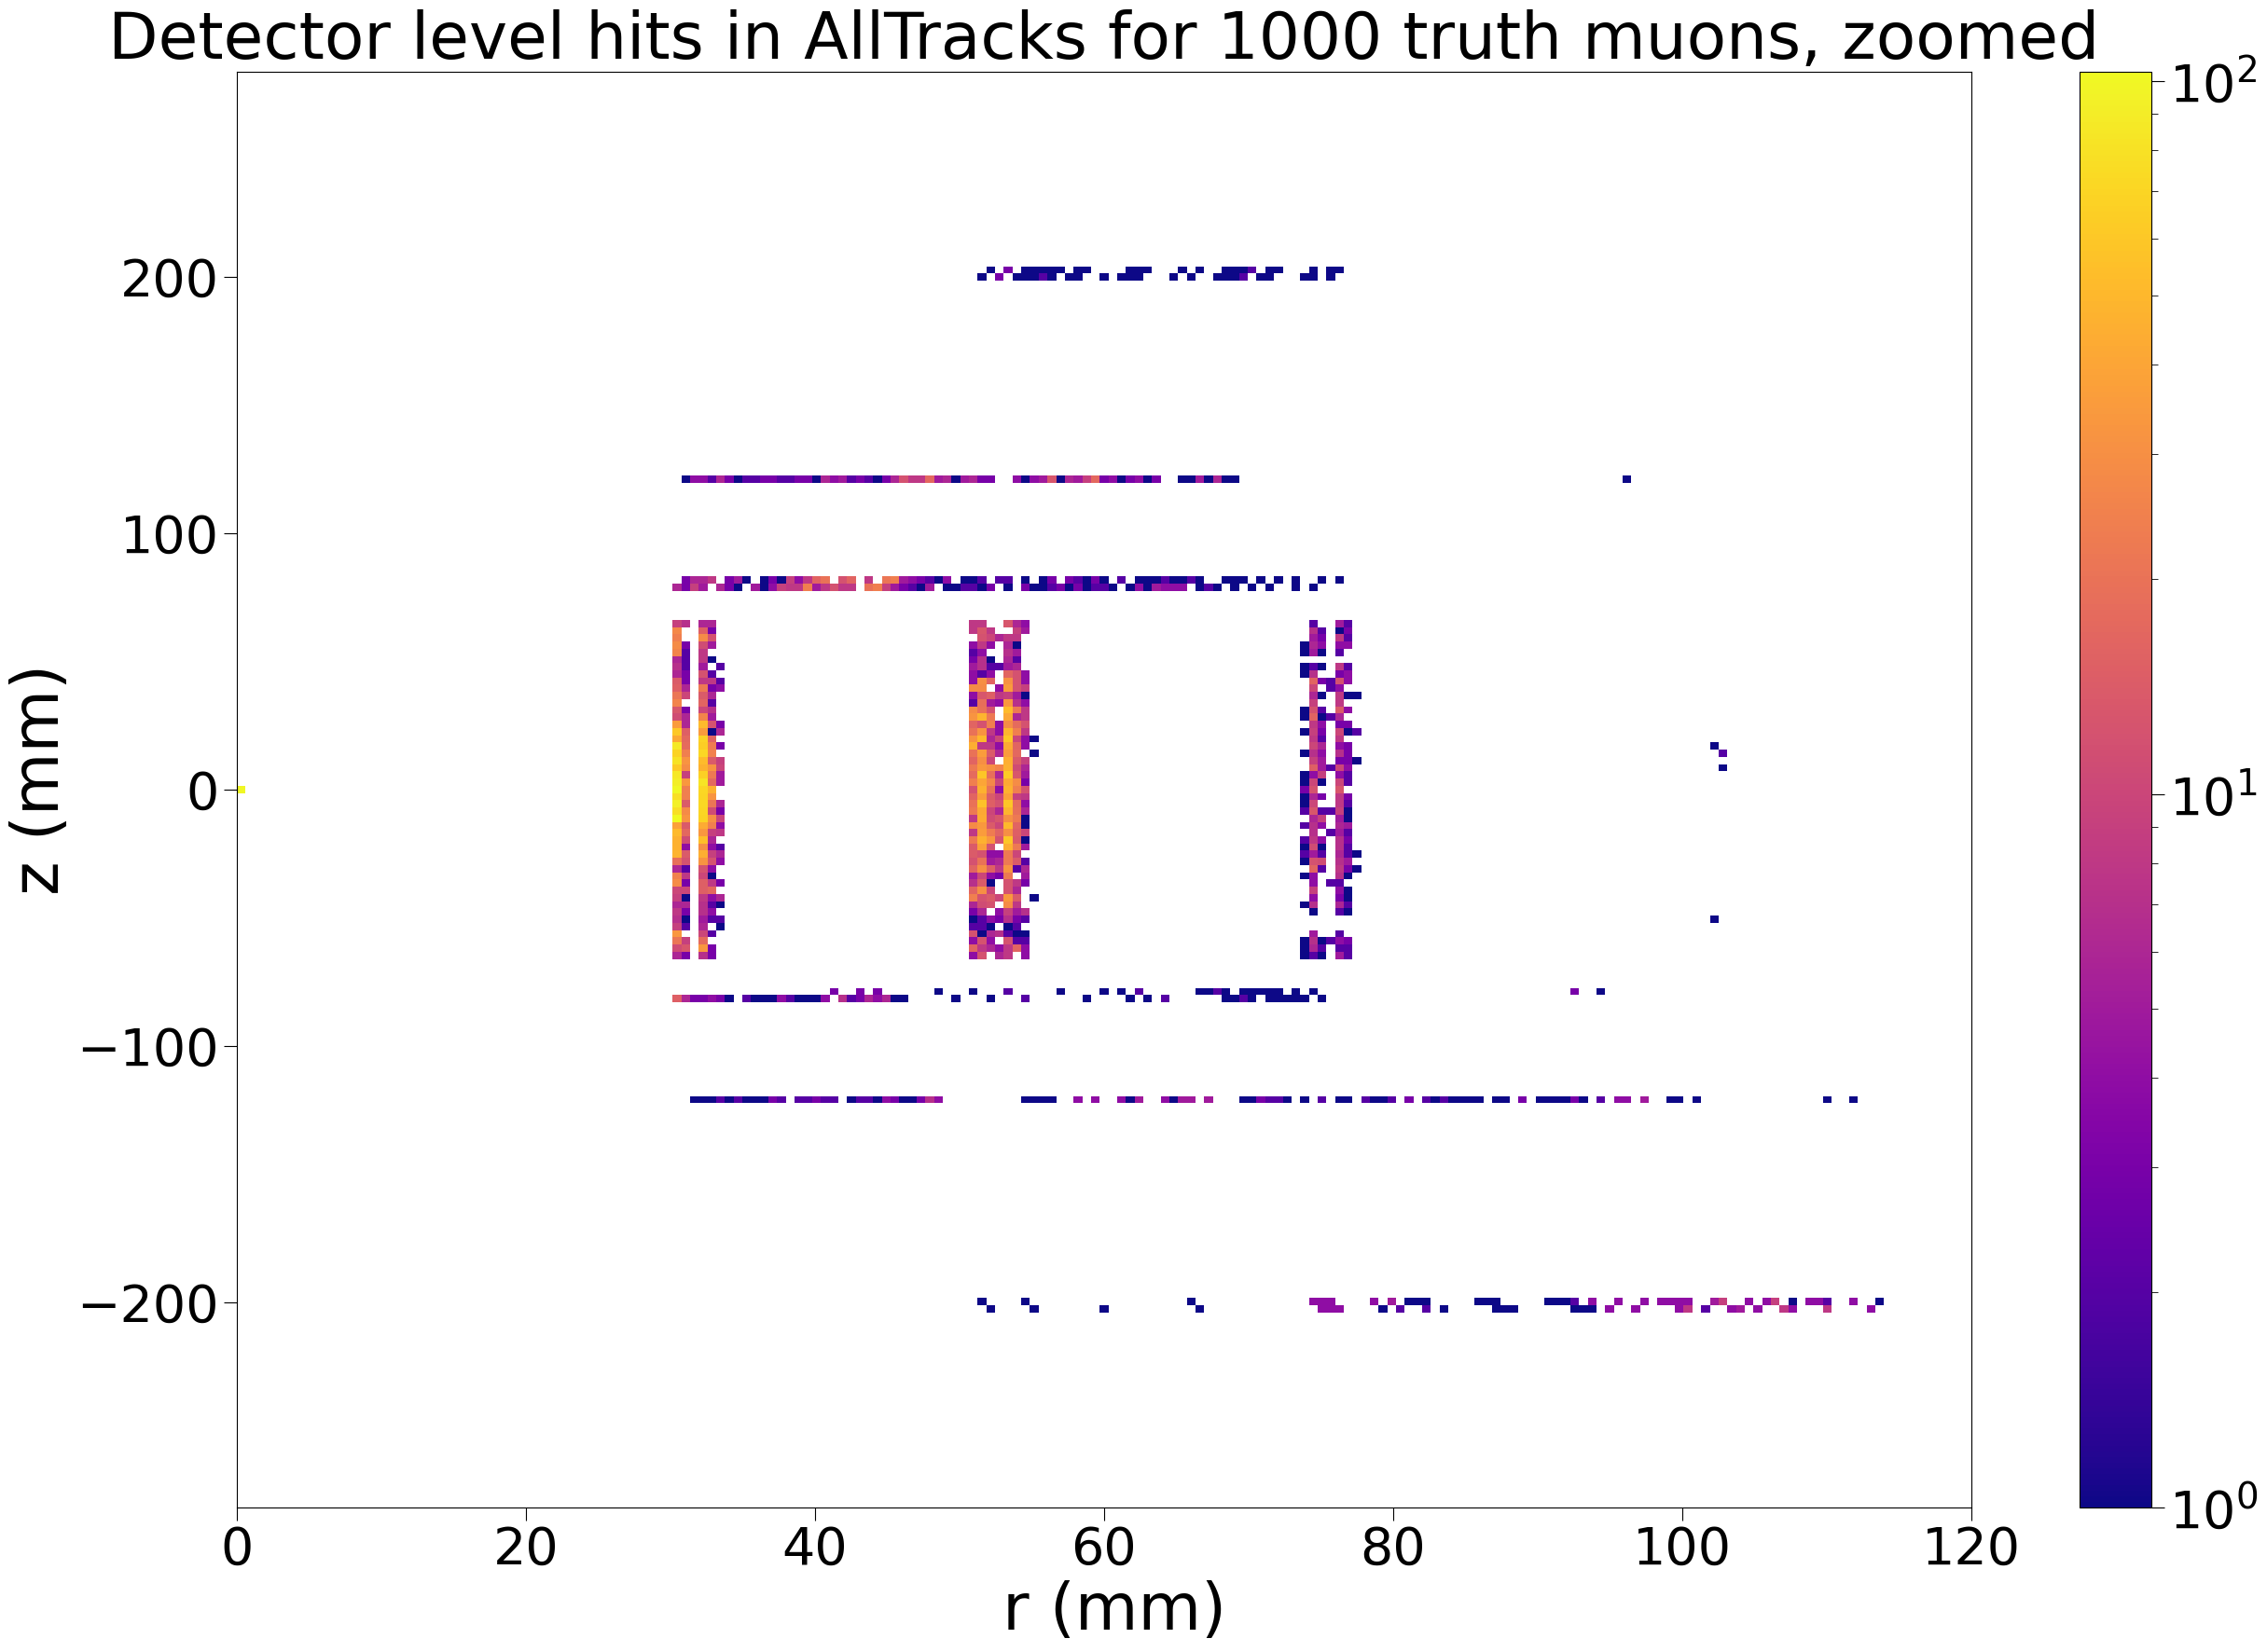

In [26]:
plot2DHistogram(AllNoBIB["r"],AllNoBIB["z"], label="Detector level hits in AllTracks for 1000 truth muons, zoomed; r (mm); z (mm)", bins=(np.linspace(0,120,200),np.linspace(-280,280,200)))

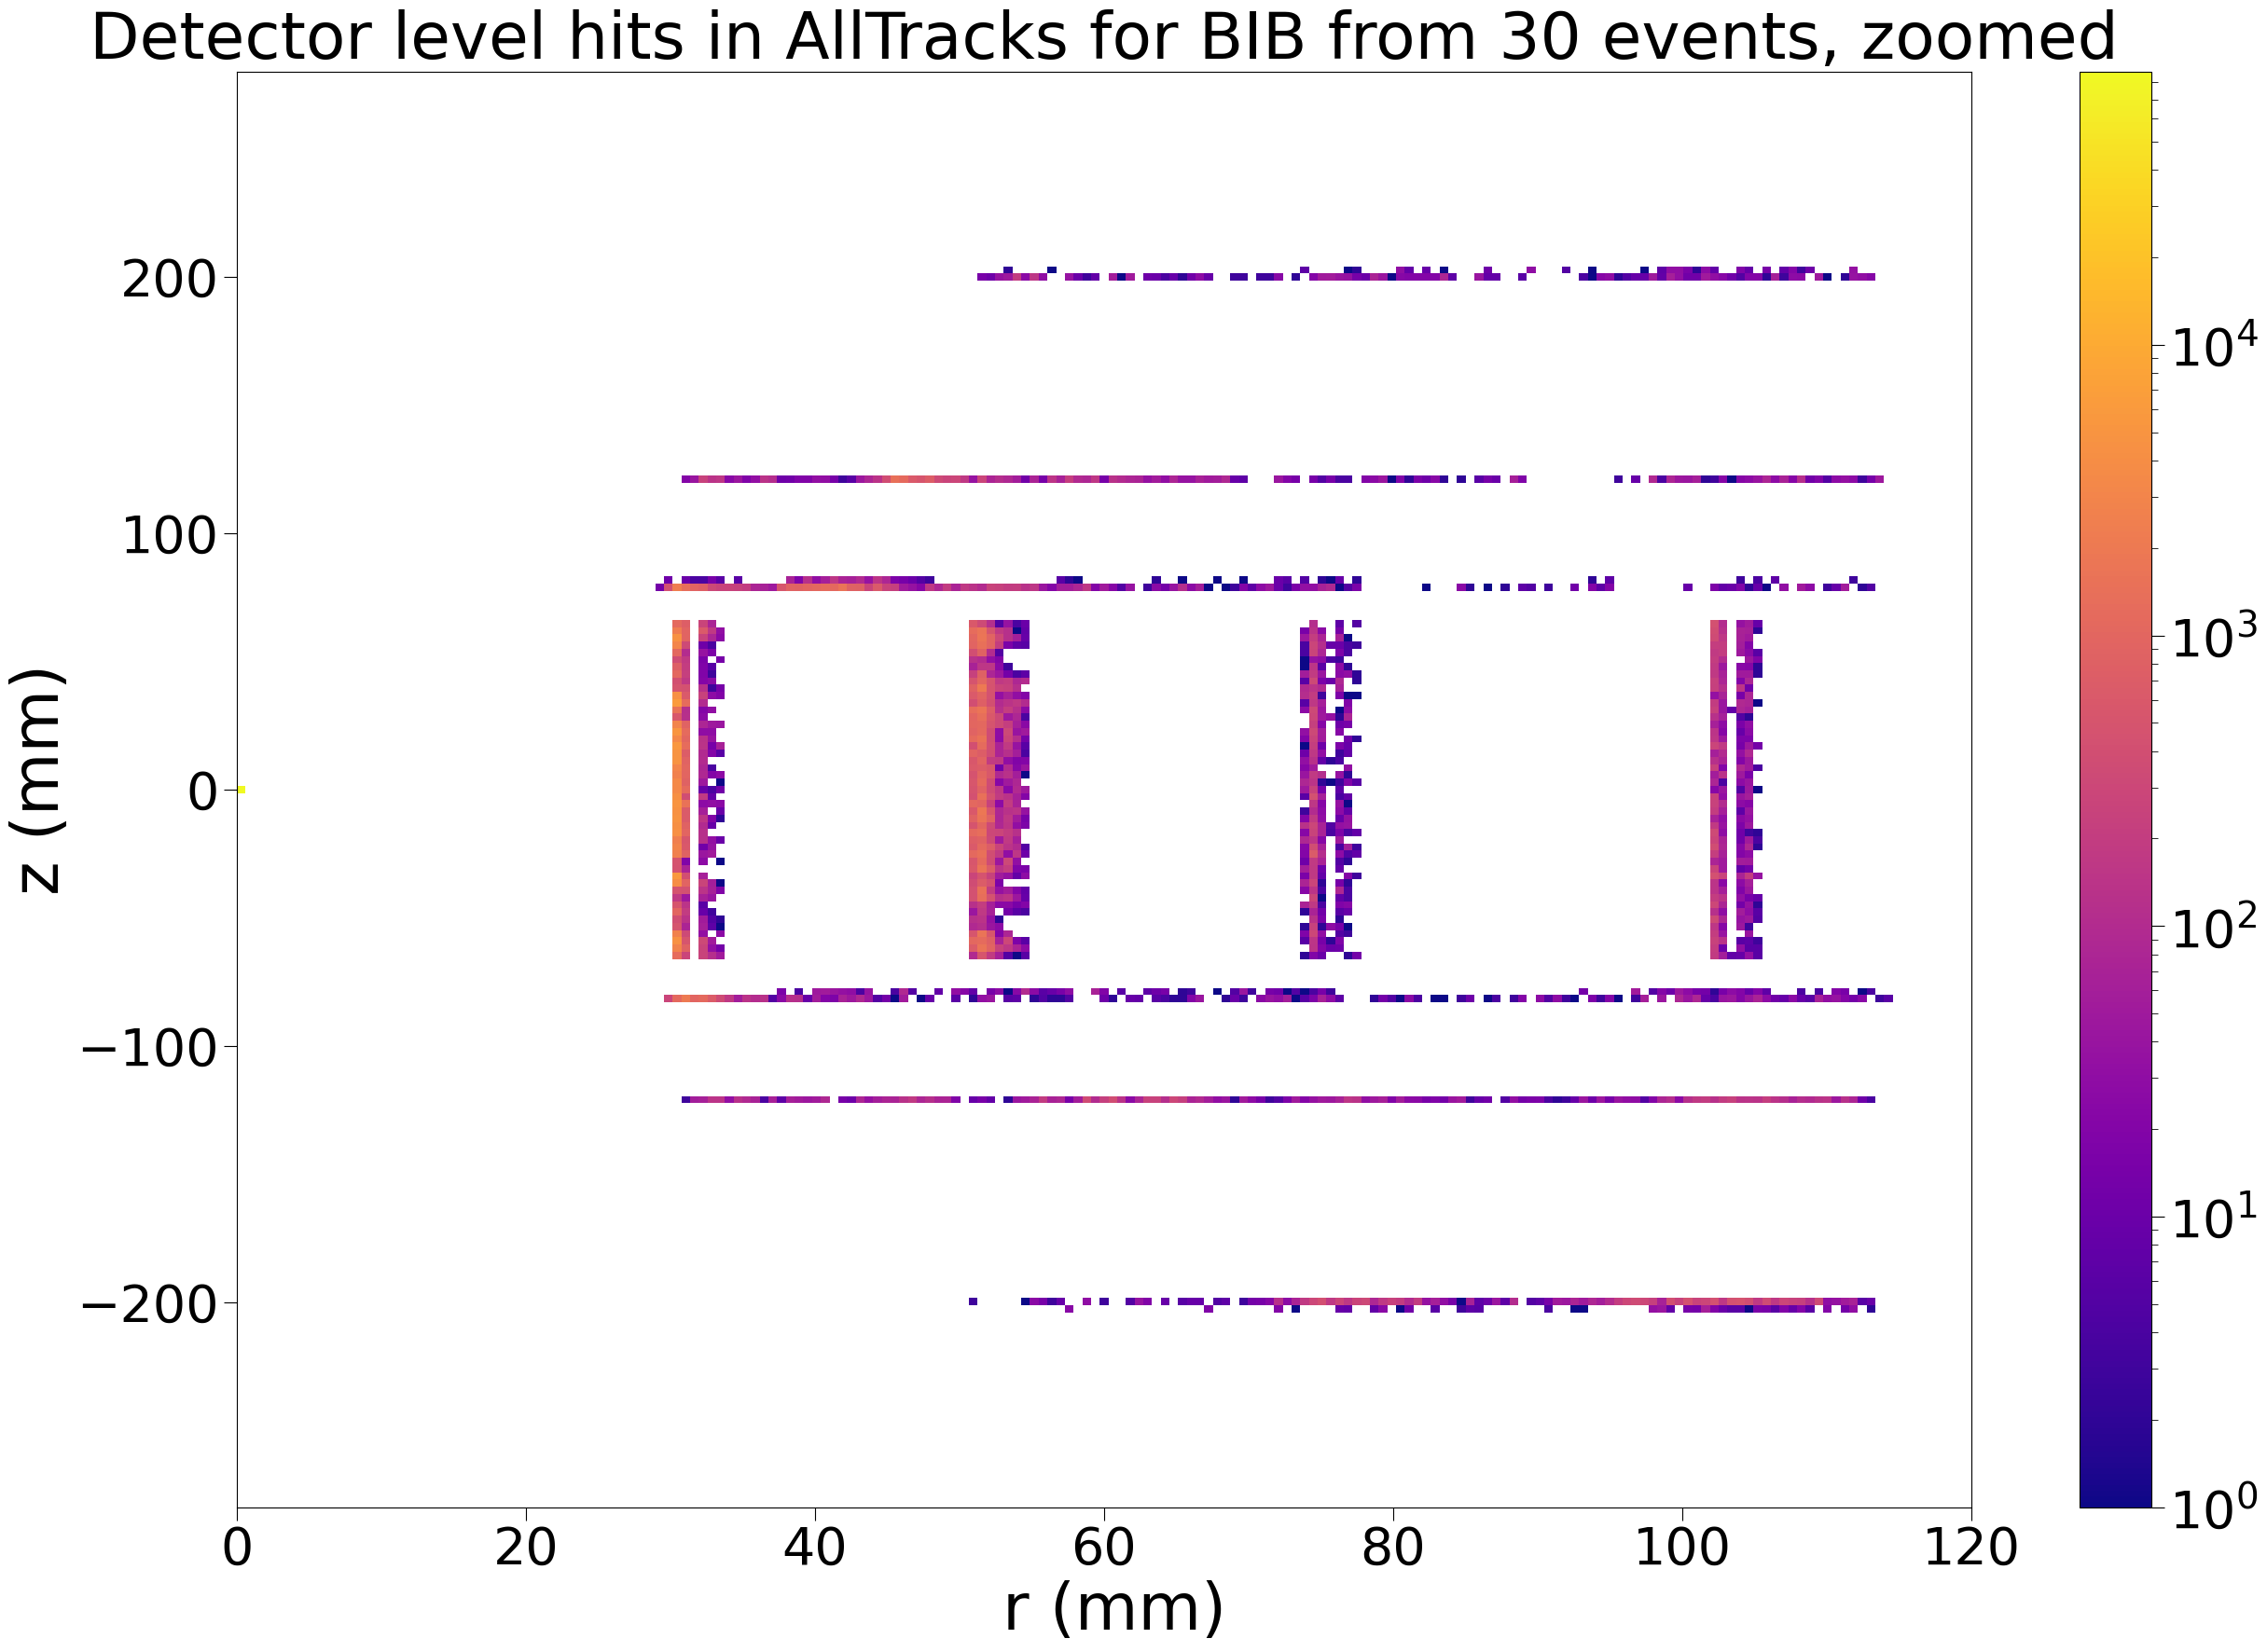

In [27]:
plot2DHistogram(AllBIB["r"],AllBIB["z"], label="Detector level hits in AllTracks for BIB from 30 events, zoomed; r (mm); z (mm)", bins=(np.linspace(0,120,200),np.linspace(-280,280,200)))

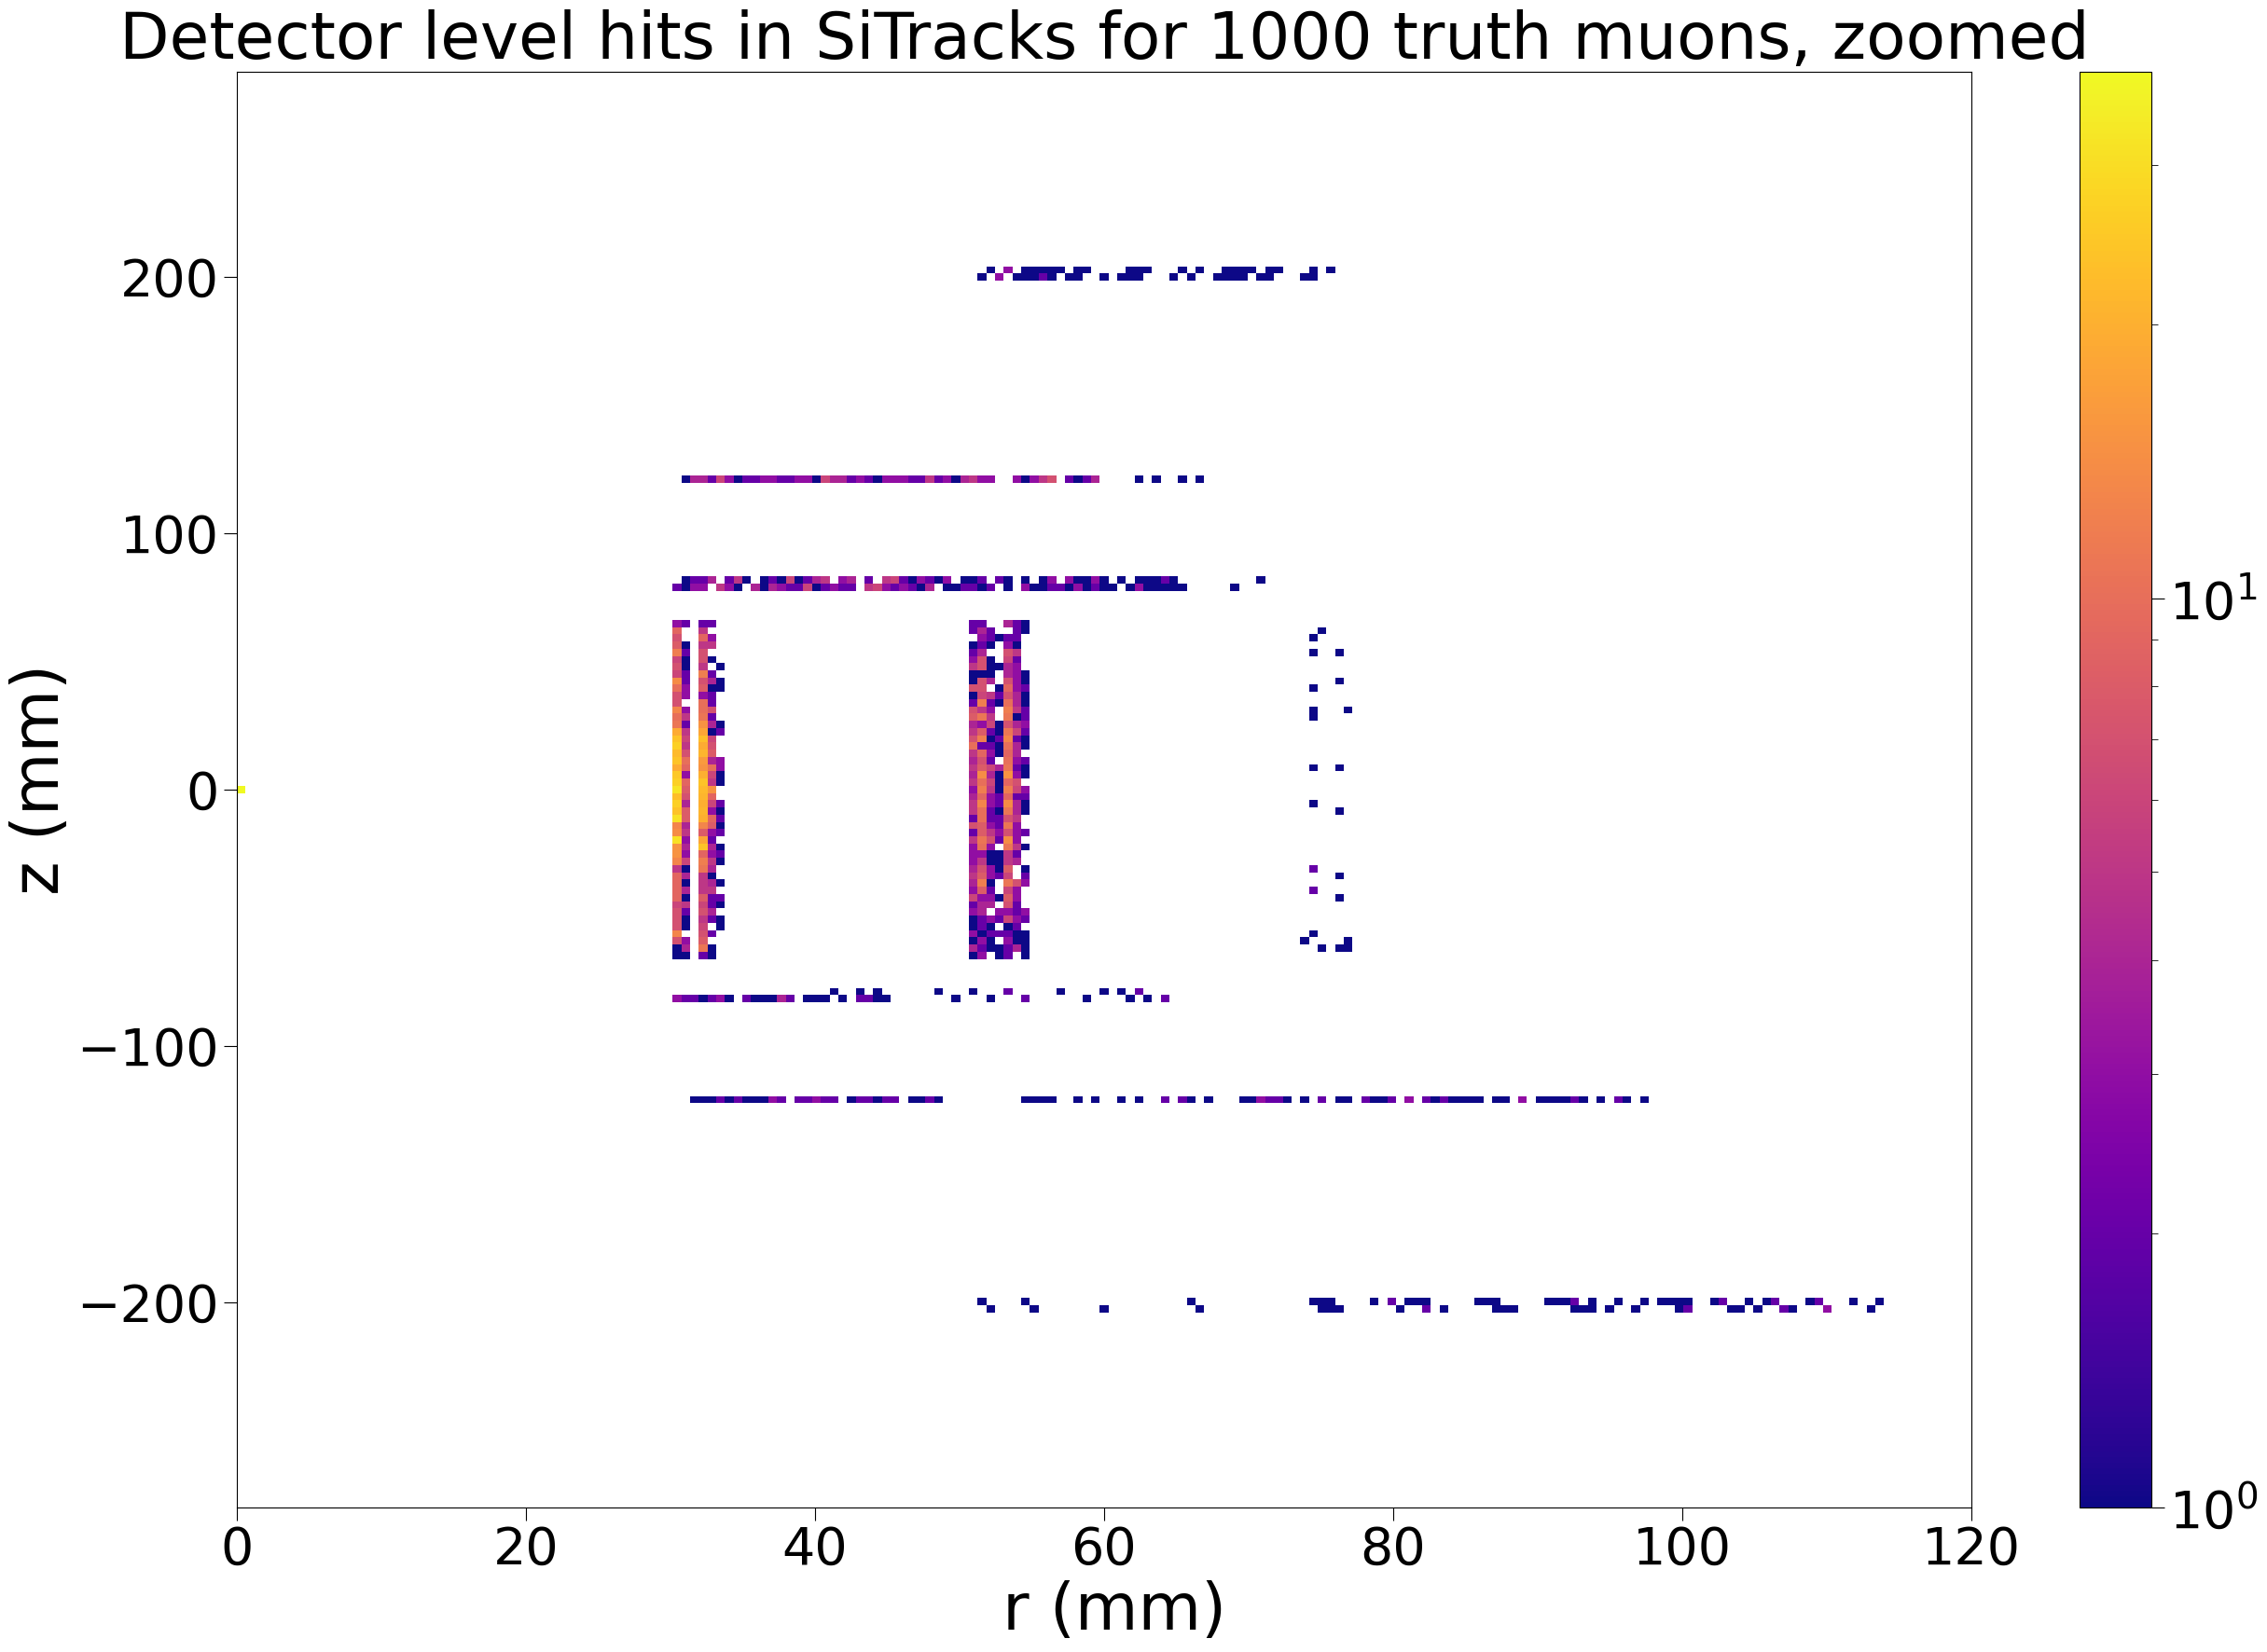

In [28]:
plot2DHistogram(SiNoBIB["r"],SiNoBIB["z"], label="Detector level hits in SiTracks for 1000 truth muons, zoomed; r (mm); z (mm)", bins=(np.linspace(0,120,200),np.linspace(-280,280,200)))

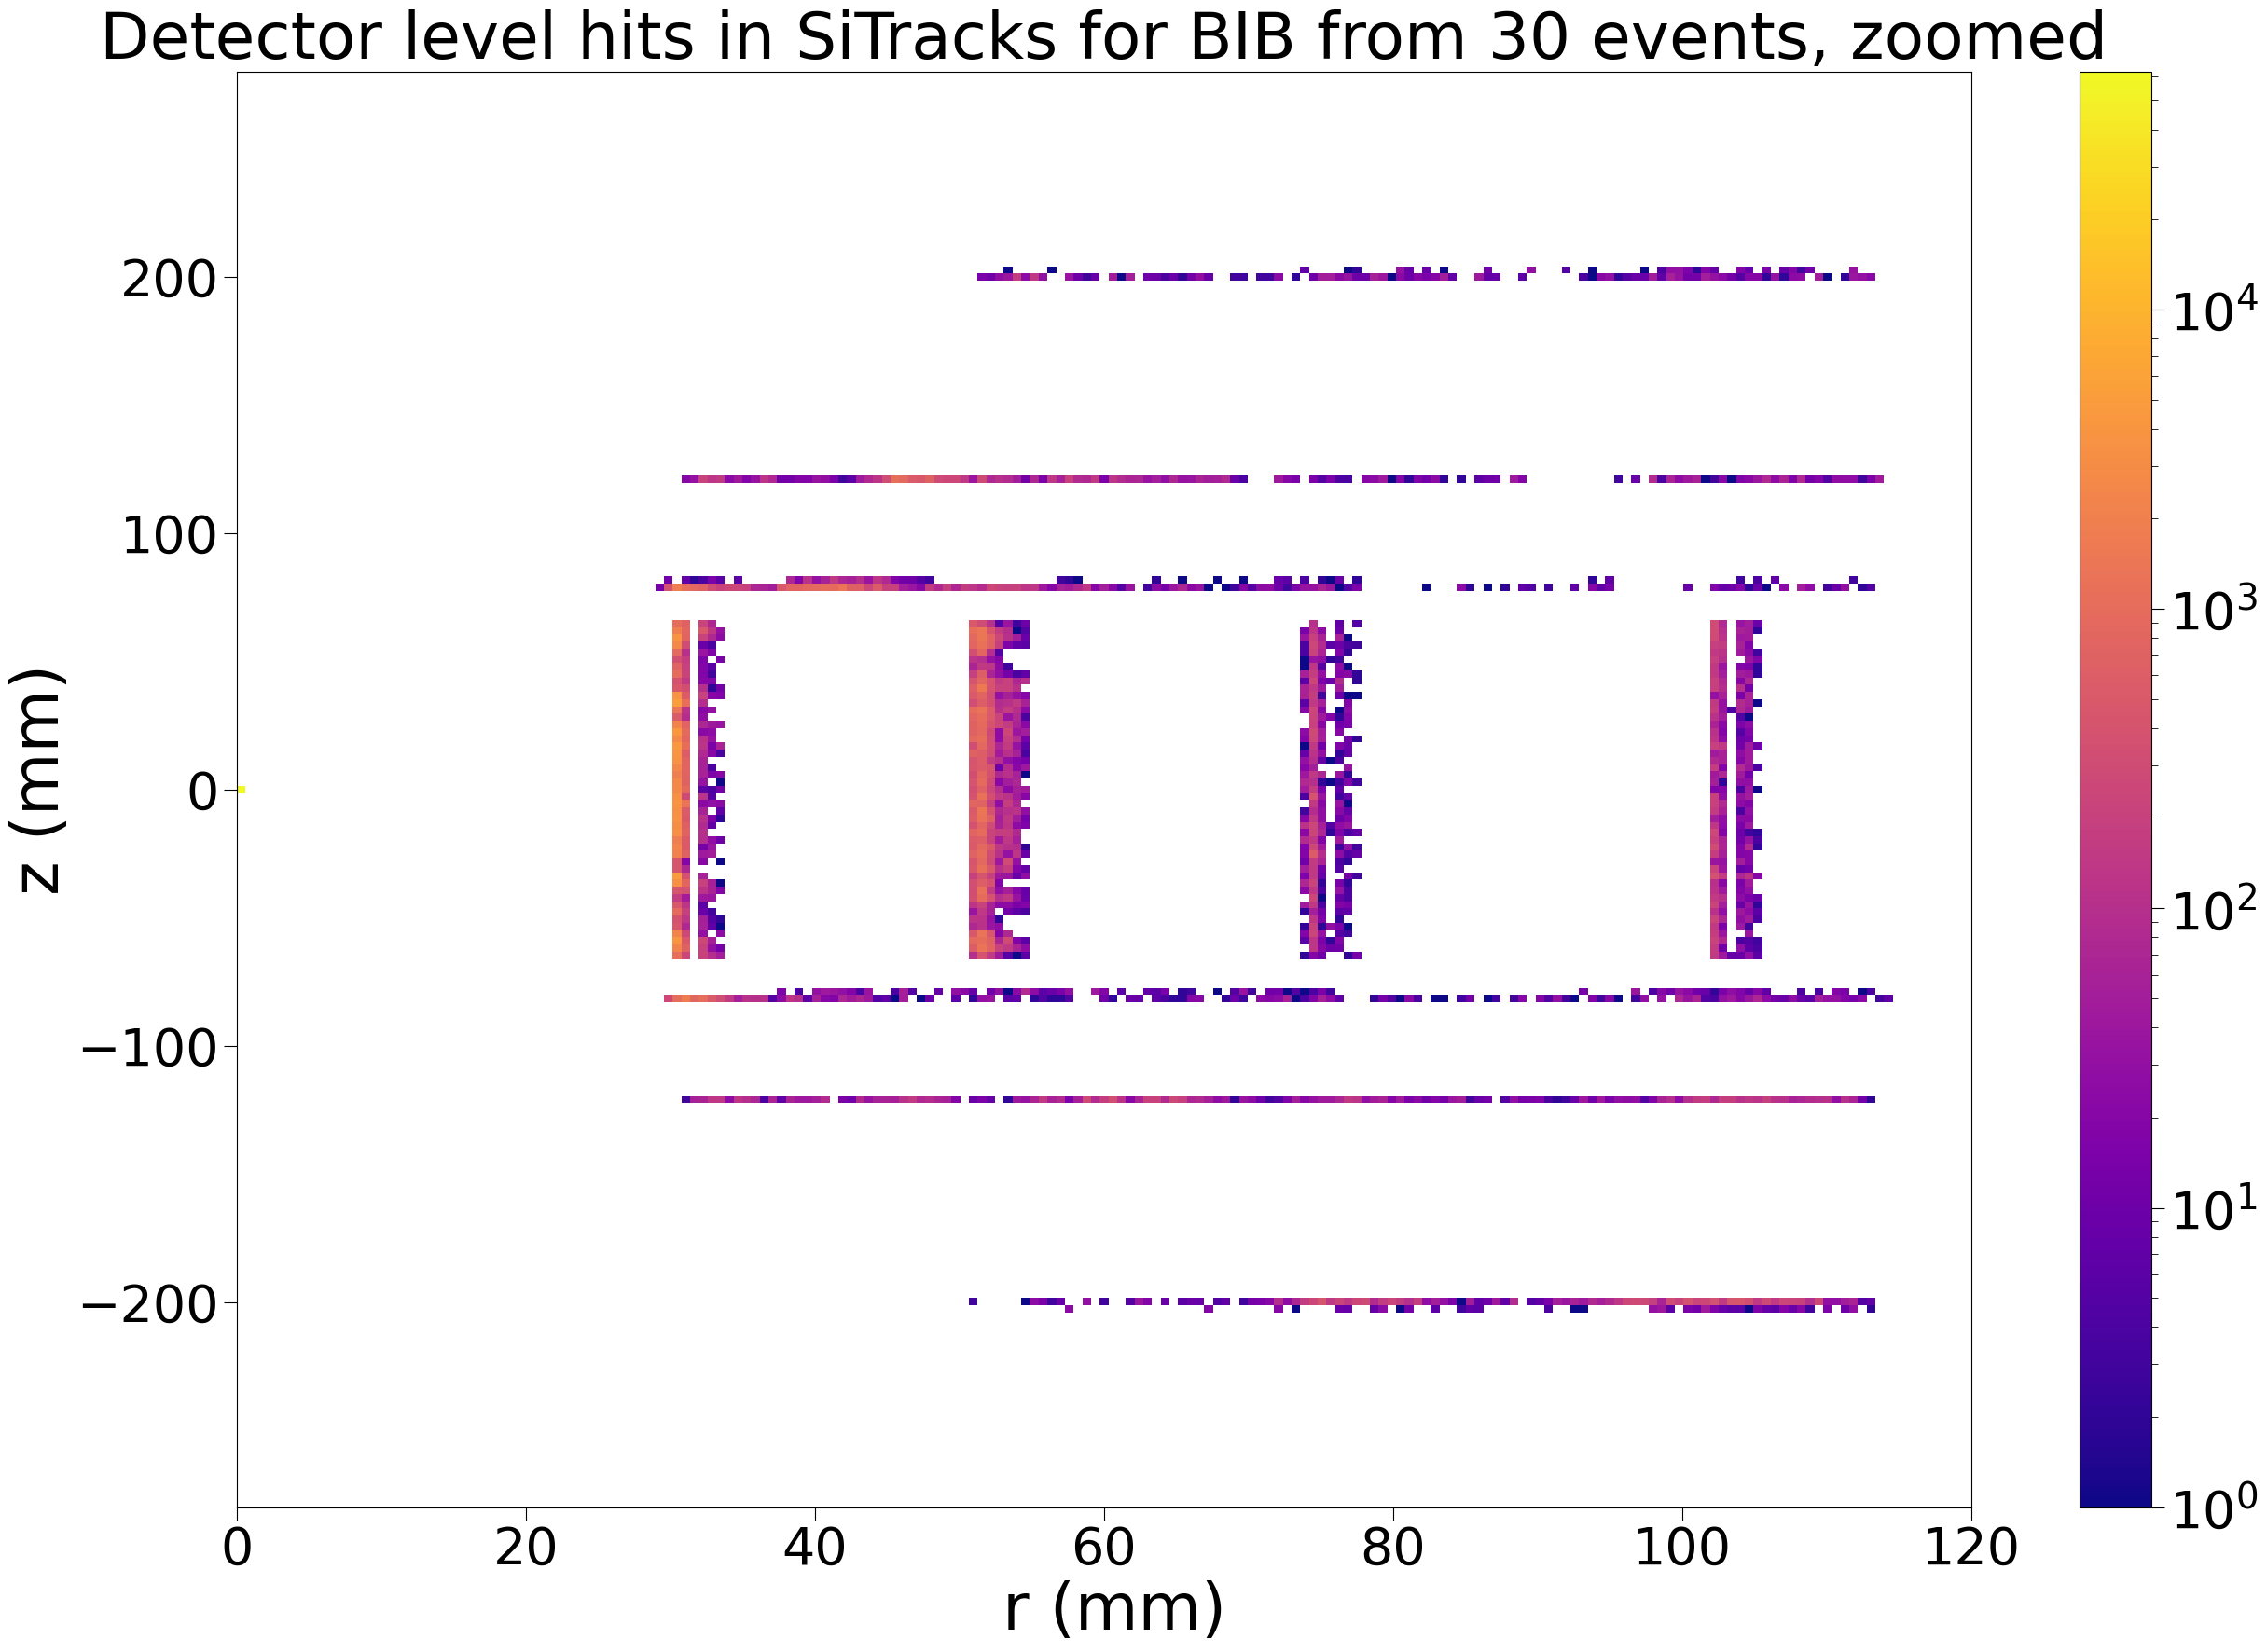

In [29]:
plot2DHistogram(SiBIB["r"],SiBIB["z"], label="Detector level hits in SiTracks for BIB from 30 events, zoomed; r (mm); z (mm)", bins=(np.linspace(0,120,200),np.linspace(-280,280,200)))

# Occupancy Tests

In [30]:
surfacearea=layer_area = np.array([270.40, 270.40, 448.50, 448.50, 655.20, 655.20, 904.80, 904.80,  # VXD barrel
                      389.00, 389.00, 378.96, 378.96, 364.36, 364.36, 312.48, 312.48,  # VXD endcaps
                      389.00, 389.00, 378.96, 378.96, 364.36, 364.36, 312.48, 312.48,
                      8117.85, 22034.16, 51678.81,  # IT barrel
                      6639.65, 10611.59, 10078.04, 9900.19, 9307.37, 8595.98, 8299.56,  # IT endcaps
                      6639.65, 10611.59, 10078.04, 9900.19, 9307.37, 8595.98, 8299.56,
                      140032.91, 194828.39, 249623.88,  # OT barrel
                      69545.45, 69545.45, 69545.45, 69545.45,  # OT endcaps
                      69545.45, 69545.45, 69545.45, 69545.45])

In [31]:
layerPerModule={
    1 : 8,
    2 : 8,
    3 : 3,
    4 : 7,
    5 : 3,
    6 : 4
} #dictionairy to help loop over all layers later
layersBeforeModule={
    1 : 0,
    2 : 8,
    3 : 24,
    4 : 27,
    5 : 41,
    6 : 44
}#Function to help with hashing

In [32]:
def calcOcc(data):
    hits=[] #initializing a array to keep track of hits for each layer
    area=[]
    for i in range(3):
        inLoc=(data["sys"]-1)//2==i
        for j in [0,-1,1]:
            inSide=data["side"]==j
            for k in range(layerPerModule[2*i+abs(j)+1]):
                mask=inLoc & inSide & (data["lay"]==k)
                hits.append(np.sum(mask))
                if np.sum(mask)!=0:
                    r=np.sqrt(data["x"][mask]**2+data["y"][mask]**2)
                    z=data["z"][mask]
                    if j==0:
                        area.append(np.pi*2*max(r)*(max(z)-min(z)))
                    else:
                        area.append((max(r)**2-min(r)**2)*np.pi)
    hits=np.array(hits)
    area=np.array(area)/100
    return (hits,area)

In [33]:
SiBIBOcc=calcOcc(SiBIB)
SiNoBIBOcc=calcOcc(SiNoBIB)

In [34]:
AllBIBOcc=calcOcc(AllBIB)
AllNoBIBOcc=calcOcc(AllNoBIB)

In [35]:
print(len(SiBIBOcc[0]))
print(len(SiNoBIBOcc[0]))

52
52


Text(0.5, 1.0, "Background hits rate for muonguns' SiTracks with BIB")

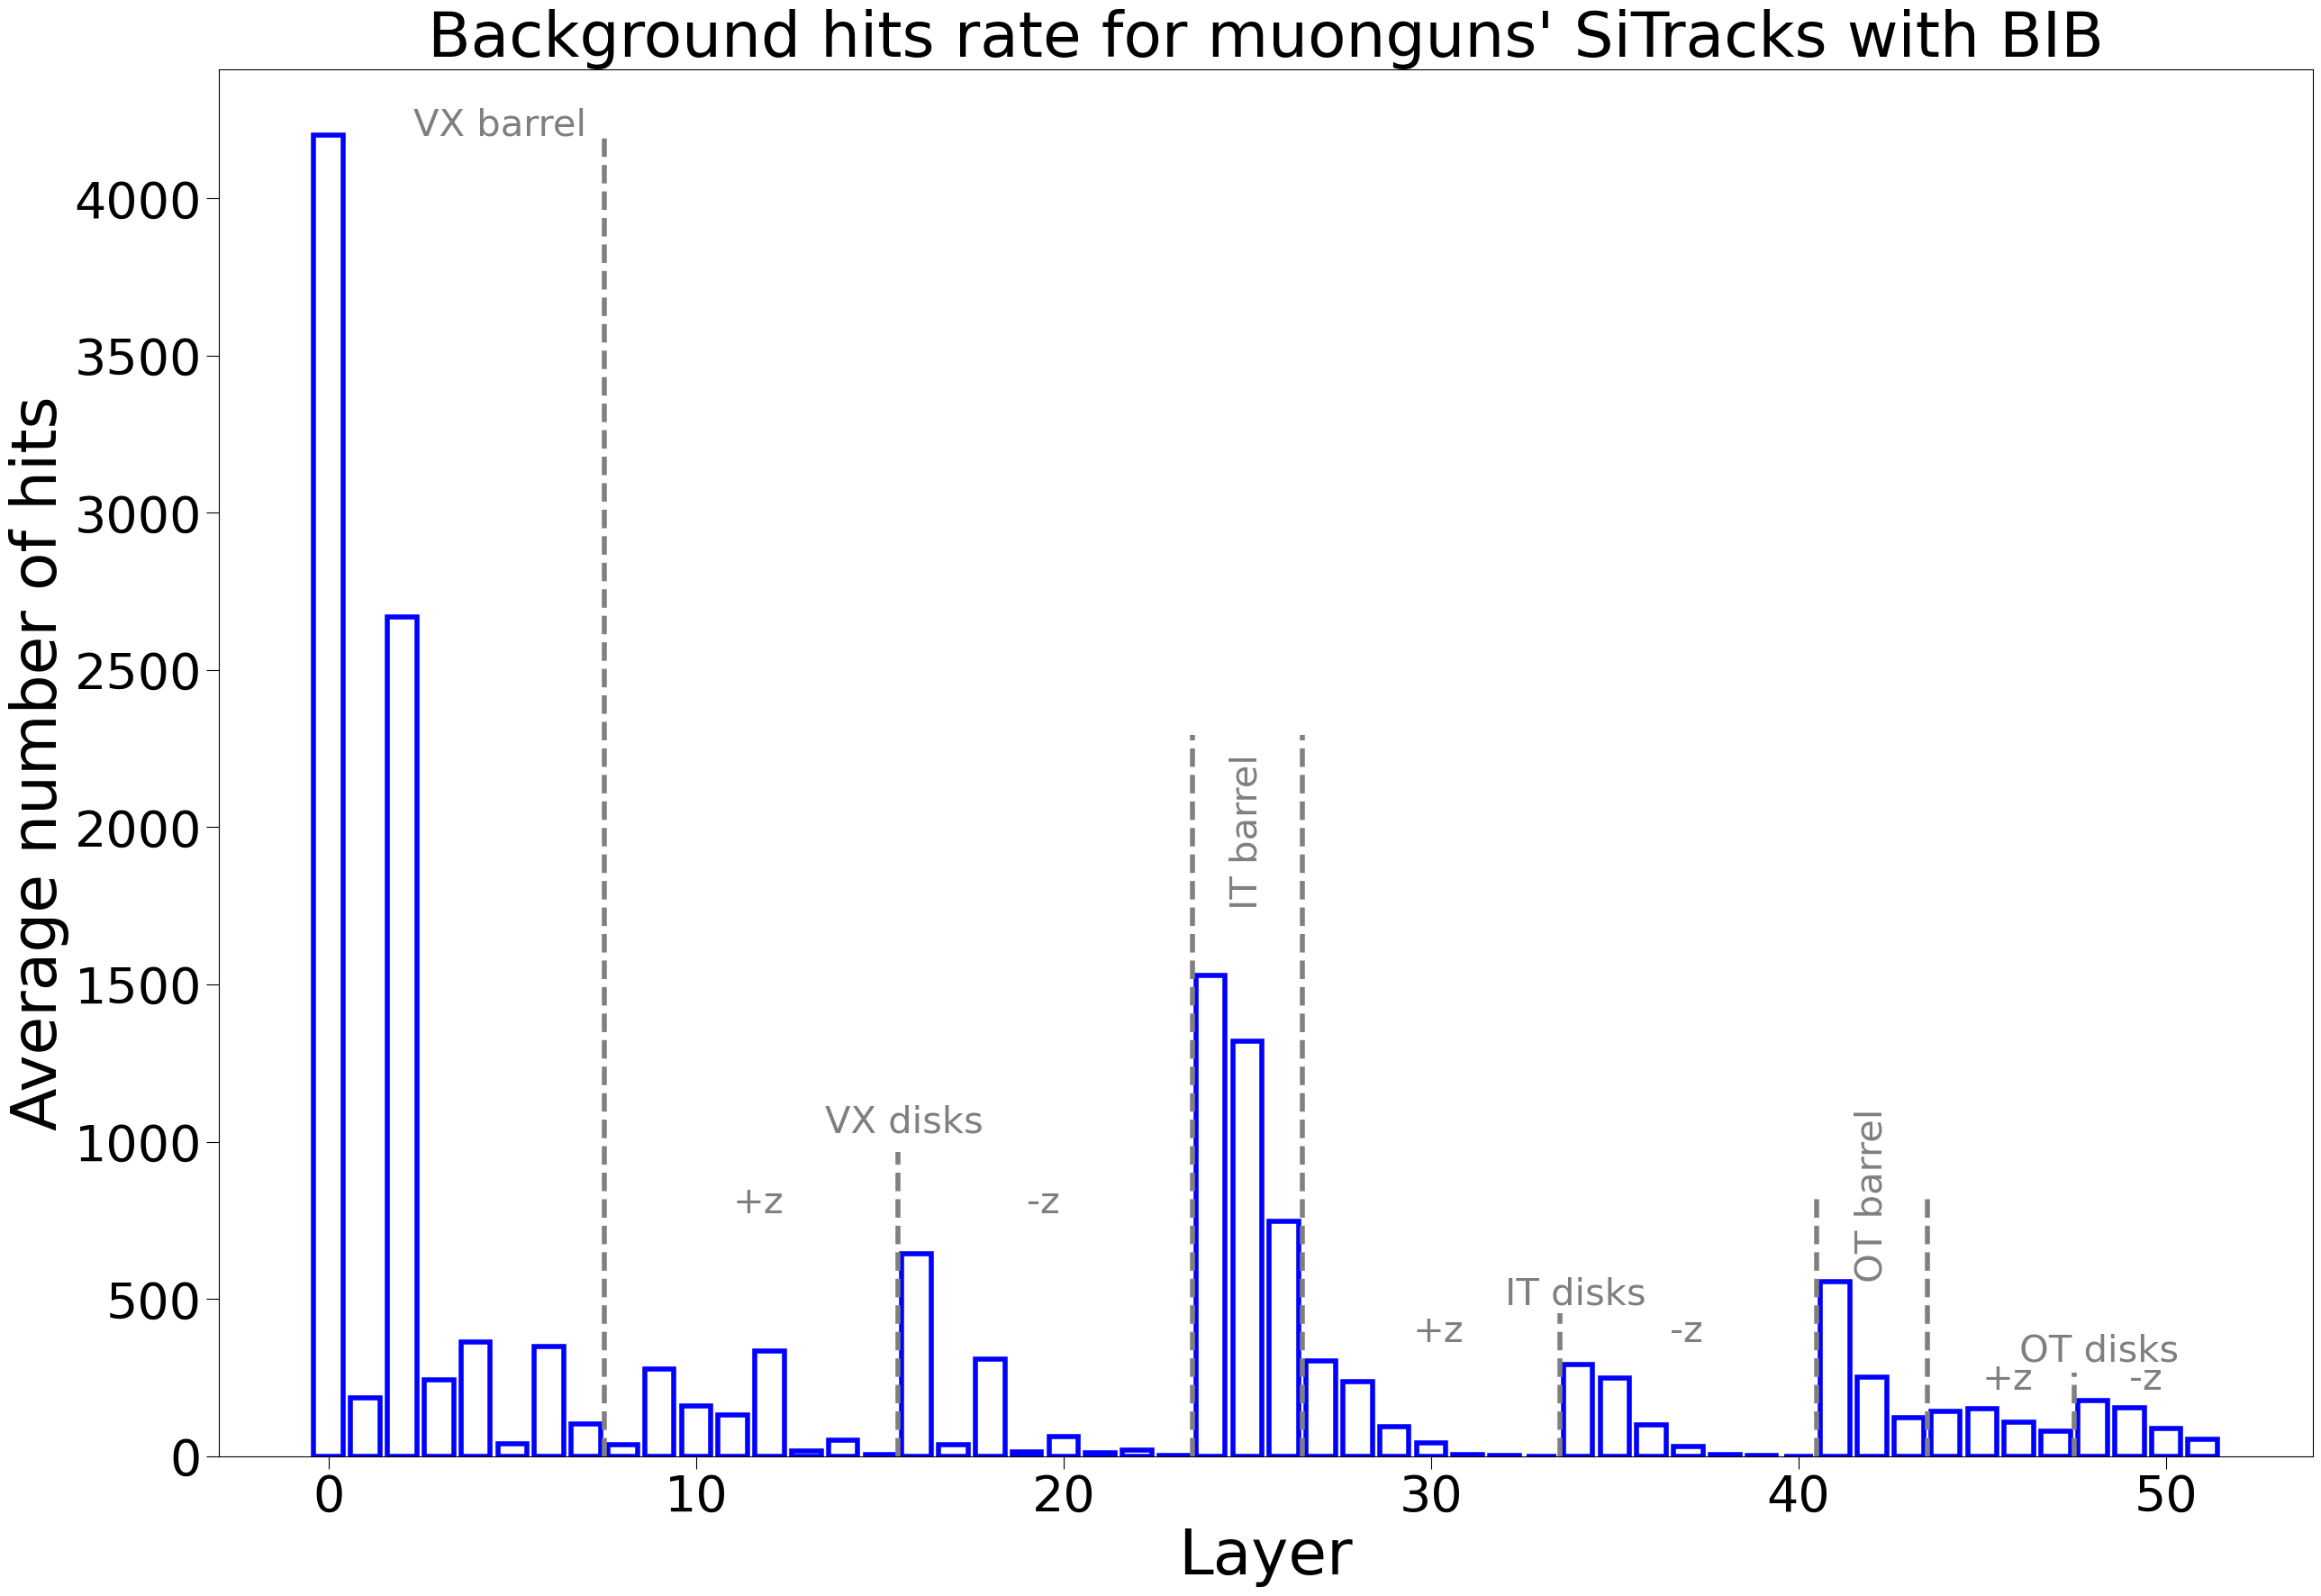

In [46]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)

nSiBIB=30

ax.bar(range(52), SiBIBOcc[0]/nSiBIB, fill=False, linewidth=4, edgecolor="blue")

ax.vlines(7.5, ymin=0, ymax=max(SiBIBOcc[0][:16]/nSiBIB), colors="grey", linestyle="dashed", linewidth=4)
ax.text(2.3,max(SiBIBOcc[0][:16]/nSiBIB), "VX barrel", fontsize=30, alpha=0.5)

ax.vlines(15.50, ymin=0, ymax=max(SiBIBOcc[0][8:24]/nSiBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(13.5,max(SiBIBOcc[0][8:24]/nSiBIB)*1.6, "VX disks", fontsize=30, alpha=0.5)
ax.text(11,max(SiBIBOcc[0][8:24]/nSiBIB)*1.2, "+z", fontsize=30, alpha=0.5)
ax.text(19,max(SiBIBOcc[0][8:24]/nSiBIB)*1.2, "-z", fontsize=30, alpha=0.5)

ax.vlines(23.50, ymin=0, ymax=max(SiBIBOcc[0][16:27]/nSiBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)

ax.vlines(26.5, ymin=0, ymax=max(SiBIBOcc[0][24:34]/nSiBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(24.5,max(SiBIBOcc[0][24:34]/nSiBIB)*1.3, "IT barrel", fontsize=30, rotation=90, va='center', alpha=0.5)

ax.vlines(33.5, ymin=0, ymax=max(SiBIBOcc[0][27:41]/nSiBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(32,max(SiBIBOcc[0][27:41]/nSiBIB)*1.6, "IT disks", fontsize=30, alpha=0.5)
ax.text(29.5,max(SiBIBOcc[0][27:41]/nSiBIB)*1.2, "+z", fontsize=30, alpha=0.5)
ax.text(36.5,max(SiBIBOcc[0][27:41]/nSiBIB)*1.2, "-z", fontsize=30, alpha=0.5)

ax.vlines(40.5, ymin=0, ymax=max(SiBIBOcc[0][34:44]/nSiBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)

ax.vlines(43.5, ymin=0, ymax=max(SiBIBOcc[0][41:]/nSiBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(41.5,max(SiBIBOcc[0][41:]/nSiBIB)*1.5, "OT barrel", fontsize=30, rotation=90, va='center', alpha=0.5)

ax.vlines(47.5, ymin=0, ymax=max(SiBIBOcc[0][44:]/nSiBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(46,max(SiBIBOcc[0][44:]/nSiBIB)*1.7, "OT disks", fontsize=30, alpha=0.5)
ax.text(45,max(SiBIBOcc[0][44:]/nSiBIB)*1.2, "+z", fontsize=30, alpha=0.5)
ax.text(49,max(SiBIBOcc[0][44:]/nSiBIB)*1.2, "-z", fontsize=30, alpha=0.5)

ax.set_ylabel(f"Average number of hits")
ax.set_xlabel("Layer")
ax.set_title("Background hits rate for muonguns' SiTracks with BIB")

Text(0.5, 1.0, "Background hits rate for muonguns' SiTracks without BIB")

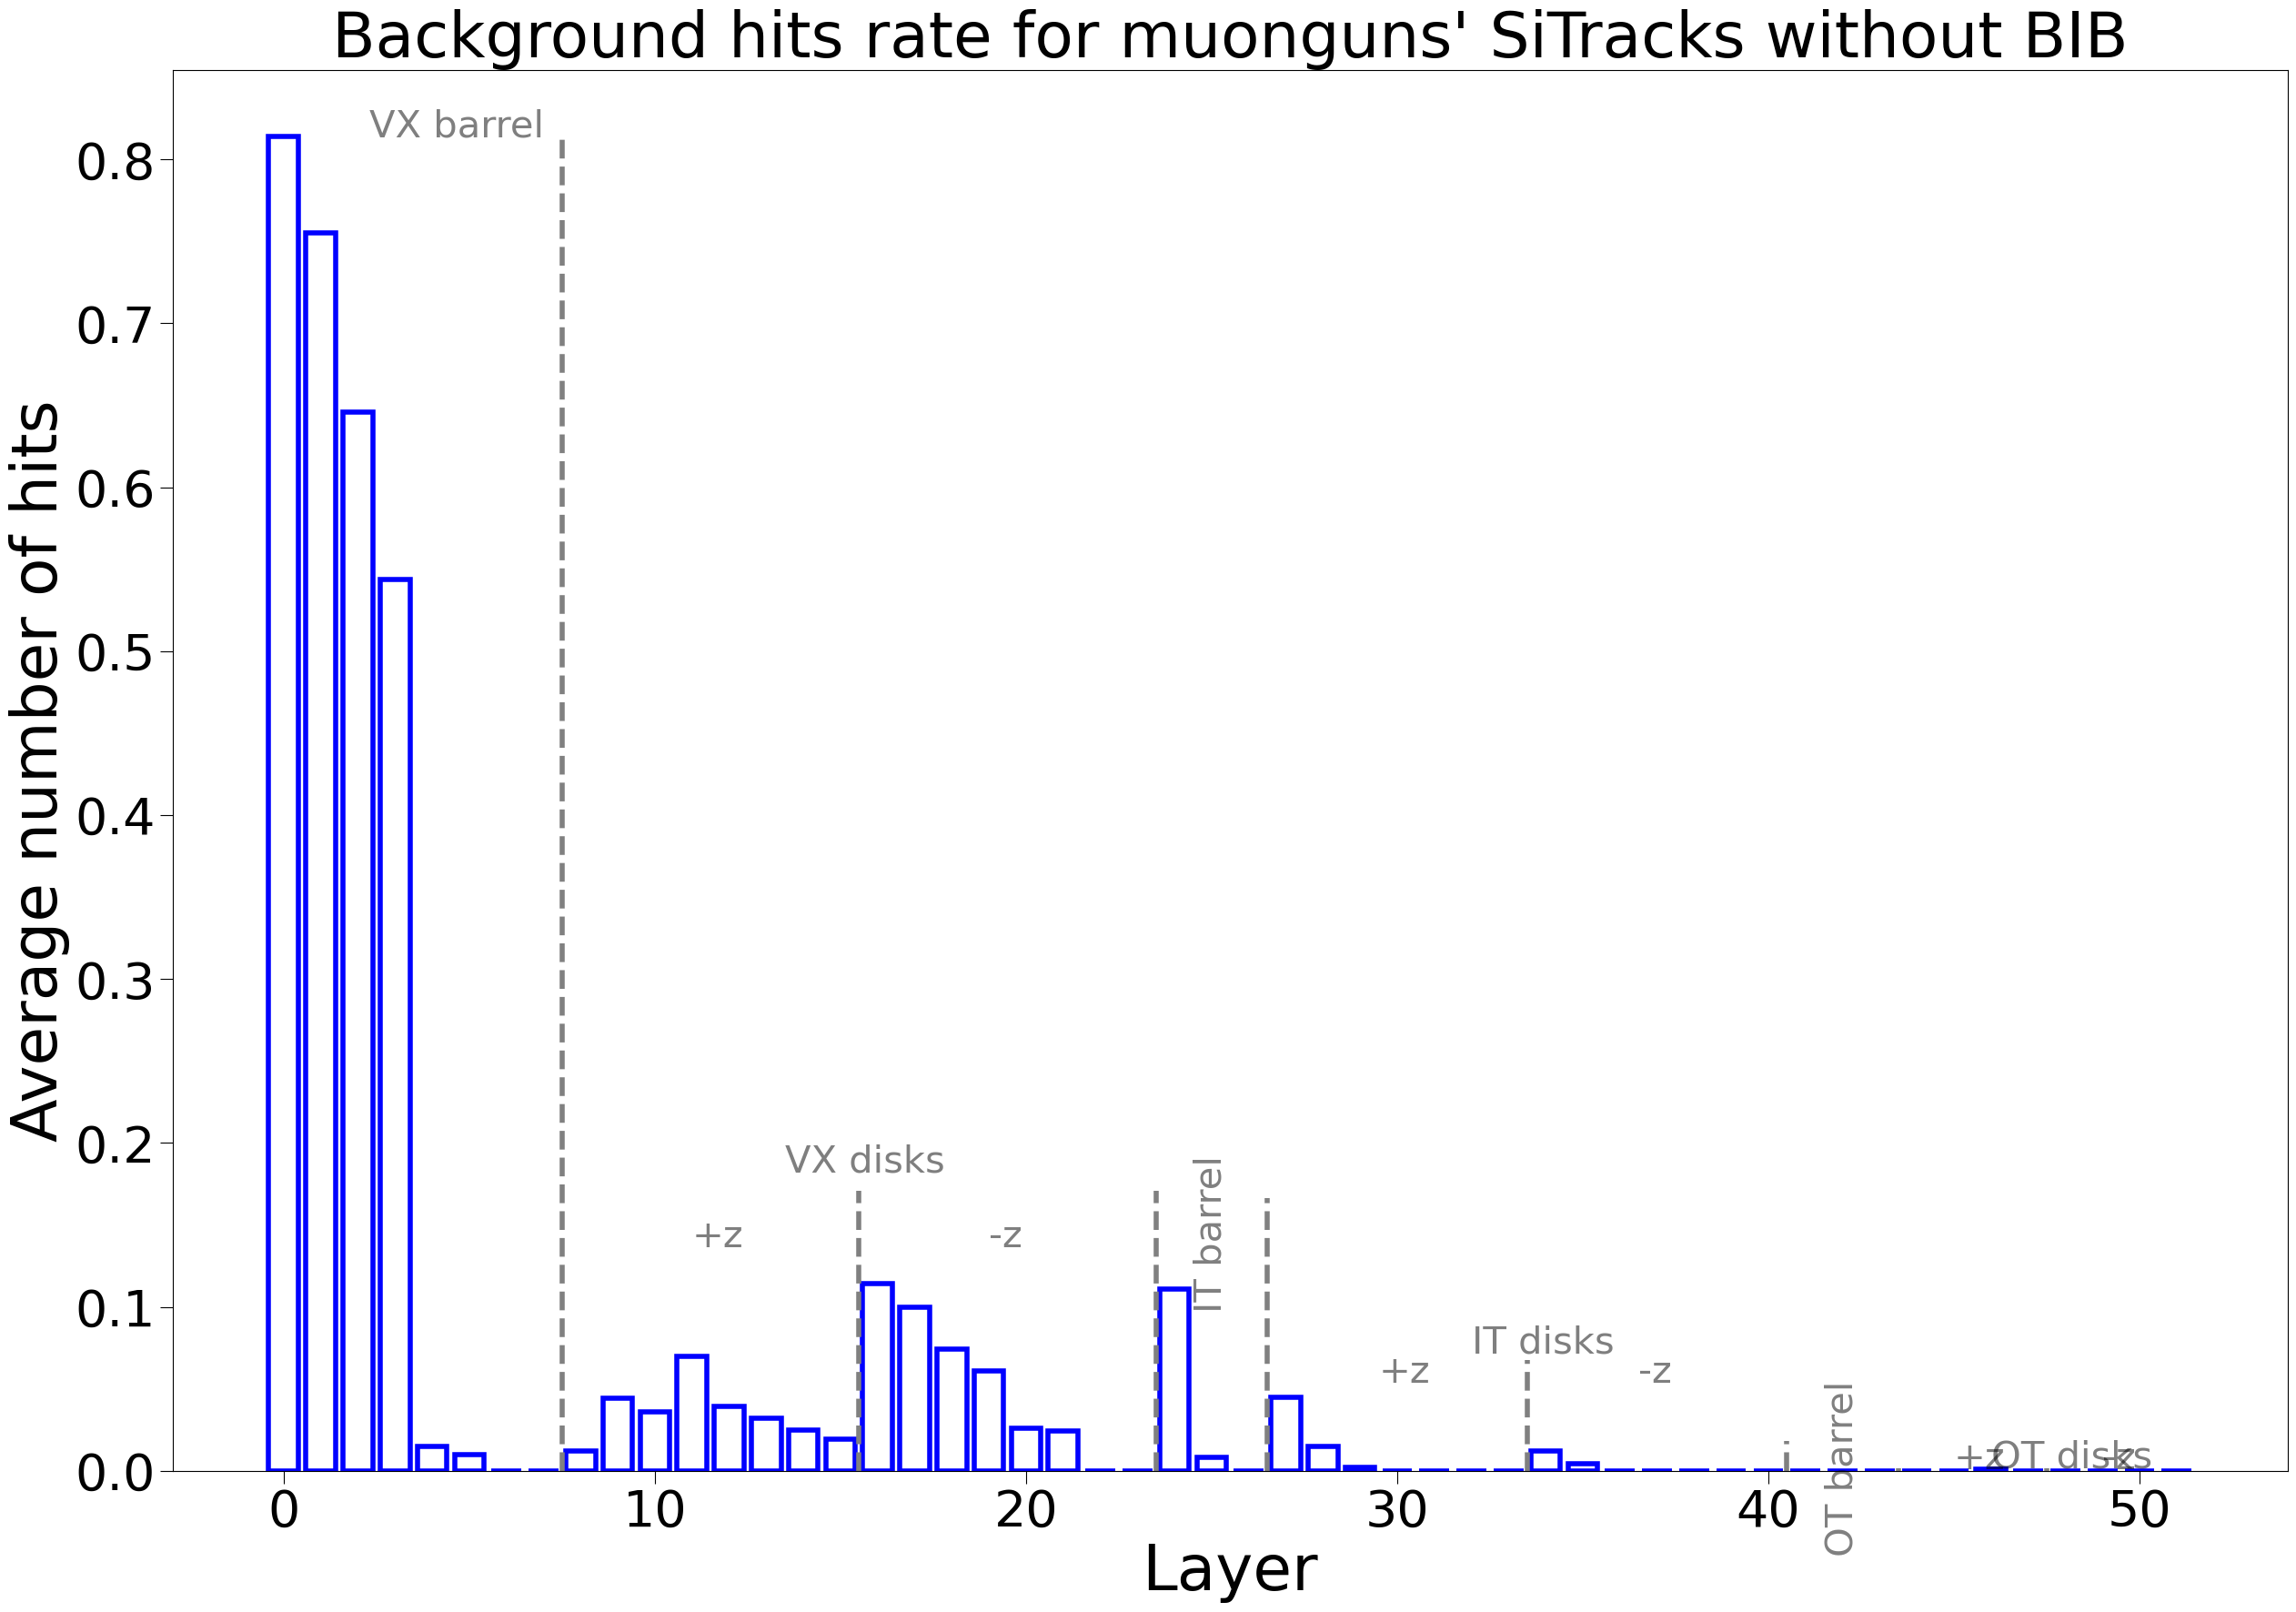

In [47]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)

nSiNoBIB=1000

ax.bar(range(52), SiNoBIBOcc[0]/nSiNoBIB, fill=False, linewidth=4, edgecolor="blue")

ax.vlines(7.5, ymin=0, ymax=max(SiNoBIBOcc[0][:16]/nSiNoBIB), colors="grey", linestyle="dashed", linewidth=4)
ax.text(2.3,max(SiNoBIBOcc[0][:16]/nSiNoBIB), "VX barrel", fontsize=30, alpha=0.5)

ax.vlines(15.50, ymin=0, ymax=max(SiNoBIBOcc[0][8:24]/nSiNoBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(13.5,max(SiNoBIBOcc[0][8:24]/nSiNoBIB)*1.6, "VX disks", fontsize=30, alpha=0.5)
ax.text(11,max(SiNoBIBOcc[0][8:24]/nSiNoBIB)*1.2, "+z", fontsize=30, alpha=0.5)
ax.text(19,max(SiNoBIBOcc[0][8:24]/nSiNoBIB)*1.2, "-z", fontsize=30, alpha=0.5)

ax.vlines(23.50, ymin=0, ymax=max(SiNoBIBOcc[0][16:27]/nSiNoBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)

ax.vlines(26.5, ymin=0, ymax=max(SiNoBIBOcc[0][24:34]/nSiNoBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(24.5,max(SiNoBIBOcc[0][24:34]/nSiNoBIB)*1.3, "IT barrel", fontsize=30, rotation=90, va='center', alpha=0.5)

ax.vlines(33.5, ymin=0, ymax=max(SiNoBIBOcc[0][27:41]/nSiNoBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(32,max(SiNoBIBOcc[0][27:41]/nSiNoBIB)*1.6, "IT disks", fontsize=30, alpha=0.5)
ax.text(29.5,max(SiNoBIBOcc[0][27:41]/nSiNoBIB)*1.2, "+z", fontsize=30, alpha=0.5)
ax.text(36.5,max(SiNoBIBOcc[0][27:41]/nSiNoBIB)*1.2, "-z", fontsize=30, alpha=0.5)

ax.vlines(40.5, ymin=0, ymax=max(SiNoBIBOcc[0][34:44]/nSiNoBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)

ax.vlines(43.5, ymin=0, ymax=max(SiNoBIBOcc[0][41:]/nSiNoBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(41.5,max(SiNoBIBOcc[0][41:]/nSiNoBIB)*1.5, "OT barrel", fontsize=30, rotation=90, va='center', alpha=0.5)

ax.vlines(47.5, ymin=0, ymax=max(SiNoBIBOcc[0][44:]/nSiNoBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(46,max(SiNoBIBOcc[0][44:]/nSiNoBIB)*1.7, "OT disks", fontsize=30, alpha=0.5)
ax.text(45,max(SiNoBIBOcc[0][44:]/nSiNoBIB)*1.2, "+z", fontsize=30, alpha=0.5)
ax.text(49,max(SiNoBIBOcc[0][44:]/nSiNoBIB)*1.2, "-z", fontsize=30, alpha=0.5)

ax.set_ylabel(f"Average number of hits")
ax.set_xlabel("Layer")
ax.set_title("Background hits rate for muonguns' SiTracks without BIB")

Text(0.5, 1.0, "Background hits rate for muonguns' AllTracks with BIB")

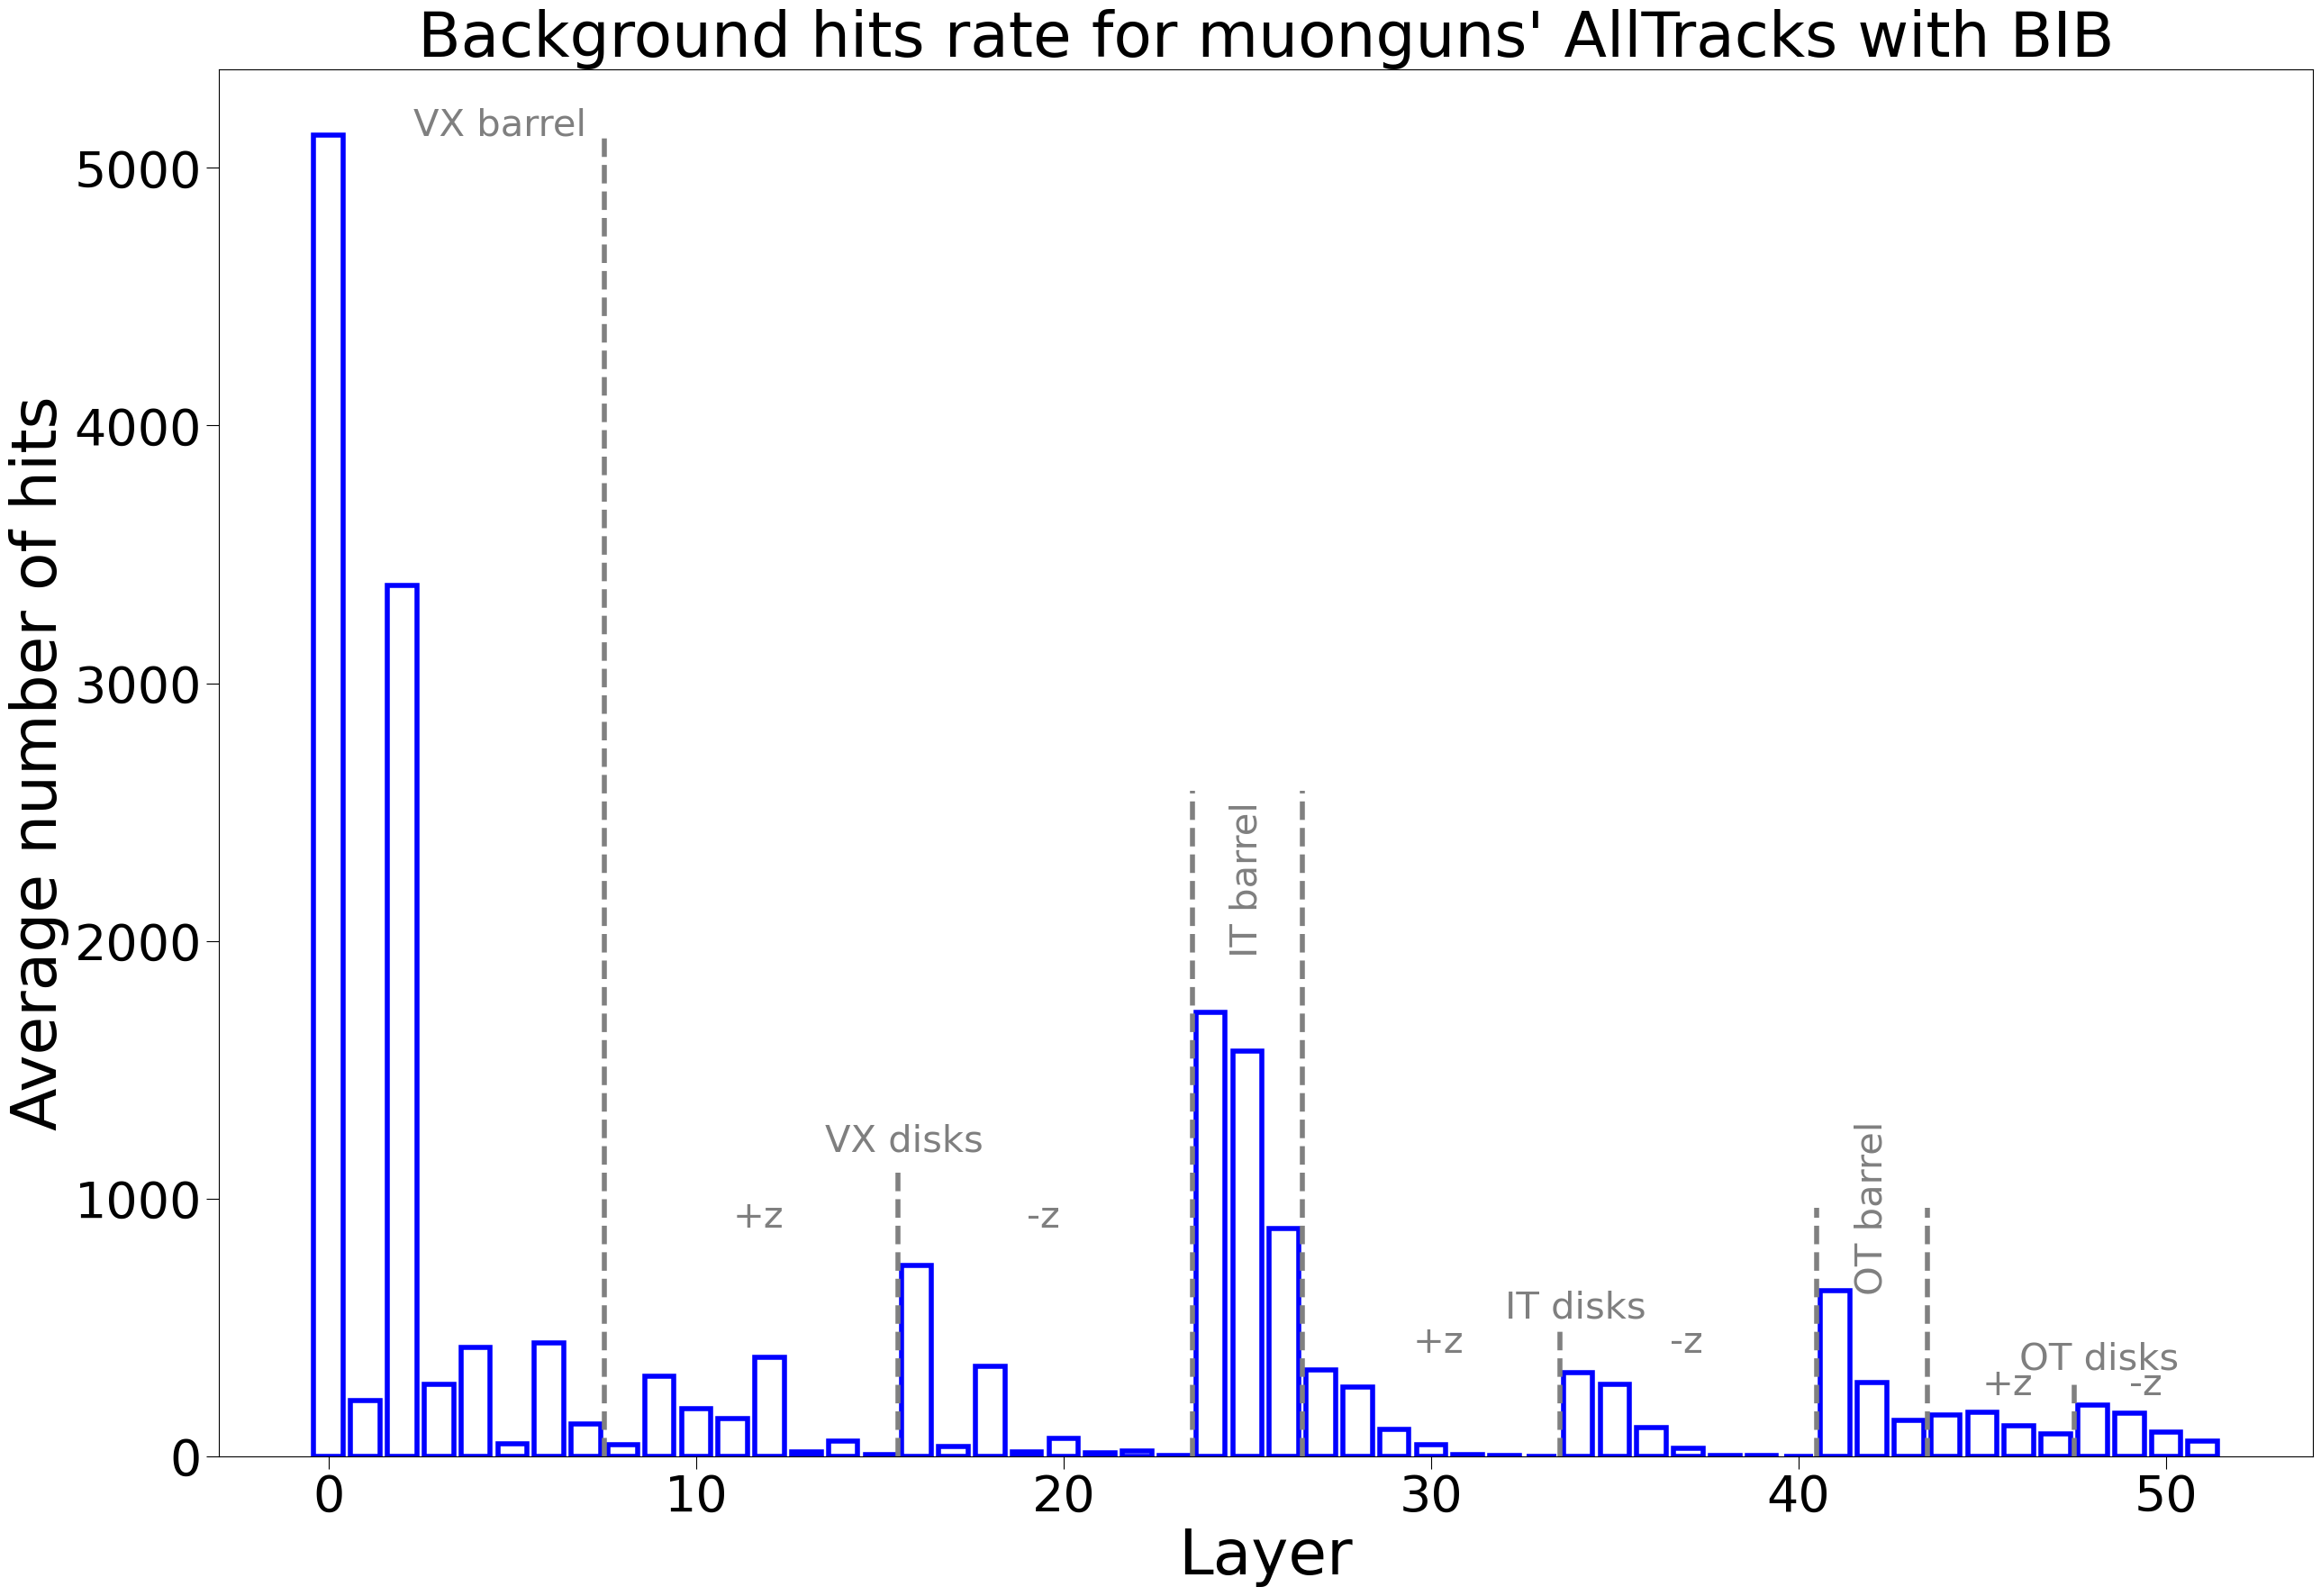

In [48]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)

nAllBIB=30

ax.bar(range(52), AllBIBOcc[0]/nAllBIB, fill=False, linewidth=4, edgecolor="blue")

ax.vlines(7.5, ymin=0, ymax=max(AllBIBOcc[0][:16]/nAllBIB), colors="grey", linestyle="dashed", linewidth=4)
ax.text(2.3,max(AllBIBOcc[0][:16]/nAllBIB), "VX barrel", fontsize=30, alpha=0.5)

ax.vlines(15.50, ymin=0, ymax=max(AllBIBOcc[0][8:24]/nAllBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(13.5,max(AllBIBOcc[0][8:24]/nAllBIB)*1.6, "VX disks", fontsize=30, alpha=0.5)
ax.text(11,max(AllBIBOcc[0][8:24]/nAllBIB)*1.2, "+z", fontsize=30, alpha=0.5)
ax.text(19,max(AllBIBOcc[0][8:24]/nAllBIB)*1.2, "-z", fontsize=30, alpha=0.5)

ax.vlines(23.50, ymin=0, ymax=max(AllBIBOcc[0][16:27]/nAllBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)

ax.vlines(26.5, ymin=0, ymax=max(AllBIBOcc[0][24:34]/nAllBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(24.5,max(AllBIBOcc[0][24:34]/nAllBIB)*1.3, "IT barrel", fontsize=30, rotation=90, va='center', alpha=0.5)

ax.vlines(33.5, ymin=0, ymax=max(AllBIBOcc[0][27:41]/nAllBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(32,max(AllBIBOcc[0][27:41]/nAllBIB)*1.6, "IT disks", fontsize=30, alpha=0.5)
ax.text(29.5,max(AllBIBOcc[0][27:41]/nAllBIB)*1.2, "+z", fontsize=30, alpha=0.5)
ax.text(36.5,max(AllBIBOcc[0][27:41]/nAllBIB)*1.2, "-z", fontsize=30, alpha=0.5)

ax.vlines(40.5, ymin=0, ymax=max(AllBIBOcc[0][34:44]/nAllBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)

ax.vlines(43.5, ymin=0, ymax=max(AllBIBOcc[0][41:]/nAllBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(41.5,max(AllBIBOcc[0][41:]/nAllBIB)*1.5, "OT barrel", fontsize=30, rotation=90, va='center', alpha=0.5)

ax.vlines(47.5, ymin=0, ymax=max(AllBIBOcc[0][44:]/nAllBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(46,max(AllBIBOcc[0][44:]/nAllBIB)*1.7, "OT disks", fontsize=30, alpha=0.5)
ax.text(45,max(AllBIBOcc[0][44:]/nAllBIB)*1.2, "+z", fontsize=30, alpha=0.5)
ax.text(49,max(AllBIBOcc[0][44:]/nAllBIB)*1.2, "-z", fontsize=30, alpha=0.5)

ax.set_ylabel(f"Average number of hits")
ax.set_xlabel("Layer")
ax.set_title("Background hits rate for muonguns' AllTracks with BIB")

Text(0.5, 1.0, "Background hits rate for muonguns' AllTracks without BIB")

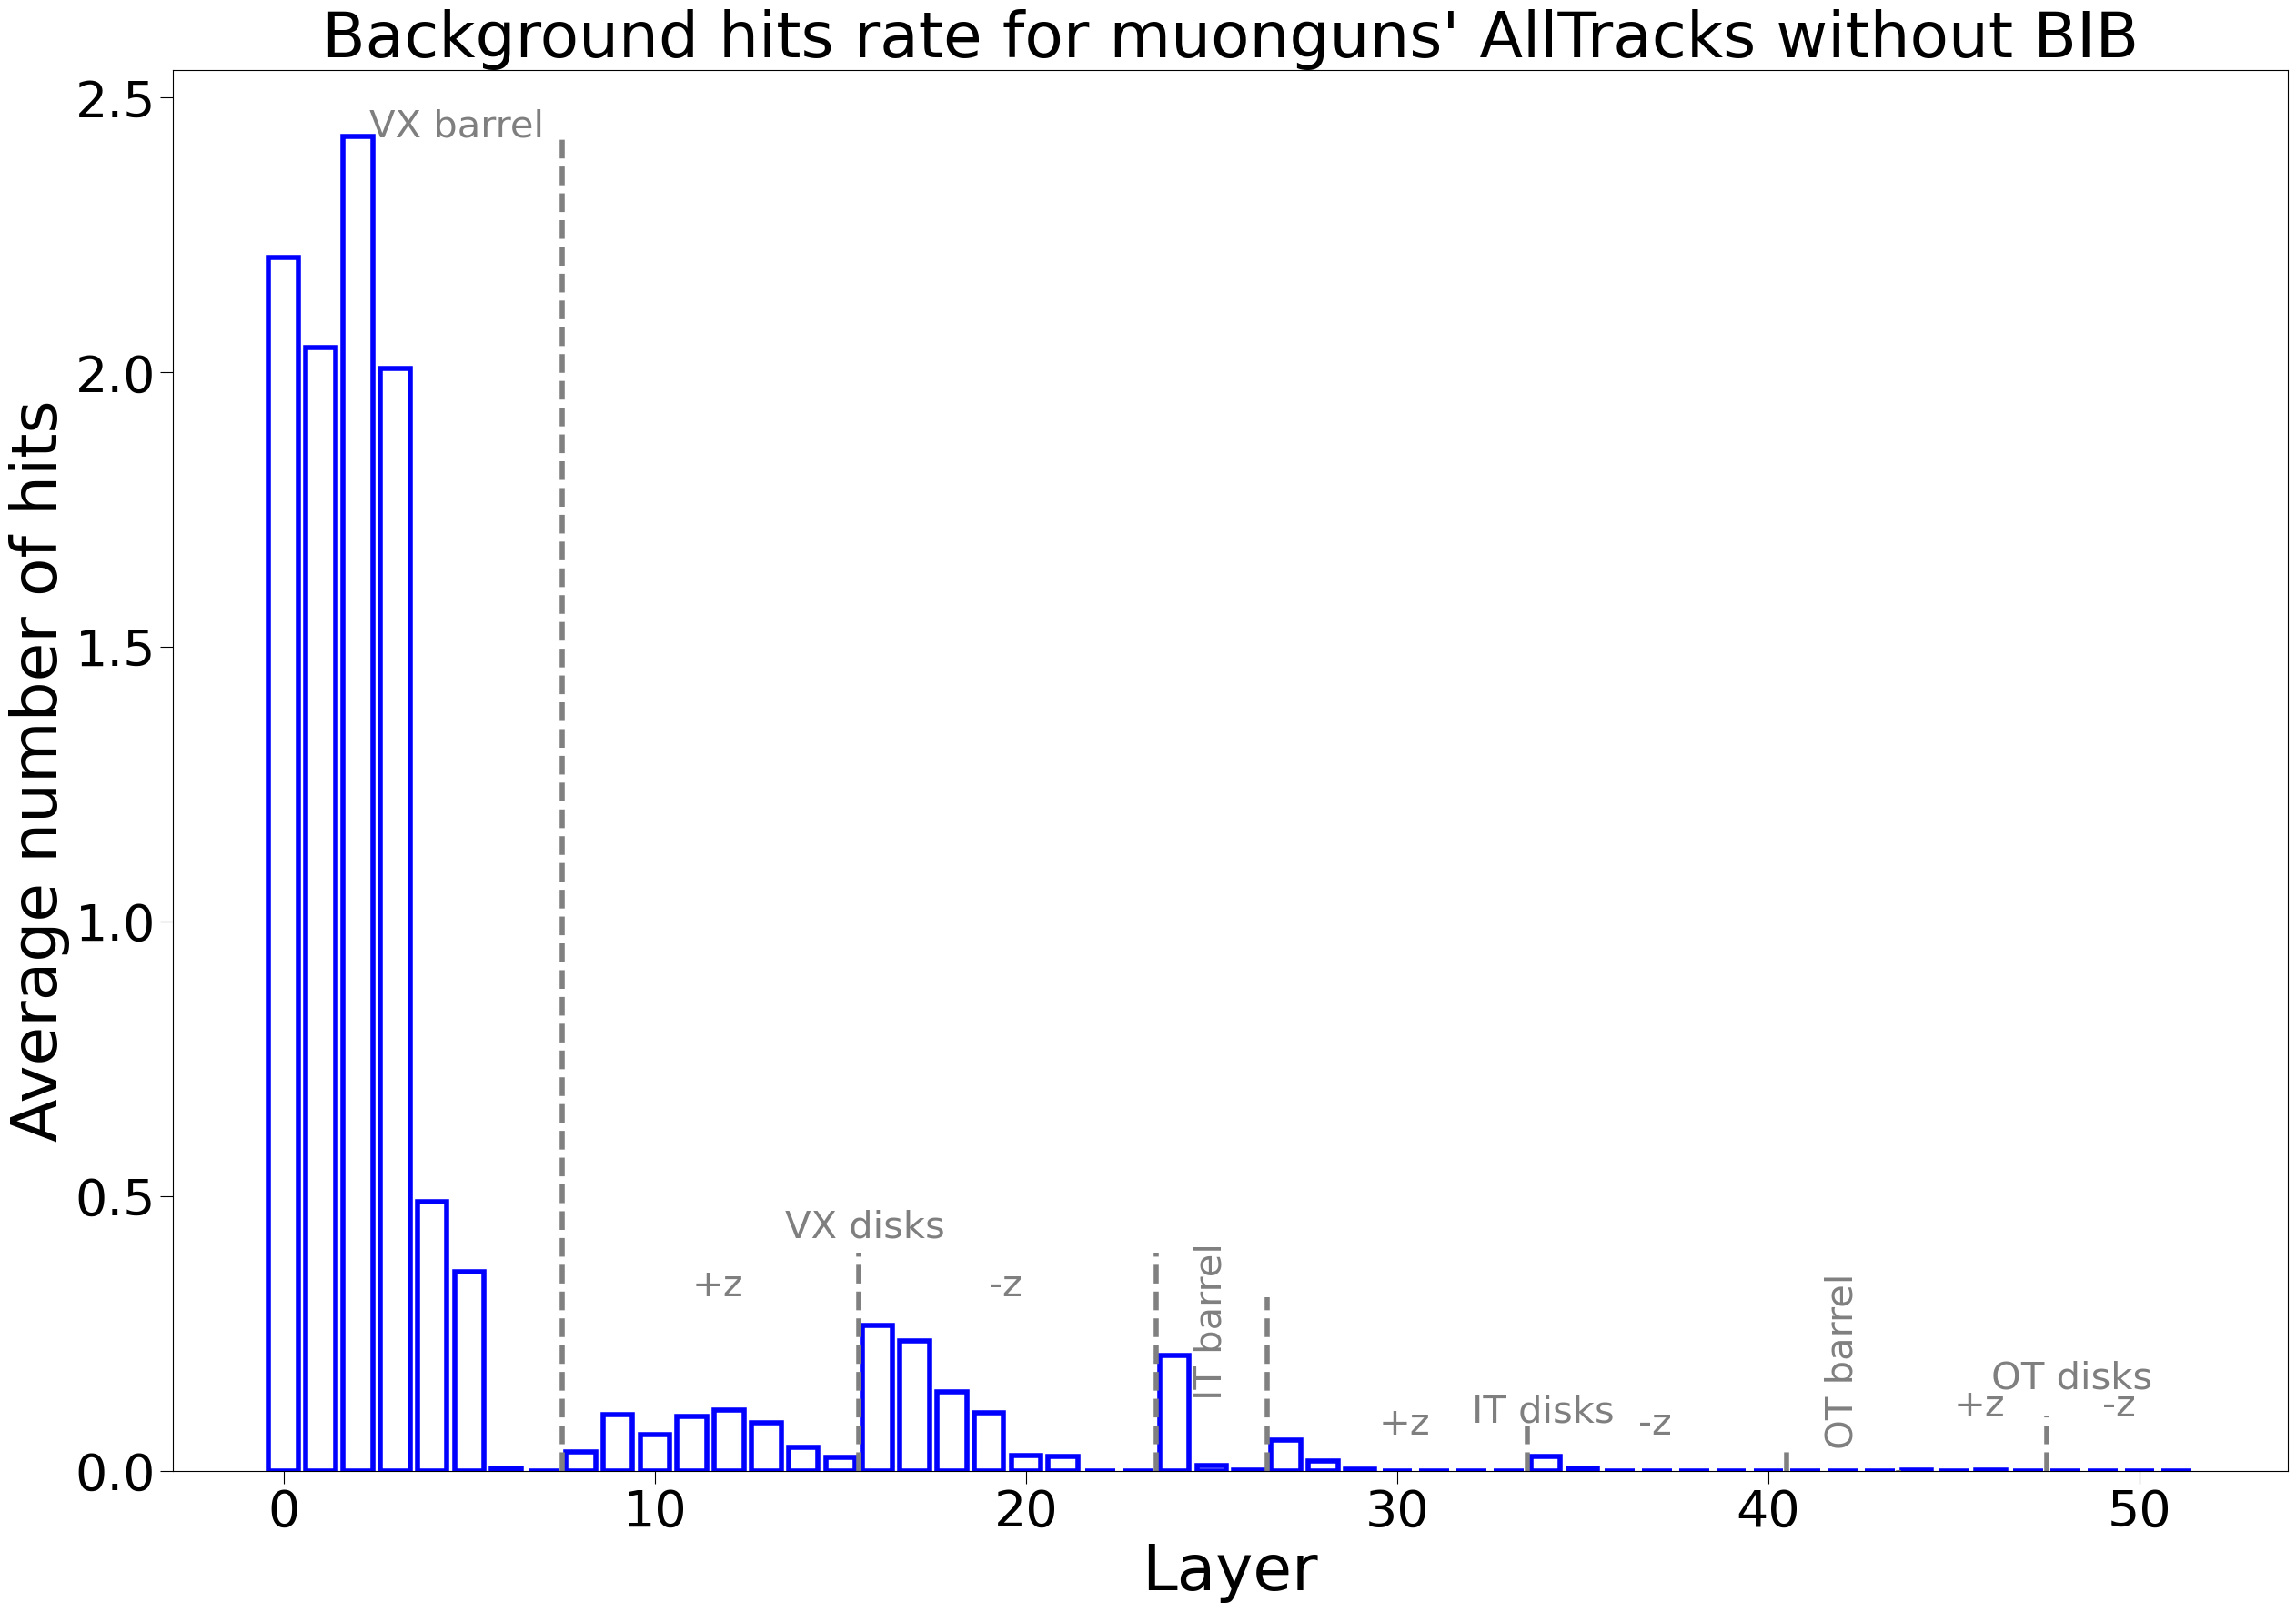

In [54]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)

nAllNoBIB=1000

ax.bar(range(52), AllNoBIBOcc[0]/nAllNoBIB, fill=False, linewidth=4, edgecolor="blue")

ax.vlines(7.5, ymin=0, ymax=max(AllNoBIBOcc[0][:16]/nAllNoBIB), colors="grey", linestyle="dashed", linewidth=4)
ax.text(2.3,max(AllNoBIBOcc[0][:16]/nAllNoBIB), "VX barrel", fontsize=30, alpha=0.5)

ax.vlines(15.50, ymin=0, ymax=max(AllNoBIBOcc[0][8:24]/nAllNoBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(13.5,max(AllNoBIBOcc[0][8:24]/nAllNoBIB)*1.6, "VX disks", fontsize=30, alpha=0.5)
ax.text(11,max(AllNoBIBOcc[0][8:24]/nAllNoBIB)*1.2, "+z", fontsize=30, alpha=0.5)
ax.text(19,max(AllNoBIBOcc[0][8:24]/nAllNoBIB)*1.2, "-z", fontsize=30, alpha=0.5)

ax.vlines(23.50, ymin=0, ymax=max(AllNoBIBOcc[0][16:27]/nAllNoBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)

ax.vlines(26.5, ymin=0, ymax=max(AllNoBIBOcc[0][24:34]/nAllNoBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(24.5,max(AllNoBIBOcc[0][24:34]/nAllNoBIB)*1.3, "IT barrel", fontsize=30, rotation=90, va='center', alpha=0.5)

ax.vlines(33.5, ymin=0, ymax=max(AllNoBIBOcc[0][27:41]/nAllNoBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(32,max(AllNoBIBOcc[0][27:41]/nAllNoBIB)*1.6, "IT disks", fontsize=30, alpha=0.5)
ax.text(29.5,max(AllNoBIBOcc[0][27:41]/nAllNoBIB)*1.2, "+z", fontsize=30, alpha=0.5)
ax.text(36.5,max(AllNoBIBOcc[0][27:41]/nAllNoBIB)*1.2, "-z", fontsize=30, alpha=0.5)

ax.vlines(40.5, ymin=0, ymax=max(AllNoBIBOcc[0][34:44]/nAllNoBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)

ax.vlines(43.5, ymin=0, ymax=max(AllNoBIBOcc[0][41:]/nAllNoBIB)*1.5, colors="grey", linestyle="dashed", linewidth=4)
ax.text(41.5,0.2, "OT barrel", fontsize=30, rotation=90, va='center', alpha=0.5)

ax.vlines(47.5, ymin=0, ymax=0.1, colors="grey", linestyle="dashed", linewidth=4)
ax.text(46,0.15, "OT disks", fontsize=30, alpha=0.5)
ax.text(45,0.1, "+z", fontsize=30, alpha=0.5)
ax.text(49,0.1, "-z", fontsize=30, alpha=0.5)

ax.set_ylabel(f"Average number of hits")
ax.set_xlabel("Layer")
ax.set_title("Background hits rate for muonguns' AllTracks without BIB")